<a href="https://colab.research.google.com/github/phmouras/Critical-Phenomena-in-gravitational-collapse-via-spectral-methods/blob/main/Origin_MSSC_N500_filter_Potential_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

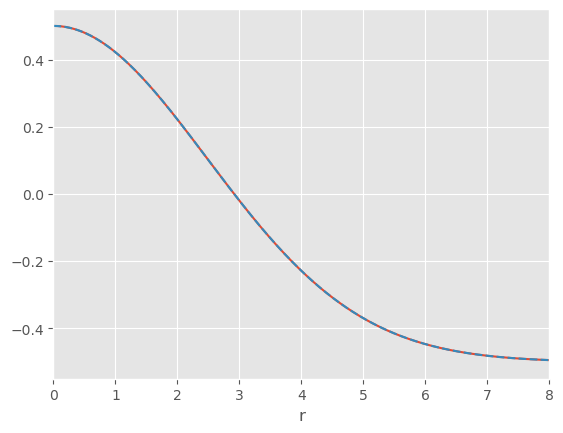

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline
mpl.style.use('ggplot')


N = 300                                                   # Truncation ordem

L0 = 15                                             # Map parameter

col = np.cos(np.arange(2*N + 3)*math.pi /(2*N + 2))      # collocation points (Verificado)

colr = col[1:N+2]                                                         # physical domain (Verificado)

r1 = L0 * colr/(np.sqrt(1-colr**2))
r = np.flip(r1)                                           # physical domain (Verificado)

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials):

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)

# Base function



psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]



# Initial conditions of Phi (Scalar field)

#r0 = 0

#sigma = 1/2

# L0 = 1 and sigma = 1/2 and Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))

#A0 =  0.76  #  0.7602785  -> disperse ;  # 0.77 -> colapse

# L0 = 3 and sigma = 1/2 and Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))

#A0 =  0.75981136951800  #  0.759811369518  -> disperse ;  # 0.759811369518001   -> colapse

Phi_c = 1/2

Phi_vac = -1/2

R0 = 3.5  # 0.05 -> disperse ;  # 0.  -> colapse   A0 substitution

Phi_init = (Phi_c - Phi_vac)*np.exp(-r**2/R0**2) + Phi_vac          # Phi initial data out of origin (Verificado)

inv_psi = np.linalg.inv(psi)

a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,15,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2))

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)

psiplot = SBplot[0:(N+1),:]
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phiplot_init = (Phi_c - Phi_vac)*np.exp(-rplot**2/R0**2) + Phi_vac

#Phiplot_init = np.hstack((0, Phiplot_int))

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()


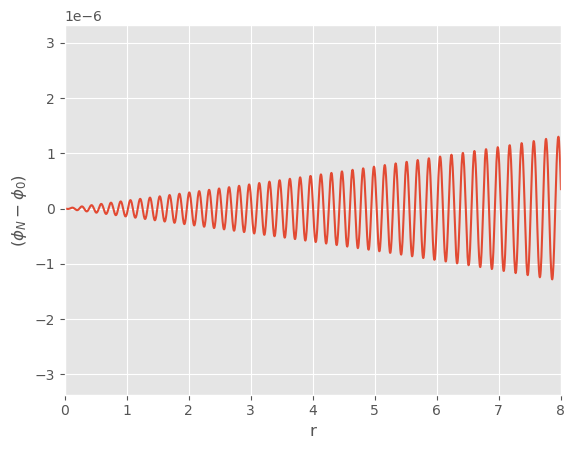

In [2]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$(\phi_N - \phi_0)$")
plt.show()

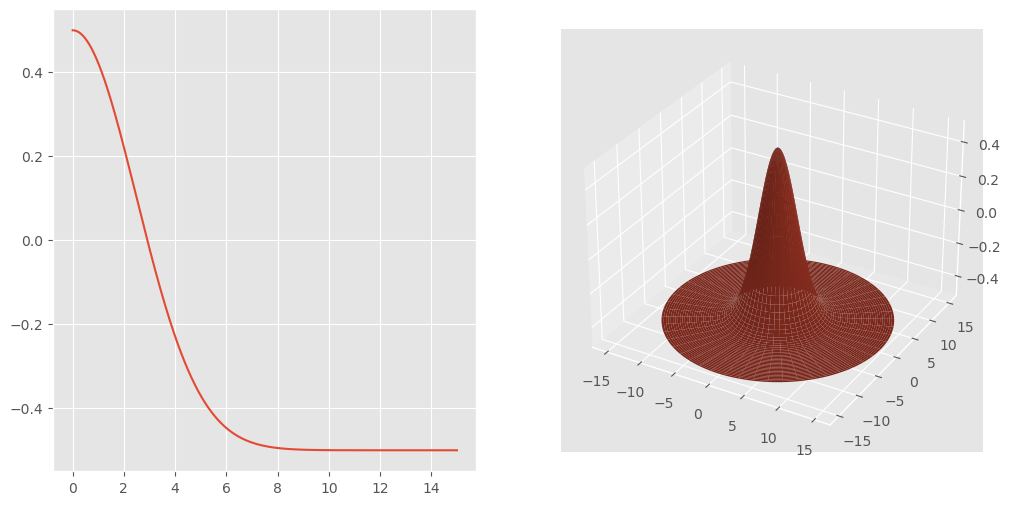

In [3]:

# Plot 3D from Phi initial:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

y = Phiplot
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0], y[i])

ax1.plot(x, y)
ax2.plot_surface(xn, yn, zn)
plt.show()

In [4]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

def V(Phi):
  return 1/4*(Phi**2 - Phi_vac**2)**2

def dV(Phi):
  return Phi**3 - Phi_vac**2*Phi


coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d\phi/dr

tol = 1e-18
#cnew = 0
#err = abs(c0 - cnew)

n = 0
nf = 500

# Newton Raphson loop
#while max(err) >= tol:
while n <= nf:
  Chi = np.dot(c0, psi)
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*rPhi[0]**2 + np.exp(4*Chi[0])*V(Phi)[0]
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] + 1/2*rPhi[1:N+1]**2 + np.exp(4*Chi[1:N+1])*V(Phi)[1:N+1]
  H0 = np.hstack((H0_0, H0_int))
  J1 = rChi*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*coeforigin + 4*np.exp(4*Chi[0])*rpsi[:,0]*V(Phi)[0]
  JH_int = 8*J1[:,1:N+1] + 4*rrpsi[:,1:N+1] + 8/r[1:N+1]*rpsi[:,1:N+1] + 4*np.exp(4*Chi[1:N+1])*rpsi[:,1:N+1]*V(Phi)[1:N+1]
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
  if  max(err) <= tol:
    print('n=', n, 'Erro_max=', max(err), 'c0=', c0, sep = '\n')

    break
  else:
    n = n + 1


n=
205
Erro_max=
4.336808689942018e-19
c0=
[ 7.93052326e-02 -2.52331495e-02  1.44889128e-02 -4.36931655e-03
  2.45000535e-03  9.46885664e-04 -3.50032722e-04  1.53346111e-03
 -3.85774400e-04  9.77887174e-04  2.12479054e-05  5.01813318e-04
  2.40620724e-04  2.87608776e-04  2.78740813e-04  2.20822733e-04
  2.48989649e-04  2.00211203e-04  2.12949433e-04  1.86325858e-04
  1.85789604e-04  1.71852805e-04  1.66279924e-04  1.57675149e-04
  1.51314482e-04  1.44852948e-04  1.39035222e-04  1.33632992e-04
  1.28558264e-04  1.23865489e-04  1.19443422e-04  1.15314382e-04
  1.11425624e-04  1.07766996e-04  1.04315608e-04  1.01053261e-04
  9.79666725e-05  9.50396973e-05  9.22617899e-05  8.96204661e-05
  8.71065278e-05  8.47103662e-05  8.24240312e-05  8.02398897e-05
  7.81511987e-05  7.61517127e-05  7.42357573e-05  7.23981241e-05
  7.06340323e-05  6.89390886e-05  6.73092438e-05  6.57407626e-05
  6.42301932e-05  6.27743395e-05  6.13702400e-05  6.00151443e-05
  5.87064966e-05  5.74419169e-05  5.62191878e-0

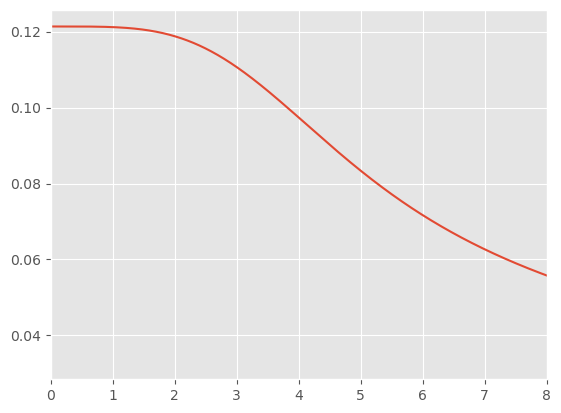

In [5]:

Chiplot = np.dot(c0, psiplot)


plt.plot(rplot,Chiplot)
plt.xlim(0,8)
plt.show()


In [6]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

# In r = 0:

SB1 = 1/2*(SB[1:(N+1),:] + SB[0:(N),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+1),:] + rSB[0:(N),:])
rrSB1 = 1/2*(rrSB[1:(N+1),:] + rrSB[0:(N),:])

# Base functions for Beta

SB2 = np.zeros([N,N+1])
rSB2 = np.zeros([N,N+1])
rrSB2 = np.zeros([N,N+1])



for i in range(N):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))


for i in range(N):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))


for i in range(N):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)






In [7]:
np.shape(SB2)

(300, 301)

In [8]:
np.shape(SB1)

(300, 301)

In [9]:
c0

array([ 7.93052326e-02, -2.52331495e-02,  1.44889128e-02, -4.36931655e-03,
        2.45000535e-03,  9.46885664e-04, -3.50032722e-04,  1.53346111e-03,
       -3.85774400e-04,  9.77887174e-04,  2.12479054e-05,  5.01813318e-04,
        2.40620724e-04,  2.87608776e-04,  2.78740813e-04,  2.20822733e-04,
        2.48989649e-04,  2.00211203e-04,  2.12949433e-04,  1.86325858e-04,
        1.85789604e-04,  1.71852805e-04,  1.66279924e-04,  1.57675149e-04,
        1.51314482e-04,  1.44852948e-04,  1.39035222e-04,  1.33632992e-04,
        1.28558264e-04,  1.23865489e-04,  1.19443422e-04,  1.15314382e-04,
        1.11425624e-04,  1.07766996e-04,  1.04315608e-04,  1.01053261e-04,
        9.79666725e-05,  9.50396973e-05,  9.22617899e-05,  8.96204661e-05,
        8.71065278e-05,  8.47103662e-05,  8.24240312e-05,  8.02398897e-05,
        7.81511987e-05,  7.61517127e-05,  7.42357573e-05,  7.23981241e-05,
        7.06340323e-05,  6.89390886e-05,  6.73092438e-05,  6.57407626e-05,
        6.42301932e-05,  

In [10]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1)

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*+L0**2)

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+1),:] + qSB[0:(N),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+1),:] + qrSB[0:(N),:])
rrqSB1 = 1/2*(qSB[1:(N+1),:] + qrrSB[0:(N),:])



# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi)


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1)

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [11]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 30

filter1 = np.ones(N+1)
#filter2 = np.ones(N)
#filter1 = np.hstack((np.ones(Nc),np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)))
#filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [ ]:
# Runge Kutta 4th order

h = 0.0002   # step size
tf = 400

It = int(tf/h)

#t1 = np.linspace(0, tf, It)

t = 0

Madm = []
Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)


M0 = 2*np.dot(np.arange(1, 2*N + 2, 2), c0) # Madm(t = 0)


#matriz = np.concatenate((array1, array2))

while t <= tf:

  # First step
  Phi = np.dot(a0, psi)
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)
  Pi = np.dot(b0, psi)
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi)
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*(Pi[0]**2 - V(Phi)[0])*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1]  - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V(Phi)[1:N+1])*psi[:,1:N+1]
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V(Phi))
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0] - Alpha[0]*dV(Phi)[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]*dV(Phi)[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)

  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi)
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi)
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC

  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')

  # Phi origin:
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')

  # ADM mass:
  Madm.append(2*np.dot(np.arange(1, 2*N + 2, 2), c0))

  # Second step
  Phi = np.dot(a0 + L1/2, psi)
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi)
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*(Pi[0]**2 - V(Phi)[0])*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V(Phi)[1:N+1])*psi[:,1:N+1]
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V(Phi))
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0] - Alpha[0]*dV(Phi)[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]*dV(Phi)[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi)
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*(Pi[0]**2 - V(Phi)[0])*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V(Phi)[1:N+1])*psi[:,1:N+1]
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V(Phi))
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0] - Alpha[0]*dV(Phi)[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]*dV(Phi)[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db)

  # Forth step
  Phi = np.dot(a0 + L3, psi)
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi)
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*(Pi[0]**2 - V(Phi)[0])*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V(Phi)[1:N+1])*psi[:,1:N+1]
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V(Phi))
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0] - Alpha[0]*dV(Phi)[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]*dV(Phi)[1:N+1]
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)

  t = t + h
#  print(t)
#  if t > 9:
#    h=0.0001


  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  phi_set.append(np.dot(a0, psiplot))

  print('t =',t,'rPi =', max(rPi), sep = '\n')


#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)

out_a.close()
out_p.close()

t1 = np.linspace(0, tf, len(Alpha_origin))

t =
0.0002
rPi =
2.993171390978322e-05
t =
0.0004
rPi =
5.986342436369979e-05
t =
0.0006000000000000001
rPi =
8.979512675498245e-05
t =
0.0008
rPi =
0.0001197268165530187
t =
0.001
rPi =
0.00014965848922670724
t =
0.0012000000000000001
rPi =
0.0001795901402443734
t =
0.0014000000000000002
rPi =
0.00020952176507367493
t =
0.0016000000000000003
rPi =
0.00023945335918131825
t =
0.0018000000000000004
rPi =
0.0002693849180330777
t =
0.0020000000000000005
rPi =
0.00029931643709357487
t =
0.0022000000000000006
rPi =
0.0003292479118261881
t =
0.0024000000000000007
rPi =
0.0003591793376928606
t =
0.0026000000000000007
rPi =
0.000389110710154002
t =
0.002800000000000001
rPi =
0.0004190420246683791
t =
0.003000000000000001
rPi =
0.0004489732766929211
t =
0.003200000000000001
rPi =
0.0004789044616826008
t =
0.003400000000000001
rPi =
0.0005088355750903355
t =
0.003600000000000001
rPi =
0.0005387666123668462
t =
0.0038000000000000013
rPi =
0.0005686975689604387
t =
0.004000000000000001
rPi =
0.0005

t =
0.032399999999999915
rPi =
0.004845619451981279
t =
0.032599999999999914
rPi =
0.004875487812998433
t =
0.03279999999999991
rPi =
0.00490535534827554
t =
0.03299999999999991
rPi =
0.004935222051776816
t =
0.03319999999999991
rPi =
0.00496508791745174
t =
0.03339999999999991
rPi =
0.0049949529392351475
t =
0.03359999999999991
rPi =
0.0050248171110471385
t =
0.033799999999999907
rPi =
0.0050546804267930885
t =
0.033999999999999905
rPi =
0.005084542880363683
t =
0.034199999999999904
rPi =
0.005114404465634914
t =
0.0343999999999999
rPi =
0.005144265176468033
t =
0.0345999999999999
rPi =
0.005174125006709605
t =
0.0347999999999999
rPi =
0.005203983950191523
t =
0.0349999999999999
rPi =
0.005233842000730891
t =
0.0351999999999999
rPi =
0.00526369915213027
t =
0.0353999999999999
rPi =
0.0052935553981774495
t =
0.035599999999999896
rPi =
0.005323410732645542
t =
0.035799999999999894
rPi =
0.005353265149293063
t =
0.03599999999999989
rPi =
0.0053831186418638296
t =
0.03619999999999989
rPi 

t =
0.06499999999999981
rPi =
0.009698593068450768
t =
0.06519999999999981
rPi =
0.009728237746179908
t =
0.06539999999999982
rPi =
0.00975788045260547
t =
0.06559999999999983
rPi =
0.00978752118010154
t =
0.06579999999999983
rPi =
0.009817159921041744
t =
0.06599999999999984
rPi =
0.00984679666779983
t =
0.06619999999999984
rPi =
0.00987643141274954
t =
0.06639999999999985
rPi =
0.00990606414826486
t =
0.06659999999999985
rPi =
0.009935694866720217
t =
0.06679999999999986
rPi =
0.00996532356049059
t =
0.06699999999999987
rPi =
0.009994950221951621
t =
0.06719999999999987
rPi =
0.010024574843479869
t =
0.06739999999999988
rPi =
0.01005419741745292
t =
0.06759999999999988
rPi =
0.010083817936249469
t =
0.06779999999999989
rPi =
0.010113436392249632
t =
0.0679999999999999
rPi =
0.010143052777835025
t =
0.0681999999999999
rPi =
0.010172667085388765
t =
0.0683999999999999
rPi =
0.01020227930729602
t =
0.06859999999999991
rPi =
0.010231889435943714
t =
0.06879999999999992
rPi =
0.0102614974

t =
0.0994000000000008
rPi =
0.014762307316219308
t =
0.0996000000000008
rPi =
0.014791505969313595
t =
0.0998000000000008
rPi =
0.014820701460514597
t =
0.10000000000000081
rPi =
0.014849893784242703
t =
0.10020000000000082
rPi =
0.014879082934938923
t =
0.10040000000000082
rPi =
0.0149082689070651
t =
0.10060000000000083
rPi =
0.014937451695103764
t =
0.10080000000000083
rPi =
0.014966631293558328
t =
0.10100000000000084
rPi =
0.014995807696952936
t =
0.10120000000000084
rPi =
0.015024980899832674
t =
0.10140000000000085
rPi =
0.01505415089676347
t =
0.10160000000000086
rPi =
0.01508331768233228
t =
0.10180000000000086
rPi =
0.015112481251146878
t =
0.10200000000000087
rPi =
0.01514164159783607
t =
0.10220000000000087
rPi =
0.01517079871704974
t =
0.10240000000000088
rPi =
0.015199952603458695
t =
0.10260000000000088
rPi =
0.015229103251754885
t =
0.10280000000000089
rPi =
0.015258250656651222
t =
0.1030000000000009
rPi =
0.015287394812881843
t =
0.1032000000000009
rPi =
0.0153165357

t =
0.1344000000000018
rPi =
0.01981980975848555
t =
0.1346000000000018
rPi =
0.019848387850646052
t =
0.1348000000000018
rPi =
0.019876962098255572
t =
0.1350000000000018
rPi =
0.01990553249868328
t =
0.13520000000000182
rPi =
0.019934099049305033
t =
0.13540000000000182
rPi =
0.019962661747502778
t =
0.13560000000000183
rPi =
0.01999122059066491
t =
0.13580000000000184
rPi =
0.020019775576185346
t =
0.13600000000000184
rPi =
0.02004832670146403
t =
0.13620000000000185
rPi =
0.020076873963906415
t =
0.13640000000000185
rPi =
0.02010541736092347
t =
0.13660000000000186
rPi =
0.020133956889931227
t =
0.13680000000000186
rPi =
0.020162492548350876
t =
0.13700000000000187
rPi =
0.02019102433360851
t =
0.13720000000000188
rPi =
0.020219552243134757
t =
0.13740000000000188
rPi =
0.02024807627436502
t =
0.1376000000000019
rPi =
0.02027659642473878
t =
0.1378000000000019
rPi =
0.020305112691699934
t =
0.1380000000000019
rPi =
0.02033362507269611
t =
0.1382000000000019
rPi =
0.0203621335651788

t =
0.1694000000000028
rPi =
0.024760144008381765
t =
0.1696000000000028
rPi =
0.024788008141488453
t =
0.1698000000000028
rPi =
0.024815867912030023
t =
0.17000000000000282
rPi =
0.024843723315885035
t =
0.17020000000000282
rPi =
0.024871574348911483
t =
0.17040000000000283
rPi =
0.024899421006946507
t =
0.17060000000000283
rPi =
0.02492726328580669
t =
0.17080000000000284
rPi =
0.024955101181287805
t =
0.17100000000000284
rPi =
0.02498293468916449
t =
0.17120000000000285
rPi =
0.02501076380519067
t =
0.17140000000000286
rPi =
0.02503858852509916
t =
0.17160000000000286
rPi =
0.025066408844601637
t =
0.17180000000000287
rPi =
0.02509422475938868
t =
0.17200000000000287
rPi =
0.02512203626512964
t =
0.17220000000000288
rPi =
0.025149843357472595
t =
0.17240000000000288
rPi =
0.025177646032044265
t =
0.1726000000000029
rPi =
0.025205444284450103
t =
0.1728000000000029
rPi =
0.025233238110274017
t =
0.1730000000000029
rPi =
0.025261027505078495
t =
0.1732000000000029
rPi =
0.025288812464

t =
0.20240000000000374
rPi =
0.029295028730148144
t =
0.20260000000000375
rPi =
0.029322101519808217
t =
0.20280000000000376
rPi =
0.02934916898314788
t =
0.20300000000000376
rPi =
0.029376231112861983
t =
0.20320000000000377
rPi =
0.02940328790163481
t =
0.20340000000000377
rPi =
0.02943033934213998
t =
0.20360000000000378
rPi =
0.02945738542704079
t =
0.20380000000000378
rPi =
0.029484426148990443
t =
0.2040000000000038
rPi =
0.029511461500631997
t =
0.2042000000000038
rPi =
0.029538491474598978
t =
0.2044000000000038
rPi =
0.02956551606351504
t =
0.2046000000000038
rPi =
0.029592535259994574
t =
0.2048000000000038
rPi =
0.02961954905664271
t =
0.20500000000000382
rPi =
0.029646557446055433
t =
0.20520000000000382
rPi =
0.029673560420820082
t =
0.20540000000000383
rPi =
0.029700557973515083
t =
0.20560000000000384
rPi =
0.029727550096710513
t =
0.20580000000000384
rPi =
0.029754536782968292
t =
0.20600000000000385
rPi =
0.029781518024842
t =
0.20620000000000385
rPi =
0.0298084938148

t =
0.2354000000000047
rPi =
0.03368447757528941
t =
0.2356000000000047
rPi =
0.033710570869019234
t =
0.2358000000000047
rPi =
0.03373665763777057
t =
0.2360000000000047
rPi =
0.033762737875292576
t =
0.2362000000000047
rPi =
0.033788811575358235
t =
0.23640000000000472
rPi =
0.03381487873176369
t =
0.23660000000000472
rPi =
0.03384093933832911
t =
0.23680000000000473
rPi =
0.033866993388898335
t =
0.23700000000000473
rPi =
0.03389304087733935
t =
0.23720000000000474
rPi =
0.033919081797544146
t =
0.23740000000000475
rPi =
0.03394511614342942
t =
0.23760000000000475
rPi =
0.03397114390893612
t =
0.23780000000000476
rPi =
0.03399716508803015
t =
0.23800000000000476
rPi =
0.03402317967470185
t =
0.23820000000000477
rPi =
0.0340491876629669
t =
0.23840000000000477
rPi =
0.03407518904686599
t =
0.23860000000000478
rPi =
0.03410118382046518
t =
0.2388000000000048
rPi =
0.03412717197785601
t =
0.2390000000000048
rPi =
0.03415315351315564
t =
0.2392000000000048
rPi =
0.034179128420506834
t =

t =
0.26940000000000297
rPi =
0.03802250582050137
t =
0.26960000000000295
rPi =
0.038047422869790536
t =
0.2698000000000029
rPi =
0.03807233275124447
t =
0.2700000000000029
rPi =
0.03809723546373145
t =
0.2702000000000029
rPi =
0.0381221310061483
t =
0.27040000000000286
rPi =
0.038147019377419815
t =
0.27060000000000284
rPi =
0.03817190057649904
t =
0.2708000000000028
rPi =
0.0381967746023668
t =
0.2710000000000028
rPi =
0.038221641454031806
t =
0.27120000000000277
rPi =
0.038246501130530394
t =
0.27140000000000275
rPi =
0.03827135363092652
t =
0.27160000000000273
rPi =
0.03829619895431131
t =
0.2718000000000027
rPi =
0.03832103709980357
t =
0.2720000000000027
rPi =
0.03834586806654866
t =
0.27220000000000266
rPi =
0.0383706918537195
t =
0.27240000000000264
rPi =
0.038395508460515315
t =
0.2726000000000026
rPi =
0.03842031788616253
t =
0.2728000000000026
rPi =
0.03844512012991376
t =
0.2730000000000026
rPi =
0.03846991519104827
t =
0.27320000000000255
rPi =
0.03849470306887138
t =
0.27

t =
0.3033999999999992
rPi =
0.04217300895312328
t =
0.3035999999999992
rPi =
0.04219694567602548
t =
0.3037999999999992
rPi =
0.04222087506343912
t =
0.30399999999999916
rPi =
0.04224479710880124
t =
0.30419999999999914
rPi =
0.04226871180556197
t =
0.3043999999999991
rPi =
0.04229261914718553
t =
0.3045999999999991
rPi =
0.04231651912715015
t =
0.30479999999999907
rPi =
0.042340411738948015
t =
0.30499999999999905
rPi =
0.042364296976086464
t =
0.305199999999999
rPi =
0.04238817483208707
t =
0.305399999999999
rPi =
0.04241204530048649
t =
0.305599999999999
rPi =
0.04243590837483692
t =
0.30579999999999896
rPi =
0.042459764048705585
t =
0.30599999999999894
rPi =
0.042483612315675795
t =
0.3061999999999989
rPi =
0.04250745316934643
t =
0.3063999999999989
rPi =
0.04253128660333277
t =
0.3065999999999989
rPi =
0.042555112611266446
t =
0.30679999999999885
rPi =
0.04257893118679564
t =
0.30699999999999883
rPi =
0.04260274232358551
t =
0.3071999999999988
rPi =
0.04262654601531817
t =
0.3073

t =
0.3369999999999955
rPi =
0.046087040547154366
t =
0.3371999999999955
rPi =
0.046109669995739726
t =
0.3373999999999955
rPi =
0.046132291348673714
t =
0.33759999999999546
rPi =
0.04615490460414389
t =
0.33779999999999544
rPi =
0.04617750976037361
t =
0.3379999999999954
rPi =
0.04620010681562189
t =
0.3381999999999954
rPi =
0.04622269576818352
t =
0.33839999999999537
rPi =
0.04624527661638889
t =
0.33859999999999535
rPi =
0.046267849358604375
t =
0.3387999999999953
rPi =
0.04629041399323195
t =
0.3389999999999953
rPi =
0.04631297051870904
t =
0.3391999999999953
rPi =
0.046335518933508936
t =
0.33939999999999526
rPi =
0.04635805923614021
t =
0.33959999999999524
rPi =
0.04638059142514759
t =
0.3397999999999952
rPi =
0.04640311549911066
t =
0.3399999999999952
rPi =
0.04642563145664484
t =
0.3401999999999952
rPi =
0.0464481392964009
t =
0.34039999999999515
rPi =
0.046470639017065156
t =
0.34059999999999513
rPi =
0.04649313061735912
t =
0.3407999999999951
rPi =
0.04651561409603975
t =
0.3

t =
0.37039999999999185
rPi =
0.04975361087128079
t =
0.3705999999999918
rPi =
0.0497748880243371
t =
0.3707999999999918
rPi =
0.04979615720341241
t =
0.3709999999999918
rPi =
0.04981741841104765
t =
0.37119999999999176
rPi =
0.049838671649793144
t =
0.37139999999999174
rPi =
0.04985991692220815
t =
0.3715999999999917
rPi =
0.04988115423086065
t =
0.3717999999999917
rPi =
0.04990238357832745
t =
0.37199999999999167
rPi =
0.049923604967193246
t =
0.37219999999999165
rPi =
0.0499448184000512
t =
0.3723999999999916
rPi =
0.04996602387950178
t =
0.3725999999999916
rPi =
0.0499872214081532
t =
0.3727999999999916
rPi =
0.050008410988621
t =
0.37299999999999156
rPi =
0.05002959262352759
t =
0.37319999999999154
rPi =
0.05005076631550213
t =
0.3733999999999915
rPi =
0.0500719320671802
t =
0.3735999999999915
rPi =
0.0500930898812036
t =
0.3737999999999915
rPi =
0.050114239760220176
t =
0.37399999999999145
rPi =
0.05013538170688339
t =
0.37419999999999143
rPi =
0.05015651572385202
t =
0.374399999

t =
0.4061999999999879
rPi =
0.053437588693738367
t =
0.4063999999999879
rPi =
0.05345747718213821
t =
0.40659999999998786
rPi =
0.0534773580639391
t =
0.40679999999998784
rPi =
0.0534972313395084
t =
0.4069999999999878
rPi =
0.05351709700918416
t =
0.4071999999999878
rPi =
0.0535369550732756
t =
0.40739999999998777
rPi =
0.0535568055320625
t =
0.40759999999998775
rPi =
0.05357664838579539
t =
0.40779999999998773
rPi =
0.053596483634695415
t =
0.4079999999999877
rPi =
0.05361631127895413
t =
0.4081999999999877
rPi =
0.05363613131873369
t =
0.40839999999998766
rPi =
0.053655943754166296
t =
0.40859999999998764
rPi =
0.053675748585354545
t =
0.4087999999999876
rPi =
0.05369554581237118
t =
0.4089999999999876
rPi =
0.05371533543525896
t =
0.4091999999999876
rPi =
0.053735117454030534
t =
0.40939999999998755
rPi =
0.05375489186866875
t =
0.40959999999998753
rPi =
0.05377465867912591
t =
0.4097999999999875
rPi =
0.05379441788532416
t =
0.4099999999999875
rPi =
0.05381416948715554
t =
0.4101

t =
0.44119999999998405
rPi =
0.056801432890149495
t =
0.441399999999984
rPi =
0.056819969090831396
t =
0.441599999999984
rPi =
0.05683849729361862
t =
0.441799999999984
rPi =
0.05685701749399405
t =
0.44199999999998396
rPi =
0.05687552968742342
t =
0.44219999999998394
rPi =
0.05689403386935533
t =
0.4423999999999839
rPi =
0.05691253003522154
t =
0.4425999999999839
rPi =
0.05693101818043762
t =
0.4427999999999839
rPi =
0.05694949830040203
t =
0.44299999999998385
rPi =
0.05696797039049784
t =
0.44319999999998383
rPi =
0.05698643444609168
t =
0.4433999999999838
rPi =
0.05700489046253465
t =
0.4435999999999838
rPi =
0.057023338435162316
t =
0.44379999999998376
rPi =
0.057041778359295
t =
0.44399999999998374
rPi =
0.05706021023023803
t =
0.4441999999999837
rPi =
0.057078634043281756
t =
0.4443999999999837
rPi =
0.05709704979370232
t =
0.4445999999999837
rPi =
0.057115457476760854
t =
0.44479999999998365
rPi =
0.05713385708770513
t =
0.44499999999998363
rPi =
0.0571522486217683
t =
0.445199

t =
0.47459999999998037
rPi =
0.05978237910428717
t =
0.47479999999998035
rPi =
0.05979951141330503
t =
0.4749999999999803
rPi =
0.05981663491674653
t =
0.4751999999999803
rPi =
0.059833749610632106
t =
0.4753999999999803
rPi =
0.05985085549100577
t =
0.47559999999998026
rPi =
0.05986795255393533
t =
0.47579999999998024
rPi =
0.059885040795513315
t =
0.4759999999999802
rPi =
0.059902120211856
t =
0.4761999999999802
rPi =
0.05991919079910441
t =
0.4763999999999802
rPi =
0.059936252553424565
t =
0.47659999999998015
rPi =
0.0599533054710072
t =
0.47679999999998013
rPi =
0.059970349548068444
t =
0.4769999999999801
rPi =
0.05998738478084945
t =
0.4771999999999801
rPi =
0.060004411165617305
t =
0.47739999999998006
rPi =
0.060021428698664704
t =
0.47759999999998004
rPi =
0.0600384373763103
t =
0.47779999999998
rPi =
0.06005543719489874
t =
0.47799999999998
rPi =
0.0600724281508014
t =
0.47819999999998
rPi =
0.06008941024041598
t =
0.47839999999997995
rPi =
0.06010638346016675
t =
0.4785999999

t =
0.5091999999999766
rPi =
0.06261294312720508
t =
0.5093999999999765
rPi =
0.06262851866049629
t =
0.5095999999999765
rPi =
0.06264408517364621
t =
0.5097999999999765
rPi =
0.06265964266851914
t =
0.5099999999999765
rPi =
0.06267519114701432
t =
0.5101999999999765
rPi =
0.062690730611066
t =
0.5103999999999764
rPi =
0.0627062610626429
t =
0.5105999999999764
rPi =
0.06272178250374806
t =
0.5107999999999764
rPi =
0.06273729493641891
t =
0.5109999999999764
rPi =
0.06275279836272712
t =
0.5111999999999763
rPi =
0.06276829278477913
t =
0.5113999999999763
rPi =
0.06278377820471423
t =
0.5115999999999763
rPi =
0.06279925462470687
t =
0.5117999999999763
rPi =
0.06281472204696459
t =
0.5119999999999763
rPi =
0.06283018047372896
t =
0.5121999999999762
rPi =
0.06284562990727495
t =
0.5123999999999762
rPi =
0.06286107034991135
t =
0.5125999999999762
rPi =
0.06287650180397972
t =
0.5127999999999762
rPi =
0.06289192427185528
t =
0.5129999999999761
rPi =
0.06290733775594676
t =
0.5131999999999761


t =
0.5443999999999727
rPi =
0.06521814376209552
t =
0.5445999999999727
rPi =
0.06523218563406596
t =
0.5447999999999726
rPi =
0.06524621920323992
t =
0.5449999999999726
rPi =
0.0652602444748197
t =
0.5451999999999726
rPi =
0.0652742614540062
t =
0.5453999999999726
rPi =
0.06528827014599779
t =
0.5455999999999726
rPi =
0.06530227055599122
t =
0.5457999999999725
rPi =
0.06531626268917998
t =
0.5459999999999725
rPi =
0.0653302465507551
t =
0.5461999999999725
rPi =
0.06534422214590468
t =
0.5463999999999725
rPi =
0.06535818947981278
t =
0.5465999999999724
rPi =
0.06537214855766084
t =
0.5467999999999724
rPi =
0.06538609938462578
t =
0.5469999999999724
rPi =
0.06540004196588056
t =
0.5471999999999724
rPi =
0.06541397630659398
t =
0.5473999999999724
rPi =
0.06542790241193007
t =
0.5475999999999723
rPi =
0.06544182028704801
t =
0.5477999999999723
rPi =
0.06545572993710226
t =
0.5479999999999723
rPi =
0.06546963136724115
t =
0.5481999999999723
rPi =
0.06548352458260821
t =
0.5483999999999722


t =
0.5785999999999689
rPi =
0.06750254565831607
t =
0.5787999999999689
rPi =
0.06751523383590843
t =
0.5789999999999689
rPi =
0.06752791438904382
t =
0.5791999999999689
rPi =
0.06754058731955676
t =
0.5793999999999688
rPi =
0.06755325262924926
t =
0.5795999999999688
rPi =
0.06756591031989195
t =
0.5797999999999688
rPi =
0.06757856039322392
t =
0.5799999999999688
rPi =
0.06759120285095174
t =
0.5801999999999687
rPi =
0.06760383769475083
t =
0.5803999999999687
rPi =
0.06761646492626423
t =
0.5805999999999687
rPi =
0.06762908454710313
t =
0.5807999999999687
rPi =
0.06764169655884678
t =
0.5809999999999687
rPi =
0.06765430096304215
t =
0.5811999999999686
rPi =
0.06766689776120434
t =
0.5813999999999686
rPi =
0.06767948695481665
t =
0.5815999999999686
rPi =
0.06769206854532941
t =
0.5817999999999686
rPi =
0.06770464253416181
t =
0.5819999999999685
rPi =
0.06771720892270001
t =
0.5821999999999685
rPi =
0.06772976771229841
t =
0.5823999999999685
rPi =
0.06774231890427888
t =
0.58259999999996

t =
0.6131999999999651
rPi =
0.06958457927425944
t =
0.6133999999999651
rPi =
0.06959594927161943
t =
0.6135999999999651
rPi =
0.06960731151334296
t =
0.613799999999965
rPi =
0.06961866599654315
t =
0.613999999999965
rPi =
0.06963001271831813
t =
0.614199999999965
rPi =
0.06964135167575128
t =
0.614399999999965
rPi =
0.06965268286591088
t =
0.614599999999965
rPi =
0.06966400628585154
t =
0.6147999999999649
rPi =
0.06967532193261293
t =
0.6149999999999649
rPi =
0.06968662980322138
t =
0.6151999999999649
rPi =
0.06969792989468866
t =
0.6153999999999649
rPi =
0.06970922220401389
t =
0.6155999999999648
rPi =
0.06972050672818236
t =
0.6157999999999648
rPi =
0.06973178346416596
t =
0.6159999999999648
rPi =
0.06974305240892406
t =
0.6161999999999648
rPi =
0.06975431355940337
t =
0.6163999999999648
rPi =
0.06976556691253775
t =
0.6165999999999647
rPi =
0.06977681246524932
t =
0.6167999999999647
rPi =
0.06978805021444809
t =
0.6169999999999647
rPi =
0.06979928015703148
t =
0.6171999999999647
rP

t =
0.6485999999999612
rPi =
0.07147335805051813
t =
0.6487999999999612
rPi =
0.07148330563477663
t =
0.6489999999999612
rPi =
0.07149324492509065
t =
0.6491999999999611
rPi =
0.07150317591944726
t =
0.6493999999999611
rPi =
0.07151309861585742
t =
0.6495999999999611
rPi =
0.07152301301235589
t =
0.6497999999999611
rPi =
0.07153291910700199
t =
0.649999999999961
rPi =
0.07154281689787834
t =
0.650199999999961
rPi =
0.07155270638309284
t =
0.650399999999961
rPi =
0.07156258756077782
t =
0.650599999999961
rPi =
0.07157246042908987
t =
0.650799999999961
rPi =
0.07158232498621066
t =
0.6509999999999609
rPi =
0.07159218123034734
t =
0.6511999999999609
rPi =
0.0716020291597317
t =
0.6513999999999609
rPi =
0.0716118687726211
t =
0.6515999999999609
rPi =
0.07162170006729855
t =
0.6517999999999609
rPi =
0.07163152304207233
t =
0.6519999999999608
rPi =
0.07164133769527671
t =
0.6521999999999608
rPi =
0.07165114402527217
t =
0.6523999999999608
rPi =
0.07166094203044503
t =
0.6525999999999608
rPi 

t =
0.6835999999999574
rPi =
0.07308720261492745
t =
0.6837999999999573
rPi =
0.07309569340750105
t =
0.6839999999999573
rPi =
0.07310417600708309
t =
0.6841999999999573
rPi =
0.07311265041706223
t =
0.6843999999999573
rPi =
0.07312111664085667
t =
0.6845999999999572
rPi =
0.07312957468191474
t =
0.6847999999999572
rPi =
0.0731380245437146
t =
0.6849999999999572
rPi =
0.07314646622976428
t =
0.6851999999999572
rPi =
0.07315489974360112
t =
0.6853999999999572
rPi =
0.07316332508879285
t =
0.6855999999999571
rPi =
0.07317174226893575
t =
0.6857999999999571
rPi =
0.07318015128765544
t =
0.6859999999999571
rPi =
0.07318855214860757
t =
0.6861999999999571
rPi =
0.07319694485547606
t =
0.686399999999957
rPi =
0.07320532941197443
t =
0.686599999999957
rPi =
0.07321370582184474
t =
0.686799999999957
rPi =
0.07322207408885753
t =
0.686999999999957
rPi =
0.07323043421681298
t =
0.687199999999957
rPi =
0.07323878620953886
t =
0.6873999999999569
rPi =
0.07324713007089166
t =
0.6875999999999569
rPi

t =
0.7189999999999535
rPi =
0.07446654066837358
t =
0.7191999999999534
rPi =
0.07447365580562702
t =
0.7193999999999534
rPi =
0.07448076368179489
t =
0.7195999999999534
rPi =
0.07448786430306156
t =
0.7197999999999534
rPi =
0.07449495767560854
t =
0.7199999999999533
rPi =
0.07450204380561623
t =
0.7201999999999533
rPi =
0.0745091226992616
t =
0.7203999999999533
rPi =
0.07451619436271924
t =
0.7205999999999533
rPi =
0.07452325880216099
t =
0.7207999999999533
rPi =
0.07453031602375484
t =
0.7209999999999532
rPi =
0.07453736603366612
t =
0.7211999999999532
rPi =
0.0745444088380568
t =
0.7213999999999532
rPi =
0.07455144444308368
t =
0.7215999999999532
rPi =
0.0745584728549014
t =
0.7217999999999531
rPi =
0.07456549407965887
t =
0.7219999999999531
rPi =
0.07457250812350141
t =
0.7221999999999531
rPi =
0.07457951499256968
t =
0.7223999999999531
rPi =
0.07458651469299876
t =
0.7225999999999531
rPi =
0.07459350723091979
t =
0.722799999999953
rPi =
0.0746004926124579
t =
0.722999999999953
rPi

t =
0.7533999999999497
rPi =
0.0756510758162649
t =
0.7535999999999496
rPi =
0.07565747666704711
t =
0.7537999999999496
rPi =
0.07566387006987618
t =
0.7539999999999496
rPi =
0.07567025602523977
t =
0.7541999999999496
rPi =
0.07567663453365403
t =
0.7543999999999496
rPi =
0.07568300559566403
t =
0.7545999999999495
rPi =
0.07568936921184341
t =
0.7547999999999495
rPi =
0.0756957253827947
t =
0.7549999999999495
rPi =
0.07570207410914889
t =
0.7551999999999495
rPi =
0.07570841539156618
t =
0.7553999999999494
rPi =
0.0757147492307358
t =
0.7555999999999494
rPi =
0.07572107562737494
t =
0.7557999999999494
rPi =
0.07572739458223102
t =
0.7559999999999494
rPi =
0.0757337060960795
t =
0.7561999999999494
rPi =
0.07574001016972566
t =
0.7563999999999493
rPi =
0.07574630680400299
t =
0.7565999999999493
rPi =
0.07575259599977432
t =
0.7567999999999493
rPi =
0.07575887775793237
t =
0.7569999999999493
rPi =
0.07576515207939798
t =
0.7571999999999492
rPi =
0.07577141896512164
t =
0.7573999999999492
r

t =
0.7889999999999457
rPi =
0.0766747186570121
t =
0.7891999999999457
rPi =
0.07667982790435042
t =
0.7893999999999457
rPi =
0.07668493023062274
t =
0.7895999999999457
rPi =
0.07669002564093139
t =
0.7897999999999457
rPi =
0.07669511414039518
t =
0.7899999999999456
rPi =
0.0767001957341498
t =
0.7901999999999456
rPi =
0.0767052704273475
t =
0.7903999999999456
rPi =
0.07671033822515709
t =
0.7905999999999456
rPi =
0.07671539913276312
t =
0.7907999999999455
rPi =
0.07672045315536709
t =
0.7909999999999455
rPi =
0.07672550029818542
t =
0.7911999999999455
rPi =
0.07673054056645134
t =
0.7913999999999455
rPi =
0.07673557396541279
t =
0.7915999999999455
rPi =
0.07674060050033393
t =
0.7917999999999454
rPi =
0.07674562017649356
t =
0.7919999999999454
rPi =
0.07675063299918583
t =
0.7921999999999454
rPi =
0.07675563897371991
t =
0.7923999999999454
rPi =
0.07676063810541961
t =
0.7925999999999453
rPi =
0.07676563039962384
t =
0.7927999999999453
rPi =
0.07677061586168496
t =
0.7929999999999453


t =
0.8235999999999419
rPi =
0.07746037393921869
t =
0.8237999999999419
rPi =
0.07746436985539844
t =
0.8239999999999419
rPi =
0.07746835983681505
t =
0.8241999999999419
rPi =
0.07747234388888509
t =
0.8243999999999418
rPi =
0.07747632201701181
t =
0.8245999999999418
rPi =
0.07748029422658574
t =
0.8247999999999418
rPi =
0.07748426052298397
t =
0.8249999999999418
rPi =
0.07748822091156943
t =
0.8251999999999418
rPi =
0.07749217539769189
t =
0.8253999999999417
rPi =
0.07749612398668737
t =
0.8255999999999417
rPi =
0.0775000666838777
t =
0.8257999999999417
rPi =
0.07750400349457069
t =
0.8259999999999417
rPi =
0.07750793442405966
t =
0.8261999999999416
rPi =
0.07751185947762392
t =
0.8263999999999416
rPi =
0.07751577866052789
t =
0.8265999999999416
rPi =
0.07751969197802178
t =
0.8267999999999416
rPi =
0.07752359943534039
t =
0.8269999999999416
rPi =
0.07752750103770403
t =
0.8271999999999415
rPi =
0.07753139679031774
t =
0.8273999999999415
rPi =
0.0775352866983716
t =
0.8275999999999415

t =
0.8585999999999381
rPi =
0.07807340514598751
t =
0.8587999999999381
rPi =
0.07807642902384046
t =
0.858999999999938
rPi =
0.07807944762016214
t =
0.859199999999938
rPi =
0.07808246093665266
t =
0.859399999999938
rPi =
0.07808546897498657
t =
0.859599999999938
rPi =
0.07808847173681521
t =
0.859799999999938
rPi =
0.07809146922376564
t =
0.8599999999999379
rPi =
0.07809446143744064
t =
0.8601999999999379
rPi =
0.07809744837941968
t =
0.8603999999999379
rPi =
0.07810043005125761
t =
0.8605999999999379
rPi =
0.07810340645448577
t =
0.8607999999999378
rPi =
0.07810637759061147
t =
0.8609999999999378
rPi =
0.07810934346111884
t =
0.8611999999999378
rPi =
0.07811230406746716
t =
0.8613999999999378
rPi =
0.07811525941109253
t =
0.8615999999999377
rPi =
0.07811820949340789
t =
0.8617999999999377
rPi =
0.07812115431580181
t =
0.8619999999999377
rPi =
0.07812409387963919
t =
0.8621999999999377
rPi =
0.07812702818626213
t =
0.8623999999999377
rPi =
0.07812995723698855
t =
0.8625999999999376
rP

t =
0.8935999999999342
rPi =
0.07852283172241425
t =
0.8937999999999342
rPi =
0.07852493849309054
t =
0.8939999999999342
rPi =
0.0785270399759951
t =
0.8941999999999342
rPi =
0.07852913616987782
t =
0.8943999999999341
rPi =
0.07853122707348295
t =
0.8945999999999341
rPi =
0.07853331268554829
t =
0.8947999999999341
rPi =
0.0785353930048061
t =
0.8949999999999341
rPi =
0.07853746802998303
t =
0.895199999999934
rPi =
0.07853953775979973
t =
0.895399999999934
rPi =
0.07854160219297227
t =
0.895599999999934
rPi =
0.07854366132821133
t =
0.895799999999934
rPi =
0.07854571516422168
t =
0.895999999999934
rPi =
0.0785477636997039
t =
0.8961999999999339
rPi =
0.07854980693335409
t =
0.8963999999999339
rPi =
0.07855184486386292
t =
0.8965999999999339
rPi =
0.07855387748991682
t =
0.8967999999999339
rPi =
0.07855590481019825
t =
0.8969999999999339
rPi =
0.07855792682338512
t =
0.8971999999999338
rPi =
0.07855994352815156
t =
0.8973999999999338
rPi =
0.07856195492316723
t =
0.8975999999999338
rPi =

t =
0.9277999999999305
rPi =
0.07880516548498721
t =
0.9279999999999304
rPi =
0.07880634984798211
t =
0.9281999999999304
rPi =
0.07880752873738851
t =
0.9283999999999304
rPi =
0.07880870215292227
t =
0.9285999999999304
rPi =
0.07880987009431469
t =
0.9287999999999303
rPi =
0.07881103256131271
t =
0.9289999999999303
rPi =
0.07881218955367904
t =
0.9291999999999303
rPi =
0.07881334107119271
t =
0.9293999999999303
rPi =
0.07881448711364804
t =
0.9295999999999303
rPi =
0.07881562768085613
t =
0.9297999999999302
rPi =
0.07881676277264356
t =
0.9299999999999302
rPi =
0.07881789238885352
t =
0.9301999999999302
rPi =
0.07881901652934538
t =
0.9303999999999302
rPi =
0.07882013519399485
t =
0.9305999999999301
rPi =
0.07882124838269414
t =
0.9307999999999301
rPi =
0.07882235609535179
t =
0.9309999999999301
rPi =
0.07882345833189298
t =
0.9311999999999301
rPi =
0.07882455509225975
t =
0.9313999999999301
rPi =
0.07882564637641065
t =
0.93159999999993
rPi =
0.0788267321843211
t =
0.93179999999993
rP

t =
0.9633999999999265
rPi =
0.07895542391174866
t =
0.9635999999999265
rPi =
0.07895620433258134
t =
0.9637999999999265
rPi =
0.07895698050688163
t =
0.9639999999999265
rPi =
0.07895775243556176
t =
0.9641999999999264
rPi =
0.07895852011951748
t =
0.9643999999999264
rPi =
0.07895928355962674
t =
0.9645999999999264
rPi =
0.07896004275675117
t =
0.9647999999999264
rPi =
0.07896079771173536
t =
0.9649999999999264
rPi =
0.07896154842540709
t =
0.9651999999999263
rPi =
0.07896229489857699
t =
0.9653999999999263
rPi =
0.07896303713203895
t =
0.9655999999999263
rPi =
0.07896377512657067
t =
0.9657999999999263
rPi =
0.07896450888293297
t =
0.9659999999999263
rPi =
0.07896523840187032
t =
0.9661999999999262
rPi =
0.0789659636841103
t =
0.9663999999999262
rPi =
0.07896668473036446
t =
0.9665999999999262
rPi =
0.07896740154132807
t =
0.9667999999999262
rPi =
0.07896811411767994
t =
0.9669999999999261
rPi =
0.07896882246008283
t =
0.9671999999999261
rPi =
0.07896952656918302
t =
0.967399999999926

t =
0.9989999999999226
rPi =
0.07902770390823924
t =
0.9991999999999226
rPi =
0.07902773025014402
t =
0.9993999999999226
rPi =
0.0790277523157529
t =
0.9995999999999226
rPi =
0.07902777010433037
t =
0.9997999999999225
rPi =
0.07902778361514104
t =
0.9999999999999225
rPi =
0.07902779284744962
t =
1.0001999999999225
rPi =
0.07902779780052141
t =
1.0003999999999225
rPi =
0.07902779847362168
t =
1.0005999999999224
rPi =
0.07902779486601653
t =
1.0007999999999224
rPi =
0.07902778697697213
t =
1.0009999999999224
rPi =
0.0790277748057558
t =
1.0011999999999224
rPi =
0.07902775835163543
t =
1.0013999999999224
rPi =
0.07902773761387993
t =
1.0015999999999223
rPi =
0.07902771259175867
t =
1.0017999999999223
rPi =
0.0790276832845428
t =
1.0019999999999223
rPi =
0.07902764969150414
t =
1.0021999999999223
rPi =
0.07902761181191639
t =
1.0023999999999222
rPi =
0.07902756964505396
t =
1.0025999999999222
rPi =
0.07902752319019322
t =
1.0027999999999222
rPi =
0.07902747244661207
t =
1.0029999999999222


t =
1.0339999999999188
rPi =
0.0789666907913787
t =
1.0341999999999187
rPi =
0.07896596128185698
t =
1.0343999999999187
rPi =
0.07896522745027248
t =
1.0345999999999187
rPi =
0.07896448929723485
t =
1.0347999999999187
rPi =
0.0789637468233666
t =
1.0349999999999187
rPi =
0.07896300002930319
t =
1.0351999999999186
rPi =
0.07896224891569413
t =
1.0353999999999186
rPi =
0.07896149348320085
t =
1.0355999999999186
rPi =
0.07896073373249876
t =
1.0357999999999186
rPi =
0.0789599696642767
t =
1.0359999999999185
rPi =
0.0789592012792364
t =
1.0361999999999185
rPi =
0.07895842857809292
t =
1.0363999999999185
rPi =
0.07895765156157508
t =
1.0365999999999185
rPi =
0.07895687023042468
t =
1.0367999999999185
rPi =
0.07895608458539681
t =
1.0369999999999184
rPi =
0.0789552946272605
t =
1.0371999999999184
rPi =
0.07895450035679762
t =
1.0373999999999184
rPi =
0.07895370177480406
t =
1.0375999999999184
rPi =
0.0789528988820888
t =
1.0377999999999183
rPi =
0.07895209167947419
t =
1.0379999999999183
rPi

t =
1.068599999999915
rPi =
0.07877718821133504
t =
1.068799999999915
rPi =
0.07877573154869916
t =
1.068999999999915
rPi =
0.07877427086923944
t =
1.0691999999999149
rPi =
0.07877280617579953
t =
1.0693999999999149
rPi =
0.07877133747123358
t =
1.0695999999999148
rPi =
0.07876986475840533
t =
1.0697999999999148
rPi =
0.07876838804018883
t =
1.0699999999999148
rPi =
0.07876690731946823
t =
1.0701999999999148
rPi =
0.07876542259913738
t =
1.0703999999999148
rPi =
0.07876393388209994
t =
1.0705999999999147
rPi =
0.07876244117126958
t =
1.0707999999999147
rPi =
0.07876094446956965
t =
1.0709999999999147
rPi =
0.07875944377993317
t =
1.0711999999999147
rPi =
0.07875793910530296
t =
1.0713999999999146
rPi =
0.07875643044863105
t =
1.0715999999999146
rPi =
0.0787549178128792
t =
1.0717999999999146
rPi =
0.07875340120101881
t =
1.0719999999999146
rPi =
0.07875188061603039
t =
1.0721999999999146
rPi =
0.07875035606090373
t =
1.0723999999999145
rPi =
0.07874882753863842
t =
1.0725999999999145
r

t =
1.104999999999911
rPi =
0.0784490742288225
t =
1.105199999999911
rPi =
0.07844694053715678
t =
1.105399999999911
rPi =
0.07844480344885106
t =
1.1055999999999109
rPi =
0.07844266296749797
t =
1.1057999999999109
rPi =
0.07844051909668777
t =
1.1059999999999108
rPi =
0.07843837184000839
t =
1.1061999999999108
rPi =
0.07843622120104558
t =
1.1063999999999108
rPi =
0.07843406718338256
t =
1.1065999999999108
rPi =
0.07843190979060027
t =
1.1067999999999107
rPi =
0.07842974902627729
t =
1.1069999999999107
rPi =
0.07842758489398906
t =
1.1071999999999107
rPi =
0.07842541739730913
t =
1.1073999999999107
rPi =
0.07842324653980769
t =
1.1075999999999107
rPi =
0.07842107232505302
t =
1.1077999999999106
rPi =
0.07841889475660974
t =
1.1079999999999106
rPi =
0.07841671383804004
t =
1.1081999999999106
rPi =
0.07841452957290321
t =
1.1083999999999106
rPi =
0.07841234196475536
t =
1.1085999999999105
rPi =
0.07841015101714972
t =
1.1087999999999105
rPi =
0.07840795673363629
t =
1.1089999999999105
r

t =
1.139799999999907
rPi =
0.0780367492746877
t =
1.139999999999907
rPi =
0.07803476848101332
t =
1.140199999999907
rPi =
0.07803278449750242
t =
1.140399999999907
rPi =
0.0780307973252048
t =
1.140599999999907
rPi =
0.07802880696517835
t =
1.140799999999907
rPi =
0.07802681341848904
t =
1.140999999999907
rPi =
0.0780248166862109
t =
1.141199999999907
rPi =
0.07802281676942552
t =
1.141399999999907
rPi =
0.07802081366922221
t =
1.141599999999907
rPi =
0.07801880738669917
t =
1.141799999999907
rPi =
0.07801679792296141
t =
1.1419999999999069
rPi =
0.07801478527912274
t =
1.1421999999999068
rPi =
0.07801276945630432
t =
1.1423999999999068
rPi =
0.07801075045563535
t =
1.1425999999999068
rPi =
0.0780087282782533
t =
1.1427999999999068
rPi =
0.07800670292530301
t =
1.1429999999999068
rPi =
0.07800467439793785
t =
1.1431999999999067
rPi =
0.07800264269731869
t =
1.1433999999999067
rPi =
0.0780006078246141
t =
1.1435999999999067
rPi =
0.0779985697810011
t =
1.1437999999999067
rPi =
0.077996

t =
1.1759999999999031
rPi =
0.07762761311451663
t =
1.176199999999903
rPi =
0.0776250793122945
t =
1.176399999999903
rPi =
0.07762254262670436
t =
1.176599999999903
rPi =
0.07762000305995549
t =
1.176799999999903
rPi =
0.07761746061426061
t =
1.176999999999903
rPi =
0.07761491529183571
t =
1.177199999999903
rPi =
0.07761236709490094
t =
1.177399999999903
rPi =
0.07760981602567953
t =
1.177599999999903
rPi =
0.07760726208639844
t =
1.177799999999903
rPi =
0.07760470527928784
t =
1.177999999999903
rPi =
0.07760214560658164
t =
1.1781999999999029
rPi =
0.07759958307051676
t =
1.1783999999999029
rPi =
0.07759701767333402
t =
1.1785999999999028
rPi =
0.07759444941727663
t =
1.1787999999999028
rPi =
0.07759187830459205
t =
1.1789999999999028
rPi =
0.0775893043375305
t =
1.1791999999999028
rPi =
0.07758672751834526
t =
1.1793999999999027
rPi =
0.0775841478492929
t =
1.1795999999999027
rPi =
0.07758156533263323
t =
1.1797999999999027
rPi =
0.07757897997062885
t =
1.1799999999999027
rPi =
0.07

t =
1.2113999999998992
rPi =
0.07713631736574494
t =
1.2115999999998992
rPi =
0.0771333094164709
t =
1.2117999999998992
rPi =
0.07713029899733222
t =
1.2119999999998992
rPi =
0.07712728611061338
t =
1.2121999999998991
rPi =
0.07712427075859592
t =
1.2123999999998991
rPi =
0.07712125294355957
t =
1.212599999999899
rPi =
0.07711823266778166
t =
1.212799999999899
rPi =
0.07711520993353711
t =
1.212999999999899
rPi =
0.07711218474309828
t =
1.213199999999899
rPi =
0.0771091570987355
t =
1.213399999999899
rPi =
0.07710612700271624
t =
1.213599999999899
rPi =
0.07710309445730612
t =
1.213799999999899
rPi =
0.0771000594647679
t =
1.213999999999899
rPi =
0.0770970220273615
t =
1.214199999999899
rPi =
0.07709398214734525
t =
1.214399999999899
rPi =
0.0770909398269741
t =
1.2145999999998989
rPi =
0.07708789506850115
t =
1.2147999999998988
rPi =
0.07708484787417633
t =
1.2149999999998988
rPi =
0.0770817982462477
t =
1.2151999999998988
rPi =
0.07707874618695984
t =
1.2153999999998988
rPi =
0.07707

t =
1.2465999999998953
rPi =
0.07663138367361748
t =
1.2467999999998953
rPi =
0.07662874959226336
t =
1.2469999999998953
rPi =
0.07662611336297685
t =
1.2471999999998953
rPi =
0.0766234749870871
t =
1.2473999999998953
rPi =
0.07662083446592458
t =
1.2475999999998952
rPi =
0.07661819180082262
t =
1.2477999999998952
rPi =
0.07661554699311644
t =
1.2479999999998952
rPi =
0.07661290004414344
t =
1.2481999999998952
rPi =
0.07661025095524293
t =
1.2483999999998951
rPi =
0.07660759972775696
t =
1.2485999999998951
rPi =
0.0766049463630288
t =
1.248799999999895
rPi =
0.07660229086240447
t =
1.248999999999895
rPi =
0.0765996332272316
t =
1.249199999999895
rPi =
0.07659697345886002
t =
1.249399999999895
rPi =
0.0765943115586415
t =
1.249599999999895
rPi =
0.07659164752792999
t =
1.249799999999895
rPi =
0.07658898136808091
t =
1.249999999999895
rPi =
0.07658631308045229
t =
1.250199999999895
rPi =
0.07658364266640352
t =
1.250399999999895
rPi =
0.07658097012729613
t =
1.250599999999895
rPi =
0.076

t =
1.2823999999998914
rPi =
0.0761269732348585
t =
1.2825999999998914
rPi =
0.0761239770105812
t =
1.2827999999998914
rPi =
0.0761209788905347
t =
1.2829999999998913
rPi =
0.07611797887608539
t =
1.2831999999998913
rPi =
0.07611497696859794
t =
1.2833999999998913
rPi =
0.07611197316943591
t =
1.2835999999998913
rPi =
0.07610896747996011
t =
1.2837999999998913
rPi =
0.07610595990153032
t =
1.2839999999998912
rPi =
0.07610295043550382
t =
1.2841999999998912
rPi =
0.07609993908323665
t =
1.2843999999998912
rPi =
0.07609692584608235
t =
1.2845999999998912
rPi =
0.0760939107253933
t =
1.2847999999998911
rPi =
0.07609089372251929
t =
1.2849999999998911
rPi =
0.07608787483880851
t =
1.285199999999891
rPi =
0.07608485407560722
t =
1.285399999999891
rPi =
0.07608183143425984
t =
1.285599999999891
rPi =
0.07607880691610845
t =
1.285799999999891
rPi =
0.07607578052249339
t =
1.285999999999891
rPi =
0.07607275225475313
t =
1.286199999999891
rPi =
0.07606972211422382
t =
1.286399999999891
rPi =
0.

t =
1.3169999999998876
rPi =
0.07558149992767584
t =
1.3171999999998876
rPi =
0.07557819411572571
t =
1.3173999999998875
rPi =
0.07557488660873983
t =
1.3175999999998875
rPi =
0.07557157740765218
t =
1.3177999999998875
rPi =
0.07556826651339484
t =
1.3179999999998875
rPi =
0.07556495392689738
t =
1.3181999999998875
rPi =
0.07556163964908708
t =
1.3183999999998874
rPi =
0.07555832368088894
t =
1.3185999999998874
rPi =
0.07555500602322587
t =
1.3187999999998874
rPi =
0.07555168667701831
t =
1.3189999999998874
rPi =
0.07554836564318446
t =
1.3191999999998874
rPi =
0.07554504292264014
t =
1.3193999999998873
rPi =
0.07554171851629939
t =
1.3195999999998873
rPi =
0.07553839242507387
t =
1.3197999999998873
rPi =
0.07553506464987299
t =
1.3199999999998873
rPi =
0.07553173519160379
t =
1.3201999999998872
rPi =
0.0755284040511714
t =
1.3203999999998872
rPi =
0.07552507122947905
t =
1.3205999999998872
rPi =
0.07552173672742729
t =
1.3207999999998872
rPi =
0.07551840054591491
t =
1.320999999999887

t =
1.3527999999998837
rPi =
0.07498088220954988
t =
1.3529999999998836
rPi =
0.07497809965372286
t =
1.3531999999998836
rPi =
0.07497531584577698
t =
1.3533999999998836
rPi =
0.07497253078742688
t =
1.3535999999998836
rPi =
0.0749697444803837
t =
1.3537999999998835
rPi =
0.07496695692635641
t =
1.3539999999998835
rPi =
0.0749641681270515
t =
1.3541999999998835
rPi =
0.07496137808417222
t =
1.3543999999998835
rPi =
0.07495858679941927
t =
1.3545999999998835
rPi =
0.07495579427449081
t =
1.3547999999998834
rPi =
0.07495300051108196
t =
1.3549999999998834
rPi =
0.07495020551088497
t =
1.3551999999998834
rPi =
0.07494740927558924
t =
1.3553999999998834
rPi =
0.0749446118068812
t =
1.3555999999998833
rPi =
0.07494181310644461
t =
1.3557999999998833
rPi =
0.07493901317595984
t =
1.3559999999998833
rPi =
0.07493621201710418
t =
1.3561999999998833
rPi =
0.07493340963155244
t =
1.3563999999998833
rPi =
0.07493060602097583
t =
1.3565999999998832
rPi =
0.07492780118704234
t =
1.3567999999998832


t =
1.38659999999988
rPi =
0.07449418943095888
t =
1.38679999999988
rPi =
0.07449203164087831
t =
1.3869999999998799
rPi =
0.07448987248965941
t =
1.3871999999998799
rPi =
0.07448771197846299
t =
1.3873999999998798
rPi =
0.07448555010845748
t =
1.3875999999998798
rPi =
0.07448338688081757
t =
1.3877999999998798
rPi =
0.07448122229672578
t =
1.3879999999998798
rPi =
0.07447905635737223
t =
1.3881999999998798
rPi =
0.0744768890639532
t =
1.3883999999998797
rPi =
0.07447472041767356
t =
1.3885999999998797
rPi =
0.07447255041974453
t =
1.3887999999998797
rPi =
0.07447037907138493
t =
1.3889999999998797
rPi =
0.07446820637382108
t =
1.3891999999998796
rPi =
0.0744660323282866
t =
1.3893999999998796
rPi =
0.0744638569360219
t =
1.3895999999998796
rPi =
0.07446168019827545
t =
1.3897999999998796
rPi =
0.07445950211630269
t =
1.3899999999998796
rPi =
0.07445732269136655
t =
1.3901999999998795
rPi =
0.0744551419247374
t =
1.3903999999998795
rPi =
0.07445295981769287
t =
1.3905999999998795
rPi =

t =
1.4211999999998761
rPi =
0.07410189234004774
t =
1.421399999999876
rPi =
0.07409952261024322
t =
1.421599999999876
rPi =
0.07409715182868302
t =
1.421799999999876
rPi =
0.07409477999773026
t =
1.421999999999876
rPi =
0.07409240711975457
t =
1.422199999999876
rPi =
0.07409003319712926
t =
1.422399999999876
rPi =
0.07408765823223387
t =
1.422599999999876
rPi =
0.0740852822274518
t =
1.422799999999876
rPi =
0.07408290518517247
t =
1.422999999999876
rPi =
0.07408052710778973
t =
1.423199999999876
rPi =
0.07407814799770215
t =
1.4233999999998759
rPi =
0.07407576785731408
t =
1.4235999999998759
rPi =
0.07407338668903336
t =
1.4237999999998758
rPi =
0.07407100449527378
t =
1.4239999999998758
rPi =
0.0740686212784534
t =
1.4241999999998758
rPi =
0.07406623704099503
t =
1.4243999999998758
rPi =
0.07406385178532615
t =
1.4245999999998757
rPi =
0.0740614655138788
t =
1.4247999999998757
rPi =
0.0740590782290896
t =
1.4249999999998757
rPi =
0.07405668993339985
t =
1.4251999999998757
rPi =
0.074

t =
1.4569999999998722
rPi =
0.07366332513468071
t =
1.4571999999998722
rPi =
0.07366080774351928
t =
1.4573999999998721
rPi =
0.07365828976130995
t =
1.457599999999872
rPi =
0.07365577119055032
t =
1.457799999999872
rPi =
0.07365325203373298
t =
1.457999999999872
rPi =
0.07365073229334727
t =
1.458199999999872
rPi =
0.07364821197187724
t =
1.458399999999872
rPi =
0.07364569107180258
t =
1.458599999999872
rPi =
0.07364316959559895
t =
1.458799999999872
rPi =
0.0736406475457366
t =
1.458999999999872
rPi =
0.07363812492468169
t =
1.459199999999872
rPi =
0.07363560173489561
t =
1.459399999999872
rPi =
0.07363307797883475
t =
1.4595999999998719
rPi =
0.0736305536589507
t =
1.4597999999998719
rPi =
0.07362802877769034
t =
1.4599999999998718
rPi =
0.07362550333749555
t =
1.4601999999998718
rPi =
0.07362297734080296
t =
1.4603999999998718
rPi =
0.0736204507900443
t =
1.4605999999998718
rPi =
0.07361792368764637
t =
1.4607999999998718
rPi =
0.07361539603603046
t =
1.4609999999998717
rPi =
0.07

t =
1.4929999999998682
rPi =
0.0733420879473629
t =
1.4931999999998682
rPi =
0.07334037554645814
t =
1.4933999999998682
rPi =
0.07333866207459493
t =
1.4935999999998681
rPi =
0.07333694753235642
t =
1.4937999999998681
rPi =
0.07333523192033718
t =
1.493999999999868
rPi =
0.07333351523914454
t =
1.494199999999868
rPi =
0.07333179748939779
t =
1.494399999999868
rPi =
0.07333007867172778
t =
1.494599999999868
rPi =
0.07332835878677833
t =
1.494799999999868
rPi =
0.07332663783520509
t =
1.494999999999868
rPi =
0.07332491581767552
t =
1.495199999999868
rPi =
0.07332319273487023
t =
1.495399999999868
rPi =
0.07332146858748095
t =
1.495599999999868
rPi =
0.07331974337621273
t =
1.495799999999868
rPi =
0.0733180171017821
t =
1.4959999999998679
rPi =
0.07331628976491833
t =
1.4961999999998679
rPi =
0.07331456136636258
t =
1.4963999999998678
rPi =
0.07331283190686894
t =
1.4965999999998678
rPi =
0.07331110138720319
t =
1.4967999999998678
rPi =
0.07330936980814423
t =
1.4969999999998678
rPi =
0.0

t =
1.5285999999998643
rPi =
0.07318782341172163
t =
1.5287999999998643
rPi =
0.07318706713656438
t =
1.5289999999998642
rPi =
0.07318631066683338
t =
1.5291999999998642
rPi =
0.07318555400127323
t =
1.5293999999998642
rPi =
0.0731847971386168
t =
1.5295999999998642
rPi =
0.0731840400775854
t =
1.5297999999998642
rPi =
0.07318328281688864
t =
1.5299999999998641
rPi =
0.07318252535522528
t =
1.5301999999998641
rPi =
0.0731817676912823
t =
1.530399999999864
rPi =
0.07318100982373535
t =
1.530599999999864
rPi =
0.07318025175124901
t =
1.530799999999864
rPi =
0.07317949347247658
t =
1.530999999999864
rPi =
0.07317873498606028
t =
1.531199999999864
rPi =
0.07317797629063089
t =
1.531399999999864
rPi =
0.0731772173848084
t =
1.531599999999864
rPi =
0.07317645826720233
t =
1.531799999999864
rPi =
0.07317569893640995
t =
1.531999999999864
rPi =
0.07317493939101886
t =
1.532199999999864
rPi =
0.07317417962960512
t =
1.5323999999998639
rPi =
0.07317341965073422
t =
1.5325999999998638
rPi =
0.073

t =
1.5643999999998603
rPi =
0.07307284681882793
t =
1.5645999999998603
rPi =
0.07307397890291356
t =
1.5647999999998603
rPi =
0.07307511047619768
t =
1.5649999999998603
rPi =
0.07307624153589871
t =
1.5651999999998603
rPi =
0.07307737207923541
t =
1.5653999999998602
rPi =
0.07307850210342703
t =
1.5655999999998602
rPi =
0.07307963160569282
t =
1.5657999999998602
rPi =
0.07308076058325264
t =
1.5659999999998602
rPi =
0.07308188903332723
t =
1.5661999999998601
rPi =
0.07308301695313778
t =
1.5663999999998601
rPi =
0.07308414433990572
t =
1.56659999999986
rPi =
0.07308527119085458
t =
1.56679999999986
rPi =
0.07308639750320783
t =
1.56699999999986
rPi =
0.07308752327419049
t =
1.56719999999986
rPi =
0.0730886485010285
t =
1.56739999999986
rPi =
0.07308977318094916
t =
1.56759999999986
rPi =
0.07309089731118143
t =
1.56779999999986
rPi =
0.07309202088895513
t =
1.56799999999986
rPi =
0.0730931439115021
t =
1.56819999999986
rPi =
0.07309426637605589
t =
1.56839999999986
rPi =
0.07309538827

t =
1.6001999999998564
rPi =
0.07326488618345577
t =
1.6003999999998564
rPi =
0.07326588668578461
t =
1.6005999999998564
rPi =
0.07326688627189072
t =
1.6007999999998563
rPi =
0.07326788494050226
t =
1.6009999999998563
rPi =
0.07326888269036406
t =
1.6011999999998563
rPi =
0.07326987952023543
t =
1.6013999999998563
rPi =
0.07327087542889242
t =
1.6015999999998562
rPi =
0.07327187041512673
t =
1.6017999999998562
rPi =
0.0732728644777453
t =
1.6019999999998562
rPi =
0.0732738576155718
t =
1.6021999999998562
rPi =
0.07327484982744527
t =
1.6023999999998562
rPi =
0.07327584111222087
t =
1.6025999999998561
rPi =
0.07327683146877047
t =
1.6027999999998561
rPi =
0.07327782089598106
t =
1.602999999999856
rPi =
0.07327880939275674
t =
1.603199999999856
rPi =
0.0732797969580173
t =
1.603399999999856
rPi =
0.07328078359069906
t =
1.603599999999856
rPi =
0.07328176928975501
t =
1.603799999999856
rPi =
0.07328275405415374
t =
1.603999999999856
rPi =
0.07328373788288113
t =
1.604199999999856
rPi =
0

t =
1.6343999999998526
rPi =
0.07347429833365984
t =
1.6345999999998526
rPi =
0.07347702061133106
t =
1.6347999999998526
rPi =
0.07347974189194889
t =
1.6349999999998526
rPi =
0.07348246217717658
t =
1.6351999999998525
rPi =
0.07348518146869933
t =
1.6353999999998525
rPi =
0.07348789976822379
t =
1.6355999999998525
rPi =
0.07349061707747745
t =
1.6357999999998525
rPi =
0.07349333339820924
t =
1.6359999999998525
rPi =
0.07349604873218936
t =
1.6361999999998524
rPi =
0.0734987630812091
t =
1.6363999999998524
rPi =
0.07350147644708101
t =
1.6365999999998524
rPi =
0.07350418883163841
t =
1.6367999999998524
rPi =
0.07350690023673652
t =
1.6369999999998524
rPi =
0.07350961066425085
t =
1.6371999999998523
rPi =
0.07351232011607811
t =
1.6373999999998523
rPi =
0.07351502859413622
t =
1.6375999999998523
rPi =
0.07351773610036427
t =
1.6377999999998523
rPi =
0.07352044263672192
t =
1.6379999999998522
rPi =
0.07352314820518976
t =
1.6381999999998522
rPi =
0.07352585280776963
t =
1.638399999999852

t =
1.6691999999998488
rPi =
0.07393513903036514
t =
1.6693999999998488
rPi =
0.07393772963673767
t =
1.6695999999998488
rPi =
0.07394031981443687
t =
1.6697999999998487
rPi =
0.0739429095679907
t =
1.6699999999998487
rPi =
0.07394549890193597
t =
1.6701999999998487
rPi =
0.0739480878208193
t =
1.6703999999998487
rPi =
0.07395067632919503
t =
1.6705999999998487
rPi =
0.07395326443162717
t =
1.6707999999998486
rPi =
0.07395585213268792
t =
1.6709999999998486
rPi =
0.07395843943695875
t =
1.6711999999998486
rPi =
0.07396102634902878
t =
1.6713999999998486
rPi =
0.07396361287349566
t =
1.6715999999998485
rPi =
0.07396619901496582
t =
1.6717999999998485
rPi =
0.07396878477805335
t =
1.6719999999998485
rPi =
0.07397137016738042
t =
1.6721999999998485
rPi =
0.07397395518757716
t =
1.6723999999998485
rPi =
0.07397653984328156
t =
1.6725999999998484
rPi =
0.07397912413913944
t =
1.6727999999998484
rPi =
0.07398170807980398
t =
1.6729999999998484
rPi =
0.07398429166993607
t =
1.6731999999998484

t =
1.702999999999845
rPi =
0.07448258246684149
t =
1.703199999999845
rPi =
0.0744863709897929
t =
1.703399999999845
rPi =
0.07449015891117801
t =
1.703599999999845
rPi =
0.07449394622694058
t =
1.703799999999845
rPi =
0.07449773293303412
t =
1.703999999999845
rPi =
0.07450151902542258
t =
1.704199999999845
rPi =
0.07450530450007949
t =
1.704399999999845
rPi =
0.07450908935298942
t =
1.704599999999845
rPi =
0.07451287358014674
t =
1.7047999999998449
rPi =
0.0745166571775569
t =
1.7049999999998449
rPi =
0.07452044014123507
t =
1.7051999999998448
rPi =
0.07452422246720829
t =
1.7053999999998448
rPi =
0.07452800415151402
t =
1.7055999999998448
rPi =
0.07453178519020016
t =
1.7057999999998448
rPi =
0.07453556557932652
t =
1.7059999999998448
rPi =
0.07453934531496363
t =
1.7061999999998447
rPi =
0.07454312439319356
t =
1.7063999999998447
rPi =
0.07454690281010944
t =
1.7065999999998447
rPi =
0.07455068056181645
t =
1.7067999999998447
rPi =
0.07455445764443125
t =
1.7069999999998446
rPi =
0.

t =
1.7379999999998412
rPi =
0.07522449992983711
t =
1.7381999999998412
rPi =
0.0752297363875471
t =
1.7383999999998412
rPi =
0.07523497161166603
t =
1.7385999999998412
rPi =
0.07524020560085926
t =
1.7387999999998411
rPi =
0.0752454383538185
t =
1.7389999999998411
rPi =
0.07525066986926109
t =
1.739199999999841
rPi =
0.07525590014593159
t =
1.739399999999841
rPi =
0.07526112918260035
t =
1.739599999999841
rPi =
0.07526635697806446
t =
1.739799999999841
rPi =
0.07527158353114717
t =
1.739999999999841
rPi =
0.07527680884069884
t =
1.740199999999841
rPi =
0.07528203290559574
t =
1.740399999999841
rPi =
0.0752872557247405
t =
1.740599999999841
rPi =
0.07529247729706333
t =
1.740799999999841
rPi =
0.0752976976215204
t =
1.740999999999841
rPi =
0.07530291669709456
t =
1.7411999999998409
rPi =
0.07530813452279604
t =
1.7413999999998409
rPi =
0.0753133510976607
t =
1.7415999999998408
rPi =
0.07531856642075231
t =
1.7417999999998408
rPi =
0.07532378049116098
t =
1.7419999999998408
rPi =
0.0753

t =
1.7733999999998373
rPi =
0.07613199598947584
t =
1.7735999999998373
rPi =
0.07613701794283662
t =
1.7737999999998373
rPi =
0.07614203884750735
t =
1.7739999999998373
rPi =
0.07614705870684839
t =
1.7741999999998372
rPi =
0.07615207752424502
t =
1.7743999999998372
rPi =
0.07615709530310424
t =
1.7745999999998372
rPi =
0.07616211204685698
t =
1.7747999999998372
rPi =
0.07616712775895665
t =
1.7749999999998372
rPi =
0.07617214244287993
t =
1.7751999999998371
rPi =
0.07617715610212614
t =
1.775399999999837
rPi =
0.07618216874021723
t =
1.775599999999837
rPi =
0.07618718036069838
t =
1.775799999999837
rPi =
0.07619219096713656
t =
1.775999999999837
rPi =
0.07619720056312178
t =
1.776199999999837
rPi =
0.07620220915226637
t =
1.776399999999837
rPi =
0.0762072167382051
t =
1.776599999999837
rPi =
0.0762122233245948
t =
1.776799999999837
rPi =
0.07621722891511441
t =
1.776999999999837
rPi =
0.07622223351346531
t =
1.777199999999837
rPi =
0.07622723712337094
t =
1.7773999999998369
rPi =
0.0

t =
1.8085999999998335
rPi =
0.07712744234557506
t =
1.8087999999998334
rPi =
0.07713355507819299
t =
1.8089999999998334
rPi =
0.07713966783142417
t =
1.8091999999998334
rPi =
0.07714578059944016
t =
1.8093999999998334
rPi =
0.07715189337640763
t =
1.8095999999998333
rPi =
0.07715800615649022
t =
1.8097999999998333
rPi =
0.07716411893384692
t =
1.8099999999998333
rPi =
0.0771702317026328
t =
1.8101999999998333
rPi =
0.07717634445699992
t =
1.8103999999998333
rPi =
0.07718245719109675
t =
1.8105999999998332
rPi =
0.0771885698990677
t =
1.8107999999998332
rPi =
0.07719468257505457
t =
1.8109999999998332
rPi =
0.07720079521319635
t =
1.8111999999998332
rPi =
0.07720690780762834
t =
1.8113999999998331
rPi =
0.07721302035248392
t =
1.8115999999998331
rPi =
0.07721913284189307
t =
1.811799999999833
rPi =
0.07722524526998362
t =
1.811999999999833
rPi =
0.07723135763088128
t =
1.812199999999833
rPi =
0.07723746991870908
t =
1.812399999999833
rPi =
0.07724358212758846
t =
1.812599999999833
rPi 

t =
1.8427999999998297
rPi =
0.07816826560220125
t =
1.8429999999998297
rPi =
0.07817429857411808
t =
1.8431999999998296
rPi =
0.07818033062409316
t =
1.8433999999998296
rPi =
0.07818636174759167
t =
1.8435999999998296
rPi =
0.07819239194009682
t =
1.8437999999998296
rPi =
0.07819842119711082
t =
1.8439999999998296
rPi =
0.07820444951415435
t =
1.8441999999998295
rPi =
0.07821047688676669
t =
1.8443999999998295
rPi =
0.07821650331050593
t =
1.8445999999998295
rPi =
0.07822252878094908
t =
1.8447999999998295
rPi =
0.07822855329369266
t =
1.8449999999998294
rPi =
0.07823457684435167
t =
1.8451999999998294
rPi =
0.07824059942856063
t =
1.8453999999998294
rPi =
0.07824662104197357
t =
1.8455999999998294
rPi =
0.07825264168026387
t =
1.8457999999998294
rPi =
0.07825866133912442
t =
1.8459999999998293
rPi =
0.07826468001426772
t =
1.8461999999998293
rPi =
0.07827069770142597
t =
1.8463999999998293
rPi =
0.07827671439635142
t =
1.8465999999998293
rPi =
0.07828273009481618
t =
1.84679999999982

t =
1.8779999999998258
rPi =
0.07929567835379506
t =
1.8781999999998258
rPi =
0.07930260282271866
t =
1.8783999999998258
rPi =
0.07930952567994558
t =
1.8785999999998257
rPi =
0.07931644692507364
t =
1.8787999999998257
rPi =
0.07932336655773223
t =
1.8789999999998257
rPi =
0.07933028457758247
t =
1.8791999999998257
rPi =
0.07933720098431746
t =
1.8793999999998257
rPi =
0.07934411577766194
t =
1.8795999999998256
rPi =
0.07935102895737234
t =
1.8797999999998256
rPi =
0.07935794052323683
t =
1.8799999999998256
rPi =
0.07936485047507541
t =
1.8801999999998256
rPi =
0.0793717588127402
t =
1.8803999999998255
rPi =
0.07937866553611449
t =
1.8805999999998255
rPi =
0.07938557064511385
t =
1.8807999999998255
rPi =
0.07939247413968513
t =
1.8809999999998255
rPi =
0.0793993760198074
t =
1.8811999999998255
rPi =
0.07940627628549107
t =
1.8813999999998254
rPi =
0.07941317493677884
t =
1.8815999999998254
rPi =
0.0794200719737446
t =
1.8817999999998254
rPi =
0.07942696739649444
t =
1.8819999999998254


t =
1.9137999999998219
rPi =
0.08051039422371384
t =
1.9139999999998218
rPi =
0.08051705279795973
t =
1.9141999999998218
rPi =
0.08052371016945369
t =
1.9143999999998218
rPi =
0.08053036634289344
t =
1.9145999999998218
rPi =
0.08053702132299873
t =
1.9147999999998218
rPi =
0.08054367511451052
t =
1.9149999999998217
rPi =
0.08055032772219166
t =
1.9151999999998217
rPi =
0.08055697915082582
t =
1.9153999999998217
rPi =
0.08056362940521897
t =
1.9155999999998217
rPi =
0.08057027849019711
t =
1.9157999999998216
rPi =
0.08057692641060804
t =
1.9159999999998216
rPi =
0.08058357317132031
t =
1.9161999999998216
rPi =
0.08059021877722317
t =
1.9163999999998216
rPi =
0.08059686323322691
t =
1.9165999999998216
rPi =
0.08060350654426203
t =
1.9167999999998215
rPi =
0.08061014871527997
t =
1.9169999999998215
rPi =
0.08061678975125224
t =
1.9171999999998215
rPi =
0.08062342965717088
t =
1.9173999999998215
rPi =
0.08063006843804771
t =
1.9175999999998214
rPi =
0.0806367060989149
t =
1.917799999999821

t =
1.948799999999818
rPi =
0.08166212321648415
t =
1.948999999999818
rPi =
0.08166865732826442
t =
1.949199999999818
rPi =
0.08167519128158844
t =
1.949399999999818
rPi =
0.08168172508302131
t =
1.949599999999818
rPi =
0.08168825873912613
t =
1.949799999999818
rPi =
0.08169479225646487
t =
1.9499999999998179
rPi =
0.0817013256415976
t =
1.9501999999998179
rPi =
0.08170785890108248
t =
1.9503999999998178
rPi =
0.08171439204147585
t =
1.9505999999998178
rPi =
0.08172092506933179
t =
1.9507999999998178
rPi =
0.08172745799120212
t =
1.9509999999998178
rPi =
0.08173399081363665
t =
1.9511999999998177
rPi =
0.08174052354318212
t =
1.9513999999998177
rPi =
0.08174705618638309
t =
1.9515999999998177
rPi =
0.08175358874978104
t =
1.9517999999998177
rPi =
0.08176012123991451
t =
1.9519999999998177
rPi =
0.08176665366331902
t =
1.9521999999998176
rPi =
0.08177318602652701
t =
1.9523999999998176
rPi =
0.08177971833606738
t =
1.9525999999998176
rPi =
0.0817862505984657
t =
1.9527999999998176
rPi =

t =
1.984399999999814
rPi =
0.08290286929550533
t =
1.984599999999814
rPi =
0.0829103468688701
t =
1.984799999999814
rPi =
0.08291782317820874
t =
1.984999999999814
rPi =
0.08292529821897268
t =
1.985199999999814
rPi =
0.08293277198663604
t =
1.985399999999814
rPi =
0.0829402444766964
t =
1.985599999999814
rPi =
0.08294771568467435
t =
1.985799999999814
rPi =
0.08295518560611427
t =
1.985999999999814
rPi =
0.0829626542365837
t =
1.986199999999814
rPi =
0.08297012157167358
t =
1.9863999999998139
rPi =
0.08297758760699915
t =
1.9865999999998138
rPi =
0.08298505233819871
t =
1.9867999999998138
rPi =
0.08299251576093442
t =
1.9869999999998138
rPi =
0.08299997787089264
t =
1.9871999999998138
rPi =
0.08300743866378357
t =
1.9873999999998138
rPi =
0.08301489813534128
t =
1.9875999999998137
rPi =
0.08302235628132404
t =
1.9877999999998137
rPi =
0.08302981309751442
t =
1.9879999999998137
rPi =
0.08303726857971906
t =
1.9881999999998137
rPi =
0.08304472272376894
t =
1.9883999999998136
rPi =
0.08

t =
2.0183999999998106
rPi =
0.08415309244853436
t =
2.0185999999998105
rPi =
0.08416031056683493
t =
2.0187999999998105
rPi =
0.08416752702770254
t =
2.0189999999998105
rPi =
0.08417474183124335
t =
2.0191999999998105
rPi =
0.08418195497759193
t =
2.0193999999998105
rPi =
0.08418916646691237
t =
2.0195999999998104
rPi =
0.08419637629939608
t =
2.0197999999998104
rPi =
0.08420358447526377
t =
2.0199999999998104
rPi =
0.084210790994765
t =
2.0201999999998104
rPi =
0.08421799585817719
t =
2.0203999999998103
rPi =
0.0842251990658067
t =
2.0205999999998103
rPi =
0.08423240061798841
t =
2.0207999999998103
rPi =
0.08423960051508526
t =
2.0209999999998103
rPi =
0.0842467987574891
t =
2.0211999999998103
rPi =
0.08425399534562
t =
2.0213999999998102
rPi =
0.08426119027992635
t =
2.02159999999981
rPi =
0.08426838356088473
t =
2.02179999999981
rPi =
0.08427557518900078
t =
2.02199999999981
rPi =
0.08428276516480745
t =
2.02219999999981
rPi =
0.0842899534888667
t =
2.02239999999981
rPi =
0.0842971

t =
2.052799999999807
rPi =
0.0853712882834976
t =
2.0529999999998068
rPi =
0.08537824535719005
t =
2.0531999999998067
rPi =
0.08538520117611206
t =
2.0533999999998067
rPi =
0.08539215574454104
t =
2.0535999999998067
rPi =
0.08539910906677146
t =
2.0537999999998067
rPi =
0.0854060611471159
t =
2.0539999999998066
rPi =
0.08541301198990349
t =
2.0541999999998066
rPi =
0.08541996159948091
t =
2.0543999999998066
rPi =
0.08542690998021187
t =
2.0545999999998066
rPi =
0.08543385713647733
t =
2.0547999999998066
rPi =
0.08544080307267475
t =
2.0549999999998065
rPi =
0.08544774779321893
t =
2.0551999999998065
rPi =
0.08545469130254058
t =
2.0553999999998065
rPi =
0.08546163360508785
t =
2.0555999999998065
rPi =
0.08546857470532503
t =
2.0557999999998064
rPi =
0.08547551460773245
t =
2.0559999999998064
rPi =
0.08548245331680752
t =
2.0561999999998064
rPi =
0.08548939083706317
t =
2.0563999999998064
rPi =
0.0854963271730288
t =
2.0565999999998064
rPi =
0.08550326232924936
t =
2.0567999999998063
r

t =
2.088199999999803
rPi =
0.0865875800602947
t =
2.088399999999803
rPi =
0.08659439336733918
t =
2.088599999999803
rPi =
0.08660120635181107
t =
2.088799999999803
rPi =
0.08660801901939255
t =
2.088999999999803
rPi =
0.0866148313757646
t =
2.0891999999998028
rPi =
0.08662164342660547
t =
2.0893999999998027
rPi =
0.08662845517759152
t =
2.0895999999998027
rPi =
0.08663526663439694
t =
2.0897999999998027
rPi =
0.08664207780269334
t =
2.0899999999998027
rPi =
0.08664888868814978
t =
2.0901999999998027
rPi =
0.08665569929643288
t =
2.0903999999998026
rPi =
0.08666250963320614
t =
2.0905999999998026
rPi =
0.08666931970413104
t =
2.0907999999998026
rPi =
0.08667612951486504
t =
2.0909999999998026
rPi =
0.08668293907106356
t =
2.0911999999998026
rPi =
0.0866897483783784
t =
2.0913999999998025
rPi =
0.08669655744245798
t =
2.0915999999998025
rPi =
0.0867033662689477
t =
2.0917999999998025
rPi =
0.08671017486348928
t =
2.0919999999998025
rPi =
0.08671698323172095
t =
2.0921999999998024
rPi =


t =
2.122999999999799
rPi =
0.0878818771899256
t =
2.123199999999799
rPi =
0.08788954092826297
t =
2.123399999999799
rPi =
0.08789720362342127
t =
2.123599999999799
rPi =
0.08790486527118947
t =
2.123799999999799
rPi =
0.0879125258673744
t =
2.123999999999799
rPi =
0.08792018540780157
t =
2.124199999999799
rPi =
0.0879278438883142
t =
2.124399999999799
rPi =
0.08793550130477393
t =
2.124599999999799
rPi =
0.08794315765306132
t =
2.124799999999799
rPi =
0.08795081292907432
t =
2.124999999999799
rPi =
0.08795846712873061
t =
2.125199999999799
rPi =
0.08796612024796537
t =
2.125399999999799
rPi =
0.08797377228273279
t =
2.1255999999997988
rPi =
0.087981423229006
t =
2.1257999999997987
rPi =
0.0879890730827762
t =
2.1259999999997987
rPi =
0.08799672184005371
t =
2.1261999999997987
rPi =
0.08800436949686803
t =
2.1263999999997987
rPi =
0.08801201604926663
t =
2.1265999999997987
rPi =
0.08801966149331644
t =
2.1267999999997986
rPi =
0.08802730582510364
t =
2.1269999999997986
rPi =
0.08803494

t =
2.157999999999795
rPi =
0.08920419532676495
t =
2.158199999999795
rPi =
0.08921162993600555
t =
2.158399999999795
rPi =
0.08921906307527326
t =
2.158599999999795
rPi =
0.08922649474401693
t =
2.158799999999795
rPi =
0.08923392494170708
t =
2.158999999999795
rPi =
0.08924135366783531
t =
2.159199999999795
rPi =
0.08924878092191468
t =
2.159399999999795
rPi =
0.08925620670347964
t =
2.159599999999795
rPi =
0.08926363101208541
t =
2.159799999999795
rPi =
0.08927105384730902
t =
2.159999999999795
rPi =
0.08927847520874842
t =
2.160199999999795
rPi =
0.08928589509602314
t =
2.160399999999795
rPi =
0.08929331350877343
t =
2.160599999999795
rPi =
0.08930073044666091
t =
2.160799999999795
rPi =
0.08930814590936836
t =
2.160999999999795
rPi =
0.08931555989659995
t =
2.161199999999795
rPi =
0.08932297240808029
t =
2.161399999999795
rPi =
0.08933038344355557
t =
2.161599999999795
rPi =
0.08933779300279292
t =
2.1617999999997948
rPi =
0.08934520108558043
t =
2.1619999999997948
rPi =
0.08935260

t =
2.1935999999997913
rPi =
0.09050470962389923
t =
2.1937999999997913
rPi =
0.09051189228969919
t =
2.1939999999997912
rPi =
0.09051907369041082
t =
2.194199999999791
rPi =
0.09052625382864202
t =
2.194399999999791
rPi =
0.09053343270701333
t =
2.194599999999791
rPi =
0.09054061032815756
t =
2.194799999999791
rPi =
0.09054778669472047
t =
2.194999999999791
rPi =
0.09055496180935965
t =
2.195199999999791
rPi =
0.09056213567474594
t =
2.195399999999791
rPi =
0.09056930829356118
t =
2.195599999999791
rPi =
0.09057647966850076
t =
2.195799999999791
rPi =
0.09058364980227111
t =
2.195999999999791
rPi =
0.09059081869759147
t =
2.196199999999791
rPi =
0.09059798635719288
t =
2.196399999999791
rPi =
0.09060515278381813
t =
2.196599999999791
rPi =
0.09061231798022185
t =
2.196799999999791
rPi =
0.09061948194917067
t =
2.196999999999791
rPi =
0.09062664469344295
t =
2.197199999999791
rPi =
0.09063380621582863
t =
2.197399999999791
rPi =
0.09064096651912915
t =
2.197599999999791
rPi =
0.0906481

t =
2.2283999999997874
rPi =
0.09173807930645501
t =
2.2285999999997874
rPi =
0.0917450893539896
t =
2.2287999999997874
rPi =
0.09175209871835323
t =
2.2289999999997874
rPi =
0.09175910740327128
t =
2.2291999999997874
rPi =
0.091766115412469
t =
2.2293999999997873
rPi =
0.09177312274967274
t =
2.2295999999997873
rPi =
0.09178012941860778
t =
2.2297999999997873
rPi =
0.09178713542300043
t =
2.2299999999997873
rPi =
0.09179414076657688
t =
2.2301999999997872
rPi =
0.09180114545306292
t =
2.230399999999787
rPi =
0.09180814948618447
t =
2.230599999999787
rPi =
0.09181515286966749
t =
2.230799999999787
rPi =
0.0918221556072371
t =
2.230999999999787
rPi =
0.09182915770261897
t =
2.231199999999787
rPi =
0.09183615915953786
t =
2.231399999999787
rPi =
0.091843159981718
t =
2.231599999999787
rPi =
0.09185016017288358
t =
2.231799999999787
rPi =
0.09185715973675823
t =
2.231999999999787
rPi =
0.09186415867706431
t =
2.232199999999787
rPi =
0.09187115699752446
t =
2.232399999999787
rPi =
0.091878

t =
2.2639999999997835
rPi =
0.09297847669777062
t =
2.2641999999997835
rPi =
0.09298542174062381
t =
2.2643999999997835
rPi =
0.09299236671595963
t =
2.2645999999997835
rPi =
0.09299931162672025
t =
2.2647999999997834
rPi =
0.09300625647583897
t =
2.2649999999997834
rPi =
0.09301320126624237
t =
2.2651999999997834
rPi =
0.09302014600084821
t =
2.2653999999997834
rPi =
0.09302709068256636
t =
2.2655999999997833
rPi =
0.09303403531429881
t =
2.2657999999997833
rPi =
0.0930409798989397
t =
2.2659999999997833
rPi =
0.09304792443937449
t =
2.2661999999997833
rPi =
0.09305486893848101
t =
2.2663999999997833
rPi =
0.09306181339912906
t =
2.2665999999997832
rPi =
0.09306875782417977
t =
2.266799999999783
rPi =
0.09307570221648678
t =
2.266999999999783
rPi =
0.09308264657889485
t =
2.267199999999783
rPi =
0.09308959091424114
t =
2.267399999999783
rPi =
0.0930965352253543
t =
2.267599999999783
rPi =
0.09310347951505468
t =
2.267799999999783
rPi =
0.09311042378615421
t =
2.267999999999783
rPi =


t =
2.2983999999997797
rPi =
0.0941741826731027
t =
2.2985999999997797
rPi =
0.09418115218660086
t =
2.2987999999997797
rPi =
0.09418812201017619
t =
2.2989999999997797
rPi =
0.0941950921452481
t =
2.2991999999997796
rPi =
0.09420206259322733
t =
2.2993999999997796
rPi =
0.09420903335551563
t =
2.2995999999997796
rPi =
0.0942160044335067
t =
2.2997999999997796
rPi =
0.0942229758285849
t =
2.2999999999997796
rPi =
0.0942299475421265
t =
2.3001999999997795
rPi =
0.09423691957549897
t =
2.3003999999997795
rPi =
0.0942438919300613
t =
2.3005999999997795
rPi =
0.0942508646071634
t =
2.3007999999997795
rPi =
0.0942578376081475
t =
2.3009999999997794
rPi =
0.09426481093434631
t =
2.3011999999997794
rPi =
0.0942717845870848
t =
2.3013999999997794
rPi =
0.09427875856767867
t =
2.3015999999997794
rPi =
0.0942857328774361
t =
2.3017999999997794
rPi =
0.09429270751765556
t =
2.3019999999997793
rPi =
0.09429968248962795
t =
2.3021999999997793
rPi =
0.0943066577946355
t =
2.3023999999997793
rPi =
0.

t =
2.333599999999776
rPi =
0.09541519491521228
t =
2.333799999999776
rPi =
0.09542252878863787
t =
2.333999999999776
rPi =
0.09542986160306972
t =
2.334199999999776
rPi =
0.09543719335860075
t =
2.3343999999997758
rPi =
0.0954445240553303
t =
2.3345999999997757
rPi =
0.09545185369336368
t =
2.3347999999997757
rPi =
0.0954591822728128
t =
2.3349999999997757
rPi =
0.09546650979379516
t =
2.3351999999997757
rPi =
0.0954738362564344
t =
2.3353999999997757
rPi =
0.09548116166086085
t =
2.3355999999997756
rPi =
0.09548848600721004
t =
2.3357999999997756
rPi =
0.09549580929562398
t =
2.3359999999997756
rPi =
0.09550313152625077
t =
2.3361999999997756
rPi =
0.09551045269924423
t =
2.3363999999997755
rPi =
0.0955177728147641
t =
2.3365999999997755
rPi =
0.0955250918729757
t =
2.3367999999997755
rPi =
0.09553240987405119
t =
2.3369999999997755
rPi =
0.0955397268181674
t =
2.3371999999997755
rPi =
0.09554704270550769
t =
2.3373999999997754
rPi =
0.09555435753626079
t =
2.3375999999997754
rPi =
0

t =
2.368399999999772
rPi =
0.09667562197253052
t =
2.368599999999772
rPi =
0.09668277724863716
t =
2.368799999999772
rPi =
0.09668993155023414
t =
2.368999999999772
rPi =
0.09669708487806906
t =
2.369199999999772
rPi =
0.09670423723289183
t =
2.369399999999772
rPi =
0.09671138861545327
t =
2.369599999999772
rPi =
0.09671853902650653
t =
2.369799999999772
rPi =
0.09672568846680622
t =
2.369999999999772
rPi =
0.09673283693710827
t =
2.370199999999772
rPi =
0.09673998443817045
t =
2.370399999999772
rPi =
0.09674713097075202
t =
2.370599999999772
rPi =
0.09675427653561408
t =
2.3707999999997718
rPi =
0.09676142113351872
t =
2.3709999999997717
rPi =
0.09676856476522983
t =
2.3711999999997717
rPi =
0.0967757074315132
t =
2.3713999999997717
rPi =
0.09678284913313552
t =
2.3715999999997717
rPi =
0.09678998987086525
t =
2.3717999999997716
rPi =
0.09679712964547216
t =
2.3719999999997716
rPi =
0.09680426845772785
t =
2.3721999999997716
rPi =
0.09681140630840494
t =
2.3723999999997716
rPi =
0.09

t =
2.403199999999768
rPi =
0.09790666314406131
t =
2.403399999999768
rPi =
0.09791366109598304
t =
2.403599999999768
rPi =
0.09792065821899325
t =
2.403799999999768
rPi =
0.09792765451399163
t =
2.403999999999768
rPi =
0.09793464998187919
t =
2.404199999999768
rPi =
0.09794164462355773
t =
2.404399999999768
rPi =
0.09794863843992932
t =
2.404599999999768
rPi =
0.09795563143189709
t =
2.404799999999768
rPi =
0.09796262360036503
t =
2.404999999999768
rPi =
0.09796961494623775
t =
2.405199999999768
rPi =
0.09797660547042115
t =
2.405399999999768
rPi =
0.09798359517382137
t =
2.405599999999768
rPi =
0.09799058405734572
t =
2.405799999999768
rPi =
0.097997572121902
t =
2.405999999999768
rPi =
0.09800455936839905
t =
2.406199999999768
rPi =
0.09801154579774699
t =
2.406399999999768
rPi =
0.09801853141085606
t =
2.406599999999768
rPi =
0.09802551620863796
t =
2.406799999999768
rPi =
0.09803250019200446
t =
2.4069999999997678
rPi =
0.09803948336186942
t =
2.4071999999997677
rPi =
0.0980464657

t =
2.4383999999997643
rPi =
0.09915152525280978
t =
2.4385999999997643
rPi =
0.09915876198232633
t =
2.4387999999997643
rPi =
0.09916599894126372
t =
2.4389999999997642
rPi =
0.09917323612861567
t =
2.4391999999997642
rPi =
0.09918047354337106
t =
2.439399999999764
rPi =
0.09918771118451415
t =
2.439599999999764
rPi =
0.0991949490510256
t =
2.439799999999764
rPi =
0.09920218714188092
t =
2.439999999999764
rPi =
0.09920942545605153
t =
2.440199999999764
rPi =
0.09921666399250456
t =
2.440399999999764
rPi =
0.09922390275020229
t =
2.440599999999764
rPi =
0.09923114172810243
t =
2.440799999999764
rPi =
0.09923838092515885
t =
2.440999999999764
rPi =
0.09924562034032029
t =
2.441199999999764
rPi =
0.09925285997253099
t =
2.441399999999764
rPi =
0.0992600998207311
t =
2.441599999999764
rPi =
0.0992673398838556
t =
2.441799999999764
rPi =
0.09927458016083537
t =
2.441999999999764
rPi =
0.09928182065059657
t =
2.442199999999764
rPi =
0.0992890613520604
t =
2.442399999999764
rPi =
0.099296302

t =
2.4727999999997605
rPi =
0.10039860555200163
t =
2.4729999999997605
rPi =
0.10040586276613059
t =
2.4731999999997605
rPi =
0.10041311996028522
t =
2.4733999999997605
rPi =
0.10042037713251475
t =
2.4735999999997604
rPi =
0.10042763428086154
t =
2.4737999999997604
rPi =
0.10043489140336243
t =
2.4739999999997604
rPi =
0.10044214849804817
t =
2.4741999999997604
rPi =
0.10044940556294261
t =
2.4743999999997603
rPi =
0.10045666259606446
t =
2.4745999999997603
rPi =
0.10046391959542547
t =
2.4747999999997603
rPi =
0.10047117655903236
t =
2.4749999999997603
rPi =
0.10047843348488422
t =
2.4751999999997603
rPi =
0.10048569037097548
t =
2.4753999999997602
rPi =
0.10049294721529357
t =
2.47559999999976
rPi =
0.10050020401581991
t =
2.47579999999976
rPi =
0.10050746077053026
t =
2.47599999999976
rPi =
0.10051471747739392
t =
2.47619999999976
rPi =
0.10052197413437416
t =
2.47639999999976
rPi =
0.10052923073942771
t =
2.47659999999976
rPi =
0.10053648729050611
t =
2.47679999999976
rPi =
0.100

t =
2.5079999999997566
rPi =
0.10167359484242325
t =
2.5081999999997566
rPi =
0.10168081325164295
t =
2.5083999999997566
rPi =
0.1016880312097842
t =
2.5085999999997566
rPi =
0.10169524871397104
t =
2.5087999999997566
rPi =
0.10170246576132319
t =
2.5089999999997565
rPi =
0.10170968234895766
t =
2.5091999999997565
rPi =
0.1017168984739878
t =
2.5093999999997565
rPi =
0.1017241141335234
t =
2.5095999999997565
rPi =
0.10173132932467076
t =
2.5097999999997564
rPi =
0.10173854404453352
t =
2.5099999999997564
rPi =
0.1017457582902111
t =
2.5101999999997564
rPi =
0.10175297205880056
t =
2.5103999999997564
rPi =
0.10176018534739481
t =
2.5105999999997564
rPi =
0.10176739815308461
t =
2.5107999999997563
rPi =
0.10177461047295625
t =
2.5109999999997563
rPi =
0.10178182230409404
t =
2.5111999999997563
rPi =
0.10178903364357848
t =
2.5113999999997563
rPi =
0.10179624448848712
t =
2.5115999999997562
rPi =
0.1018034548358948
t =
2.5117999999997562
rPi =
0.10181066468287303
t =
2.511999999999756
rPi

t =
2.5435999999997527
rPi =
0.10294861502745774
t =
2.5437999999997527
rPi =
0.10295570603559959
t =
2.5439999999997527
rPi =
0.1029627960593956
t =
2.5441999999997527
rPi =
0.10296988509595156
t =
2.5443999999997526
rPi =
0.10297697314237725
t =
2.5445999999997526
rPi =
0.10298406019578621
t =
2.5447999999997526
rPi =
0.10299114625329599
t =
2.5449999999997526
rPi =
0.10299823131202814
t =
2.5451999999997525
rPi =
0.10300531536910865
t =
2.5453999999997525
rPi =
0.10301239842166739
t =
2.5455999999997525
rPi =
0.1030194804668383
t =
2.5457999999997525
rPi =
0.10302656150176027
t =
2.5459999999997525
rPi =
0.10303364152357529
t =
2.5461999999997524
rPi =
0.10304072052943097
t =
2.5463999999997524
rPi =
0.10304779851647874
t =
2.5465999999997524
rPi =
0.10305487548187434
t =
2.5467999999997524
rPi =
0.10306195142277841
t =
2.5469999999997524
rPi =
0.10306902633635562
t =
2.5471999999997523
rPi =
0.10307610021977626
t =
2.5473999999997523
rPi =
0.10308317307021385
t =
2.5475999999997523

t =
2.577799999999749
rPi =
0.10414469188224075
t =
2.577999999999749
rPi =
0.10415157741378211
t =
2.578199999999749
rPi =
0.10415846156353381
t =
2.578399999999749
rPi =
0.10416534432998541
t =
2.578599999999749
rPi =
0.104172225711638
t =
2.578799999999749
rPi =
0.10417910570700513
t =
2.578999999999749
rPi =
0.10418598431461239
t =
2.579199999999749
rPi =
0.10419286153299745
t =
2.579399999999749
rPi =
0.10419973736071014
t =
2.5795999999997488
rPi =
0.10420661179631298
t =
2.5797999999997487
rPi =
0.10421348483838037
t =
2.5799999999997487
rPi =
0.1042203564854994
t =
2.5801999999997487
rPi =
0.10422722673626929
t =
2.5803999999997487
rPi =
0.10423409558930198
t =
2.5805999999997487
rPi =
0.10424096304322172
t =
2.5807999999997486
rPi =
0.10424782909666531
t =
2.5809999999997486
rPi =
0.1042546937482822
t =
2.5811999999997486
rPi =
0.10426155699673426
t =
2.5813999999997486
rPi =
0.10426841884069635
t =
2.5815999999997485
rPi =
0.10427527927885515
t =
2.5817999999997485
rPi =
0.10

t =
2.613399999999745
rPi =
0.10534769262941332
t =
2.613599999999745
rPi =
0.10535432099769153
t =
2.613799999999745
rPi =
0.10536094793673427
t =
2.613999999999745
rPi =
0.105367573447667
t =
2.614199999999745
rPi =
0.10537419753163155
t =
2.614399999999745
rPi =
0.10538082018978633
t =
2.614599999999745
rPi =
0.10538744142330614
t =
2.614799999999745
rPi =
0.10539406123338246
t =
2.614999999999745
rPi =
0.10540067962122303
t =
2.615199999999745
rPi =
0.10540729658805188
t =
2.615399999999745
rPi =
0.1054139121351101
t =
2.615599999999745
rPi =
0.10542052626365518
t =
2.6157999999997448
rPi =
0.10542713897496067
t =
2.6159999999997448
rPi =
0.10543375027031691
t =
2.6161999999997447
rPi =
0.10544036015103082
t =
2.6163999999997447
rPi =
0.10544696861842567
t =
2.6165999999997447
rPi =
0.10545357567384141
t =
2.6167999999997447
rPi =
0.10546018131863426
t =
2.6169999999997446
rPi =
0.10546678555417736
t =
2.6171999999997446
rPi =
0.10547338838185967
t =
2.6173999999997446
rPi =
0.1054

t =
2.648399999999741
rPi =
0.1064875032743842
t =
2.648599999999741
rPi =
0.10649391295722221
t =
2.648799999999741
rPi =
0.10650032165264983
t =
2.648999999999741
rPi =
0.10650672936451405
t =
2.649199999999741
rPi =
0.10651313609667408
t =
2.649399999999741
rPi =
0.10651954185300296
t =
2.649599999999741
rPi =
0.1065259466373868
t =
2.649799999999741
rPi =
0.10653235045372485
t =
2.649999999999741
rPi =
0.10653875330592938
t =
2.650199999999741
rPi =
0.10654515519792569
t =
2.650399999999741
rPi =
0.10655155613365236
t =
2.650599999999741
rPi =
0.1065579561170605
t =
2.650799999999741
rPi =
0.10656435515211454
t =
2.650999999999741
rPi =
0.10657075324279157
t =
2.651199999999741
rPi =
0.10657715039308205
t =
2.651399999999741
rPi =
0.10658354660698817
t =
2.651599999999741
rPi =
0.10658994188852594
t =
2.651799999999741
rPi =
0.1065963362417235
t =
2.651999999999741
rPi =
0.10660272967062197
t =
2.6521999999997408
rPi =
0.10660912217927482
t =
2.6523999999997407
rPi =
0.106615513771

t =
2.6827999999997374
rPi =
0.10760007460597305
t =
2.6829999999997374
rPi =
0.10760727952081299
t =
2.6831999999997374
rPi =
0.10761448401393833
t =
2.6833999999997373
rPi =
0.10762168807994076
t =
2.6835999999997373
rPi =
0.10762889171340985
t =
2.6837999999997373
rPi =
0.10763609490893176
t =
2.6839999999997373
rPi =
0.10764329766109042
t =
2.6841999999997372
rPi =
0.10765049996446777
t =
2.684399999999737
rPi =
0.10765770181364277
t =
2.684599999999737
rPi =
0.10766490320319261
t =
2.684799999999737
rPi =
0.10767210412769196
t =
2.684999999999737
rPi =
0.10767930458171318
t =
2.685199999999737
rPi =
0.10768650455982721
t =
2.685399999999737
rPi =
0.1076937040566026
t =
2.685599999999737
rPi =
0.10770090306660576
t =
2.685799999999737
rPi =
0.10770810158440168
t =
2.685999999999737
rPi =
0.10771529960455328
t =
2.686199999999737
rPi =
0.10772249712162205
t =
2.686399999999737
rPi =
0.10772969413016752
t =
2.686599999999737
rPi =
0.10773689062474827
t =
2.686799999999737
rPi =
0.107

t =
2.7167999999997337
rPi =
0.1088144949839729
t =
2.7169999999997336
rPi =
0.10882155087221553
t =
2.7171999999997336
rPi =
0.10882860544093018
t =
2.7173999999997336
rPi =
0.10883565868532417
t =
2.7175999999997336
rPi =
0.10884271060061491
t =
2.7177999999997335
rPi =
0.10884976118203026
t =
2.7179999999997335
rPi =
0.10885681042480658
t =
2.7181999999997335
rPi =
0.10886385832419217
t =
2.7183999999997335
rPi =
0.1088709048754442
t =
2.7185999999997335
rPi =
0.10887795007383076
t =
2.7187999999997334
rPi =
0.10888499391462987
t =
2.7189999999997334
rPi =
0.10889203639313028
t =
2.7191999999997334
rPi =
0.10889907750463086
t =
2.7193999999997334
rPi =
0.1089061172444413
t =
2.7195999999997333
rPi =
0.10891315560788169
t =
2.7197999999997333
rPi =
0.10892019259028275
t =
2.7199999999997333
rPi =
0.10892722818698605
t =
2.7201999999997333
rPi =
0.10893426239334392
t =
2.7203999999997333
rPi =
0.10894129520471943
t =
2.7205999999997332
rPi =
0.1089483266164869
t =
2.720799999999733
rP

t =
2.75159999999973
rPi =
0.11001867124910067
t =
2.75179999999973
rPi =
0.11002543633535421
t =
2.7519999999997298
rPi =
0.11003219947166482
t =
2.7521999999997298
rPi =
0.11003896065587203
t =
2.7523999999997297
rPi =
0.11004571988583457
t =
2.7525999999997297
rPi =
0.11005247715943055
t =
2.7527999999997297
rPi =
0.11005923247455741
t =
2.7529999999997297
rPi =
0.11006598582913268
t =
2.7531999999997296
rPi =
0.11007273722109258
t =
2.7533999999997296
rPi =
0.11007948664839338
t =
2.7535999999997296
rPi =
0.11008623410901083
t =
2.7537999999997296
rPi =
0.1100929796009404
t =
2.7539999999997296
rPi =
0.11009972312219697
t =
2.7541999999997295
rPi =
0.11010646467081533
t =
2.7543999999997295
rPi =
0.11011320424484983
t =
2.7545999999997295
rPi =
0.11011994184237443
t =
2.7547999999997295
rPi =
0.1101266774614835
t =
2.7549999999997294
rPi =
0.11013341110029043
t =
2.7551999999997294
rPi =
0.11014014275692893
t =
2.7553999999997294
rPi =
0.1101468724295522
t =
2.7555999999997294
rPi 

t =
2.785799999999726
rPi =
0.11114608650927858
t =
2.785999999999726
rPi =
0.11115250347709973
t =
2.786199999999726
rPi =
0.11115891842555244
t =
2.786399999999726
rPi =
0.11116533135605348
t =
2.786599999999726
rPi =
0.11117174227004158
t =
2.786799999999726
rPi =
0.11117815116897557
t =
2.786999999999726
rPi =
0.11118455805433583
t =
2.787199999999726
rPi =
0.11119096292762345
t =
2.787399999999726
rPi =
0.11119736579036041
t =
2.787599999999726
rPi =
0.11120376664408971
t =
2.787799999999726
rPi =
0.11121016549037564
t =
2.787999999999726
rPi =
0.11121656233080264
t =
2.788199999999726
rPi =
0.1112229571669766
t =
2.7883999999997258
rPi =
0.11122935000052406
t =
2.7885999999997257
rPi =
0.1112357408330922
t =
2.7887999999997257
rPi =
0.11124212966634948
t =
2.7889999999997257
rPi =
0.11124851650198447
t =
2.7891999999997257
rPi =
0.1112549013417075
t =
2.7893999999997257
rPi =
0.11126128418724884
t =
2.7895999999997256
rPi =
0.1112676650403599
t =
2.7897999999997256
rPi =
0.111274

t =
2.8197999999997223
rPi =
0.11220978142461964
t =
2.8199999999997223
rPi =
0.1122158914901063
t =
2.8201999999997223
rPi =
0.11222200005624641
t =
2.8203999999997222
rPi =
0.112228107127569
t =
2.820599999999722
rPi =
0.1122342127086167
t =
2.820799999999722
rPi =
0.1122403168039464
t =
2.820999999999722
rPi =
0.11224641941812978
t =
2.821199999999722
rPi =
0.11225252055575223
t =
2.821399999999722
rPi =
0.1122586202214131
t =
2.821599999999722
rPi =
0.11226471841972613
t =
2.821799999999722
rPi =
0.11227081515531866
t =
2.821999999999722
rPi =
0.1122769104328325
t =
2.822199999999722
rPi =
0.11228300425692266
t =
2.822399999999722
rPi =
0.11228909663225826
t =
2.822599999999722
rPi =
0.11229518756352178
t =
2.822799999999722
rPi =
0.11230127705541014
t =
2.822999999999722
rPi =
0.11230736511263292
t =
2.823199999999722
rPi =
0.11231345173991394
t =
2.823399999999722
rPi =
0.11231953694199012
t =
2.823599999999722
rPi =
0.11232562072361209
t =
2.823799999999722
rPi =
0.1123317030895

t =
2.8545999999997185
rPi =
0.11332370502143811
t =
2.8547999999997185
rPi =
0.1133308413806131
t =
2.8549999999997184
rPi =
0.11333797791558477
t =
2.8551999999997184
rPi =
0.11334511462067286
t =
2.8553999999997184
rPi =
0.11335225149019387
t =
2.8555999999997184
rPi =
0.11335938851846139
t =
2.8557999999997183
rPi =
0.11336652569978634
t =
2.8559999999997183
rPi =
0.11337366302847655
t =
2.8561999999997183
rPi =
0.11338080049883764
t =
2.8563999999997183
rPi =
0.11338793810517198
t =
2.8565999999997183
rPi =
0.11339507584177962
t =
2.8567999999997182
rPi =
0.11340221370295843
t =
2.856999999999718
rPi =
0.11340935168300366
t =
2.857199999999718
rPi =
0.11341648977620786
t =
2.857399999999718
rPi =
0.11342362797686202
t =
2.857599999999718
rPi =
0.11343076627925429
t =
2.857799999999718
rPi =
0.11343790467767081
t =
2.857999999999718
rPi =
0.11344504316639618
t =
2.858199999999718
rPi =
0.11345218173971212
t =
2.858399999999718
rPi =
0.11345932039189942
t =
2.858599999999718
rPi =
0

t =
2.8901999999997146
rPi =
0.11459147559855674
t =
2.8903999999997145
rPi =
0.11459855386299655
t =
2.8905999999997145
rPi =
0.11460563130994753
t =
2.8907999999997145
rPi =
0.114612707934288
t =
2.8909999999997145
rPi =
0.11461978373090566
t =
2.8911999999997144
rPi =
0.1146268586946964
t =
2.8913999999997144
rPi =
0.1146339328205662
t =
2.8915999999997144
rPi =
0.11464100610342881
t =
2.8917999999997144
rPi =
0.11464807853820824
t =
2.8919999999997144
rPi =
0.114655150119837
t =
2.8921999999997143
rPi =
0.11466222084325699
t =
2.8923999999997143
rPi =
0.11466929070341965
t =
2.8925999999997143
rPi =
0.11467635969528527
t =
2.8927999999997143
rPi =
0.11468342781382429
t =
2.8929999999997142
rPi =
0.11469049505401546
t =
2.8931999999997142
rPi =
0.11469756141084815
t =
2.893399999999714
rPi =
0.11470462687932095
t =
2.893599999999714
rPi =
0.11471169145444156
t =
2.893799999999714
rPi =
0.1147187551312283
t =
2.893999999999714
rPi =
0.11472581790470839
t =
2.894199999999714
rPi =
0.1

t =
2.9245999999997108
rPi =
0.11579302169107887
t =
2.9247999999997107
rPi =
0.11579989323131763
t =
2.9249999999997107
rPi =
0.11580676324490521
t =
2.9251999999997107
rPi =
0.11581363172893026
t =
2.9253999999997107
rPi =
0.11582049868049667
t =
2.9255999999997107
rPi =
0.11582736409672503
t =
2.9257999999997106
rPi =
0.11583422797475064
t =
2.9259999999997106
rPi =
0.11584109031172579
t =
2.9261999999997106
rPi =
0.11584795110481805
t =
2.9263999999997106
rPi =
0.11585481035121085
t =
2.9265999999997105
rPi =
0.11586166804810434
t =
2.9267999999997105
rPi =
0.11586852419271333
t =
2.9269999999997105
rPi =
0.11587537878227001
t =
2.9271999999997105
rPi =
0.11588223181402166
t =
2.9273999999997105
rPi =
0.11588908328523181
t =
2.9275999999997104
rPi =
0.1158959331931803
t =
2.9277999999997104
rPi =
0.11590278153516265
t =
2.9279999999997104
rPi =
0.11590962830849058
t =
2.9281999999997104
rPi =
0.11591647351049215
t =
2.9283999999997103
rPi =
0.11592331713851135
t =
2.928599999999710

t =
2.959199999999707
rPi =
0.11695720401541111
t =
2.959399999999707
rPi =
0.11696378203718226
t =
2.959599999999707
rPi =
0.1169703582739132
t =
2.959799999999707
rPi =
0.11697693272555475
t =
2.959999999999707
rPi =
0.11698350539207358
t =
2.960199999999707
rPi =
0.116990076273453
t =
2.960399999999707
rPi =
0.11699664536969209
t =
2.960599999999707
rPi =
0.11700321268080606
t =
2.9607999999997068
rPi =
0.11700977820682683
t =
2.9609999999997068
rPi =
0.1170163419478013
t =
2.9611999999997067
rPi =
0.11702290390379327
t =
2.9613999999997067
rPi =
0.11702946407488224
t =
2.9615999999997067
rPi =
0.11703602246116382
t =
2.9617999999997067
rPi =
0.11704257906274959
t =
2.9619999999997066
rPi =
0.11704913387976713
t =
2.9621999999997066
rPi =
0.11705568691236035
t =
2.9623999999997066
rPi =
0.1170622381606883
t =
2.9625999999997066
rPi =
0.1170687876249269
t =
2.9627999999997066
rPi =
0.11707533530526687
t =
2.9629999999997065
rPi =
0.11708188120191604
t =
2.9631999999997065
rPi =
0.117

t =
2.993599999999703
rPi =
0.11806287532760482
t =
2.993799999999703
rPi =
0.11806915827015645
t =
2.993999999999703
rPi =
0.11807543963686822
t =
2.994199999999703
rPi =
0.11808171943008516
t =
2.994399999999703
rPi =
0.11808799765216318
t =
2.994599999999703
rPi =
0.11809427430546958
t =
2.994799999999703
rPi =
0.11810054939238233
t =
2.994999999999703
rPi =
0.11810682291529011
t =
2.995199999999703
rPi =
0.11811309487659212
t =
2.995399999999703
rPi =
0.11811936527869911
t =
2.995599999999703
rPi =
0.11812563412403174
t =
2.995799999999703
rPi =
0.11813190141502188
t =
2.995999999999703
rPi =
0.11813816715411157
t =
2.996199999999703
rPi =
0.11814443134375388
t =
2.996399999999703
rPi =
0.1181506939864121
t =
2.996599999999703
rPi =
0.11815695508456003
t =
2.996799999999703
rPi =
0.11816321464068211
t =
2.996999999999703
rPi =
0.11816947265727329
t =
2.9971999999997028
rPi =
0.11817572913683863
t =
2.9973999999997027
rPi =
0.11818198408189337
t =
2.9975999999997027
rPi =
0.11818823

t =
3.0293999999996992
rPi =
0.11916501304527942
t =
3.029599999999699
rPi =
0.1191710597986673
t =
3.029799999999699
rPi =
0.11917710552996123
t =
3.029999999999699
rPi =
0.11918315024277311
t =
3.030199999999699
rPi =
0.11918919394071857
t =
3.030399999999699
rPi =
0.11919523662741573
t =
3.030599999999699
rPi =
0.1192012783064856
t =
3.030799999999699
rPi =
0.1192073189815527
t =
3.030999999999699
rPi =
0.11921335865624393
t =
3.031199999999699
rPi =
0.11921939733418946
t =
3.031399999999699
rPi =
0.11922543501902196
t =
3.031599999999699
rPi =
0.11923147171437687
t =
3.031799999999699
rPi =
0.11923750742389266
t =
3.031999999999699
rPi =
0.11924354215121032
t =
3.032199999999699
rPi =
0.11924957589997344
t =
3.032399999999699
rPi =
0.11925560867382824
t =
3.032599999999699
rPi =
0.11926164047642361
t =
3.032799999999699
rPi =
0.11926767131141068
t =
3.032999999999699
rPi =
0.11927370118244353
t =
3.033199999999699
rPi =
0.11927973009317829
t =
3.033399999999699
rPi =
0.119285758047

t =
3.0643999999996954
rPi =
0.12021086729777136
t =
3.0645999999996953
rPi =
0.12021679132489077
t =
3.0647999999996953
rPi =
0.12022271497326915
t =
3.0649999999996953
rPi =
0.12022863824645733
t =
3.0651999999996953
rPi =
0.12023456114800296
t =
3.0653999999996953
rPi =
0.12024048368145009
t =
3.0655999999996952
rPi =
0.12024640585033908
t =
3.065799999999695
rPi =
0.12025232765820733
t =
3.065999999999695
rPi =
0.12025824910858861
t =
3.066199999999695
rPi =
0.12026417020501304
t =
3.066399999999695
rPi =
0.12027009095100717
t =
3.066599999999695
rPi =
0.12027601135009432
t =
3.066799999999695
rPi =
0.12028193140579381
t =
3.066999999999695
rPi =
0.12028785112162191
t =
3.067199999999695
rPi =
0.12029377050109036
t =
3.067399999999695
rPi =
0.12029968954770832
t =
3.067599999999695
rPi =
0.12030560826498012
t =
3.067799999999695
rPi =
0.12031152665640736
t =
3.067999999999695
rPi =
0.12031744472548733
t =
3.068199999999695
rPi =
0.12032336247571389
t =
3.068399999999695
rPi =
0.120

t =
3.0987999999996916
rPi =
0.1212270414515331
t =
3.0989999999996916
rPi =
0.12123294890204236
t =
3.0991999999996915
rPi =
0.12123885651589636
t =
3.0993999999996915
rPi =
0.1212447642957555
t =
3.0995999999996915
rPi =
0.12125067224427272
t =
3.0997999999996915
rPi =
0.12125658036409498
t =
3.0999999999996914
rPi =
0.12126248865786314
t =
3.1001999999996914
rPi =
0.12126839712821082
t =
3.1003999999996914
rPi =
0.12127430577776586
t =
3.1005999999996914
rPi =
0.12128021460914966
t =
3.1007999999996914
rPi =
0.12128612362497648
t =
3.1009999999996913
rPi =
0.12129203282785504
t =
3.1011999999996913
rPi =
0.121297942220387
t =
3.1013999999996913
rPi =
0.12130385180516758
t =
3.1015999999996913
rPi =
0.12130976158478589
t =
3.1017999999996912
rPi =
0.1213156715618239
t =
3.1019999999996912
rPi =
0.12132158173885778
t =
3.102199999999691
rPi =
0.12132749211845693
t =
3.102399999999691
rPi =
0.12133340270318409
t =
3.102599999999691
rPi =
0.12133931349559579
t =
3.102799999999691
rPi =


t =
3.133199999999688
rPi =
0.12224751065690384
t =
3.1333999999996878
rPi =
0.12225347984032742
t =
3.1335999999996877
rPi =
0.1222594495478178
t =
3.1337999999996877
rPi =
0.1222654197809081
t =
3.1339999999996877
rPi =
0.12227139054112528
t =
3.1341999999996877
rPi =
0.12227736182999009
t =
3.1343999999996877
rPi =
0.12228333364901679
t =
3.1345999999996876
rPi =
0.12228930599971372
t =
3.1347999999996876
rPi =
0.12229527888358281
t =
3.1349999999996876
rPi =
0.12230125230211972
t =
3.1351999999996876
rPi =
0.1223072262568142
t =
3.1353999999996875
rPi =
0.12231320074914942
t =
3.1355999999996875
rPi =
0.12231917578060249
t =
3.1357999999996875
rPi =
0.12232515135264453
t =
3.1359999999996875
rPi =
0.12233112746674013
t =
3.1361999999996875
rPi =
0.12233710412434813
t =
3.1363999999996874
rPi =
0.12234308132692073
t =
3.1365999999996874
rPi =
0.12234905907590443
t =
3.1367999999996874
rPi =
0.12235503737273914
t =
3.1369999999996874
rPi =
0.12236101621885903
t =
3.1371999999996873
r

t =
3.169199999999684
rPi =
0.123409540251038
t =
3.169399999999684
rPi =
0.12341628268714834
t =
3.169599999999684
rPi =
0.12342302421160951
t =
3.1697999999996838
rPi =
0.12342976482339987
t =
3.1699999999996837
rPi =
0.12343650452150057
t =
3.1701999999996837
rPi =
0.12344324330489678
t =
3.1703999999996837
rPi =
0.12344998117257633
t =
3.1705999999996837
rPi =
0.12345671812353108
t =
3.1707999999996836
rPi =
0.12346345415675597
t =
3.1709999999996836
rPi =
0.1234701892712492
t =
3.1711999999996836
rPi =
0.12347692346601283
t =
3.1713999999996836
rPi =
0.12348365674005155
t =
3.1715999999996836
rPi =
0.12349038909237388
t =
3.1717999999996835
rPi =
0.12349712052199155
t =
3.1719999999996835
rPi =
0.12350385102791979
t =
3.1721999999996835
rPi =
0.12351058060917701
t =
3.1723999999996835
rPi =
0.12351730926478459
t =
3.1725999999996835
rPi =
0.123524036993768
t =
3.1727999999996834
rPi =
0.12353076379515551
t =
3.1729999999996834
rPi =
0.12353748966797887
t =
3.1731999999996834
rPi =

t =
3.20519999999968
rPi =
0.1246076505183707
t =
3.20539999999968
rPi =
0.12461421541024784
t =
3.20559999999968
rPi =
0.12462077925632871
t =
3.20579999999968
rPi =
0.12462734205612896
t =
3.2059999999996798
rPi =
0.12463390380916708
t =
3.2061999999996798
rPi =
0.12464046451496415
t =
3.2063999999996797
rPi =
0.12464702417304376
t =
3.2065999999996797
rPi =
0.1246535827829334
t =
3.2067999999996797
rPi =
0.12466014034416185
t =
3.2069999999996797
rPi =
0.12466669685626199
t =
3.2071999999996796
rPi =
0.12467325231876868
t =
3.2073999999996796
rPi =
0.12467980673121992
t =
3.2075999999996796
rPi =
0.12468636009315633
t =
3.2077999999996796
rPi =
0.1246929124041217
t =
3.2079999999996796
rPi =
0.12469946366366218
t =
3.2081999999996795
rPi =
0.12470601387132686
t =
3.2083999999996795
rPi =
0.12471256302666783
t =
3.2085999999996795
rPi =
0.12471911112923988
t =
3.2087999999996795
rPi =
0.12472565817860033
t =
3.2089999999996794
rPi =
0.1247322041743095
t =
3.2091999999996794
rPi =
0.1

t =
3.241399999999676
rPi =
0.12577851308090052
t =
3.241599999999676
rPi =
0.12578488361005252
t =
3.241799999999676
rPi =
0.12579125305395633
t =
3.241999999999676
rPi =
0.12579762141268916
t =
3.242199999999676
rPi =
0.12580398868633305
t =
3.2423999999996758
rPi =
0.1258103548749735
t =
3.2425999999996757
rPi =
0.12581671997869967
t =
3.2427999999996757
rPi =
0.12582308399760353
t =
3.2429999999996757
rPi =
0.12582944693178275
t =
3.2431999999996757
rPi =
0.12583580878133643
t =
3.2433999999996757
rPi =
0.12584216954636906
t =
3.2435999999996756
rPi =
0.12584852922698797
t =
3.2437999999996756
rPi =
0.12585488782330434
t =
3.2439999999996756
rPi =
0.1258612453354334
t =
3.2441999999996756
rPi =
0.12586760176349415
t =
3.2443999999996755
rPi =
0.1258739571076086
t =
3.2445999999996755
rPi =
0.12588031136790345
t =
3.2447999999996755
rPi =
0.12588666454450842
t =
3.2449999999996755
rPi =
0.12589301663755745
t =
3.2451999999996755
rPi =
0.12589936764718868
t =
3.2453999999996754
rPi =

t =
3.276599999999672
rPi =
0.1268832360534855
t =
3.276799999999672
rPi =
0.12688942038876075
t =
3.276999999999672
rPi =
0.12689560371679073
t =
3.277199999999672
rPi =
0.12690178603843508
t =
3.277399999999672
rPi =
0.12690796735455845
t =
3.277599999999672
rPi =
0.12691414766603024
t =
3.277799999999672
rPi =
0.12692032697372685
t =
3.277999999999672
rPi =
0.12692650527852842
t =
3.278199999999672
rPi =
0.1269326825813207
t =
3.278399999999672
rPi =
0.12693885888299505
t =
3.2785999999996718
rPi =
0.1269450341844475
t =
3.2787999999996718
rPi =
0.12695120848658006
t =
3.2789999999996717
rPi =
0.12695738179029928
t =
3.2791999999996717
rPi =
0.12696355409651788
t =
3.2793999999996717
rPi =
0.12696972540615306
t =
3.2795999999996717
rPi =
0.1269758957201284
t =
3.2797999999996716
rPi =
0.12698206503937093
t =
3.2799999999996716
rPi =
0.12698823336481502
t =
3.2801999999996716
rPi =
0.12699440069739956
t =
3.2803999999996716
rPi =
0.12700056703806795
t =
3.2805999999996716
rPi =
0.127

t =
3.312199999999668
rPi =
0.1279691961979466
t =
3.312399999999668
rPi =
0.1279752198870745
t =
3.312599999999668
rPi =
0.1279812428101168
t =
3.312799999999668
rPi =
0.1279872649689512
t =
3.312999999999668
rPi =
0.1279932863654604
t =
3.313199999999668
rPi =
0.12799930700153303
t =
3.313399999999668
rPi =
0.12800532687906435
t =
3.313599999999668
rPi =
0.12801134599995495
t =
3.313799999999668
rPi =
0.12801736436611164
t =
3.313999999999668
rPi =
0.128023381979447
t =
3.314199999999668
rPi =
0.12802939884187906
t =
3.314399999999668
rPi =
0.128035414955332
t =
3.314599999999668
rPi =
0.12804143032173687
t =
3.314799999999668
rPi =
0.12804744494302933
t =
3.3149999999996678
rPi =
0.1280534588211511
t =
3.3151999999996677
rPi =
0.12805947195805095
t =
3.3153999999996677
rPi =
0.12806548435568185
t =
3.3155999999996677
rPi =
0.1280714960160039
t =
3.3157999999996677
rPi =
0.12807750694098258
t =
3.3159999999996677
rPi =
0.1280835171325892
t =
3.3161999999996676
rPi =
0.128089526592801

t =
3.348999999999664
rPi =
0.1290668408601366
t =
3.349199999999664
rPi =
0.12907276101755516
t =
3.349399999999664
rPi =
0.12907868084828908
t =
3.349599999999664
rPi =
0.12908460035519062
t =
3.349799999999664
rPi =
0.12909051954111533
t =
3.349999999999664
rPi =
0.1290964384089234
t =
3.350199999999664
rPi =
0.12910235696147923
t =
3.350399999999664
rPi =
0.1291082752016512
t =
3.350599999999664
rPi =
0.12911419313231134
t =
3.350799999999664
rPi =
0.12912011075633645
t =
3.350999999999664
rPi =
0.1291260280766072
t =
3.351199999999664
rPi =
0.12913194509600903
t =
3.3513999999996638
rPi =
0.12913786181742984
t =
3.3515999999996637
rPi =
0.12914387284715295
t =
3.3517999999996637
rPi =
0.12915039321858912
t =
3.3519999999996637
rPi =
0.1291569133197019
t =
3.3521999999996637
rPi =
0.12916343314762413
t =
3.3523999999996636
rPi =
0.12916995269948572
t =
3.3525999999996636
rPi =
0.12917647197241372
t =
3.3527999999996636
rPi =
0.12918299096353314
t =
3.3529999999996636
rPi =
0.129189

t =
3.38459999999966
rPi =
0.13021390500452504
t =
3.38479999999966
rPi =
0.13022034053114181
t =
3.38499999999966
rPi =
0.13022677529178817
t =
3.38519999999966
rPi =
0.13023320928342672
t =
3.38539999999966
rPi =
0.1302396425030198
t =
3.38559999999966
rPi =
0.13024607494753213
t =
3.38579999999966
rPi =
0.1302525066139284
t =
3.38599999999966
rPi =
0.1302589374991756
t =
3.38619999999966
rPi =
0.13026536760024066
t =
3.38639999999966
rPi =
0.13027179691409213
t =
3.38659999999966
rPi =
0.13027822543769943
t =
3.38679999999966
rPi =
0.13028465316803375
t =
3.38699999999966
rPi =
0.13029108010206705
t =
3.38719999999966
rPi =
0.13029750623677236
t =
3.38739999999966
rPi =
0.13030393156912468
t =
3.3875999999996598
rPi =
0.13031035609609967
t =
3.3877999999996598
rPi =
0.13031677981467377
t =
3.3879999999996597
rPi =
0.13032320272182674
t =
3.3881999999996597
rPi =
0.13032962481453772
t =
3.3883999999996597
rPi =
0.13033604608978785
t =
3.3885999999996597
rPi =
0.13034246654456078
t =


t =
3.4197999999996562
rPi =
0.13133212365052652
t =
3.419999999999656
rPi =
0.13133837954876765
t =
3.420199999999656
rPi =
0.1313446341867153
t =
3.420399999999656
rPi =
0.1313508875619403
t =
3.420599999999656
rPi =
0.1313571396720198
t =
3.420799999999656
rPi =
0.131363390514536
t =
3.420999999999656
rPi =
0.13136964008707772
t =
3.421199999999656
rPi =
0.13137588838724032
t =
3.421399999999656
rPi =
0.1313821354126244
t =
3.421599999999656
rPi =
0.13138838116083698
t =
3.421799999999656
rPi =
0.1313946256294913
t =
3.421999999999656
rPi =
0.13140086881620677
t =
3.422199999999656
rPi =
0.13140711071860886
t =
3.422399999999656
rPi =
0.13141335133432855
t =
3.422599999999656
rPi =
0.1314195906610049
t =
3.422799999999656
rPi =
0.1314258286962814
t =
3.422999999999656
rPi =
0.1314320654378084
t =
3.423199999999656
rPi =
0.13143830088324282
t =
3.423399999999656
rPi =
0.13144453503024814
t =
3.423599999999656
rPi =
0.1314507678764931
t =
3.423799999999656
rPi =
0.1314569994196548
t =

t =
3.4553999999996523
rPi =
0.13242385281174154
t =
3.4555999999996523
rPi =
0.13242985265943602
t =
3.4557999999996523
rPi =
0.1324358509316215
t =
3.4559999999996522
rPi =
0.13244184762731295
t =
3.456199999999652
rPi =
0.13244784274553392
t =
3.456399999999652
rPi =
0.13245383628531837
t =
3.456599999999652
rPi =
0.13245982824570915
t =
3.456799999999652
rPi =
0.13246581862576087
t =
3.456999999999652
rPi =
0.13247180742453654
t =
3.457199999999652
rPi =
0.1324777946411101
t =
3.457399999999652
rPi =
0.1324837802745647
t =
3.457599999999652
rPi =
0.13248976432399434
t =
3.457799999999652
rPi =
0.1324957467885023
t =
3.457999999999652
rPi =
0.13250172766720267
t =
3.458199999999652
rPi =
0.132507706959219
t =
3.458399999999652
rPi =
0.13251368466368538
t =
3.458599999999652
rPi =
0.13251966077974497
t =
3.458799999999652
rPi =
0.13252563530655231
t =
3.458999999999652
rPi =
0.13253160824327154
t =
3.459199999999652
rPi =
0.132537579589077
t =
3.459399999999652
rPi =
0.13254354934315

t =
3.4901999999996485
rPi =
0.13344364335892175
t =
3.4903999999996485
rPi =
0.13344936320647502
t =
3.4905999999996484
rPi =
0.13345508146528173
t =
3.4907999999996484
rPi =
0.13346079813621564
t =
3.4909999999996484
rPi =
0.1334665132201623
t =
3.4911999999996484
rPi =
0.13347222671801634
t =
3.4913999999996483
rPi =
0.1334779386306852
t =
3.4915999999996483
rPi =
0.1334836489590862
t =
3.4917999999996483
rPi =
0.1334893577041469
t =
3.4919999999996483
rPi =
0.1334950648668072
t =
3.4921999999996483
rPi =
0.1335007704480174
t =
3.4923999999996482
rPi =
0.13350647444873798
t =
3.492599999999648
rPi =
0.13351217686994085
t =
3.492799999999648
rPi =
0.13351787771260917
t =
3.492999999999648
rPi =
0.13352357697773573
t =
3.493199999999648
rPi =
0.1335292746663251
t =
3.493399999999648
rPi =
0.13353497077939266
t =
3.493599999999648
rPi =
0.13354066531796466
t =
3.493799999999648
rPi =
0.13354635828307723
t =
3.493999999999648
rPi =
0.13355204967577874
t =
3.494199999999648
rPi =
0.13355

t =
3.5257999999996446
rPi =
0.13453736087024654
t =
3.5259999999996445
rPi =
0.1345437340186691
t =
3.5261999999996445
rPi =
0.1345501058671215
t =
3.5263999999996445
rPi =
0.1345564764174265
t =
3.5265999999996445
rPi =
0.13456284567141677
t =
3.5267999999996444
rPi =
0.13456921363093374
t =
3.5269999999996444
rPi =
0.13457558029783023
t =
3.5271999999996444
rPi =
0.13458194567396672
t =
3.5273999999996444
rPi =
0.13458830976121441
t =
3.5275999999996444
rPi =
0.134594672561454
t =
3.5277999999996443
rPi =
0.13460103407657525
t =
3.5279999999996443
rPi =
0.13460739430847796
t =
3.5281999999996443
rPi =
0.13461375325907193
t =
3.5283999999996443
rPi =
0.13462011093027523
t =
3.5285999999996442
rPi =
0.1346264673240164
t =
3.528799999999644
rPi =
0.13463282244223249
t =
3.528999999999644
rPi =
0.1346391762868716
t =
3.529199999999644
rPi =
0.13464552885988906
t =
3.529399999999644
rPi =
0.134651880163252
t =
3.529599999999644
rPi =
0.13465823019893494
t =
3.529799999999644
rPi =
0.1346

t =
3.5605999999996407
rPi =
0.13565538981685857
t =
3.5607999999996407
rPi =
0.1356621124236426
t =
3.5609999999996407
rPi =
0.1356688354949788
t =
3.5611999999996407
rPi =
0.13567555902730777
t =
3.5613999999996406
rPi =
0.13568228301706511
t =
3.5615999999996406
rPi =
0.1356890074606819
t =
3.5617999999996406
rPi =
0.13569573235458518
t =
3.5619999999996406
rPi =
0.13570245769519854
t =
3.5621999999996405
rPi =
0.13570918347893998
t =
3.5623999999996405
rPi =
0.13571590970222397
t =
3.5625999999996405
rPi =
0.13572263636146076
t =
3.5627999999996405
rPi =
0.13572936345305675
t =
3.5629999999996405
rPi =
0.13573609097341366
t =
3.5631999999996404
rPi =
0.13574281891892997
t =
3.5633999999996404
rPi =
0.1357495472859994
t =
3.5635999999996404
rPi =
0.1357562760710121
t =
3.5637999999996404
rPi =
0.13576300527035357
t =
3.5639999999996403
rPi =
0.1357697348804064
t =
3.5641999999996403
rPi =
0.1357764648975484
t =
3.5643999999996403
rPi =
0.1357831953181545
t =
3.5645999999996403
rPi =

t =
3.594799999999637
rPi =
0.13680868143561917
t =
3.594999999999637
rPi =
0.13681542931900295
t =
3.595199999999637
rPi =
0.13682217702228336
t =
3.595399999999637
rPi =
0.13682892454164347
t =
3.595599999999637
rPi =
0.13683567187326656
t =
3.595799999999637
rPi =
0.1368424190133387
t =
3.595999999999637
rPi =
0.13684916595804666
t =
3.596199999999637
rPi =
0.136855912703579
t =
3.5963999999996368
rPi =
0.13686265924612523
t =
3.5965999999996368
rPi =
0.1368694055818768
t =
3.5967999999996367
rPi =
0.1368761517070263
t =
3.5969999999996367
rPi =
0.13688289761776884
t =
3.5971999999996367
rPi =
0.13688964331030018
t =
3.5973999999996367
rPi =
0.1368963887808184
t =
3.5975999999996366
rPi =
0.13690313402552262
t =
3.5977999999996366
rPi =
0.1369098790406142
t =
3.5979999999996366
rPi =
0.1369166238222966
t =
3.5981999999996366
rPi =
0.13692336836677416
t =
3.5983999999996366
rPi =
0.13693011267025326
t =
3.5985999999996365
rPi =
0.13693685672894296
t =
3.5987999999996365
rPi =
0.13694

t =
3.629199999999633
rPi =
0.13796357265970016
t =
3.629399999999633
rPi =
0.13797023565378513
t =
3.629599999999633
rPi =
0.13797689785661973
t =
3.629799999999633
rPi =
0.13798355926505596
t =
3.629999999999633
rPi =
0.13799021987595333
t =
3.630199999999633
rPi =
0.13799687968617544
t =
3.630399999999633
rPi =
0.13800353869259402
t =
3.630599999999633
rPi =
0.13801019689208646
t =
3.630799999999633
rPi =
0.13801685428153615
t =
3.630999999999633
rPi =
0.1380235108578325
t =
3.631199999999633
rPi =
0.13803016661787182
t =
3.631399999999633
rPi =
0.13803682155855637
t =
3.631599999999633
rPi =
0.13804347567679473
t =
3.631799999999633
rPi =
0.13805012896950197
t =
3.631999999999633
rPi =
0.13805678143359956
t =
3.632199999999633
rPi =
0.13806343306601443
t =
3.632399999999633
rPi =
0.1380700838636812
t =
3.632599999999633
rPi =
0.13807673382354071
t =
3.6327999999996328
rPi =
0.13808338294253927
t =
3.6329999999996327
rPi =
0.13809003121763058
t =
3.6331999999996327
rPi =
0.138096678

t =
3.6639999999996293
rPi =
0.1391085594227096
t =
3.6641999999996293
rPi =
0.13911504336344457
t =
3.6643999999996293
rPi =
0.13912152607332617
t =
3.6645999999996293
rPi =
0.13912800755052826
t =
3.6647999999996292
rPi =
0.13913448779323262
t =
3.664999999999629
rPi =
0.13914096679963034
t =
3.665199999999629
rPi =
0.13914744456792097
t =
3.665399999999629
rPi =
0.13915392109631236
t =
3.665599999999629
rPi =
0.13916039638302158
t =
3.665799999999629
rPi =
0.13916687042627343
t =
3.665999999999629
rPi =
0.13917334322430192
t =
3.666199999999629
rPi =
0.13917981477534982
t =
3.666399999999629
rPi =
0.13918628507766845
t =
3.666599999999629
rPi =
0.13919275412951734
t =
3.666799999999629
rPi =
0.13919922192916528
t =
3.666999999999629
rPi =
0.13920568847488932
t =
3.667199999999629
rPi =
0.13921215376497492
t =
3.667399999999629
rPi =
0.13921861779771735
t =
3.667599999999629
rPi =
0.1392250805714193
t =
3.667799999999629
rPi =
0.13923154208439267
t =
3.667999999999629
rPi =
0.1392380

t =
3.7001999999996253
rPi =
0.14026070396274334
t =
3.7003999999996253
rPi =
0.14026694384771154
t =
3.7005999999996253
rPi =
0.14027318231333435
t =
3.7007999999996253
rPi =
0.14027941935935437
t =
3.7009999999996253
rPi =
0.1402856549855225
t =
3.7011999999996252
rPi =
0.14029188919159877
t =
3.701399999999625
rPi =
0.14029812197735106
t =
3.701599999999625
rPi =
0.14030435334255587
t =
3.701799999999625
rPi =
0.1403105832869974
t =
3.701999999999625
rPi =
0.14031681181046812
t =
3.702199999999625
rPi =
0.1403230389127694
t =
3.702399999999625
rPi =
0.14032926459371026
t =
3.702599999999625
rPi =
0.1403354888531082
t =
3.702799999999625
rPi =
0.14034171169078902
t =
3.702999999999625
rPi =
0.14034793310658636
t =
3.703199999999625
rPi =
0.14035415310034247
t =
3.703399999999625
rPi =
0.14036037167190749
t =
3.703599999999625
rPi =
0.14036658882113998
t =
3.703799999999625
rPi =
0.14037280454790685
t =
3.703999999999625
rPi =
0.14037901885208198
t =
3.704199999999625
rPi =
0.14038523

t =
3.7347999999996215
rPi =
0.14131915580418292
t =
3.7349999999996215
rPi =
0.14132515297806528
t =
3.7351999999996215
rPi =
0.1413311488023162
t =
3.7353999999996215
rPi =
0.14133714327794053
t =
3.7355999999996214
rPi =
0.14134313640594937
t =
3.7357999999996214
rPi =
0.1413491281873589
t =
3.7359999999996214
rPi =
0.1413551186231939
t =
3.7361999999996214
rPi =
0.14136110771448251
t =
3.7363999999996214
rPi =
0.14136709546226053
t =
3.7365999999996213
rPi =
0.14137308186756867
t =
3.7367999999996213
rPi =
0.14137906693145377
t =
3.7369999999996213
rPi =
0.1413850506549693
t =
3.7371999999996213
rPi =
0.14139103303917455
t =
3.7373999999996212
rPi =
0.14139701408513364
t =
3.7375999999996212
rPi =
0.14140299379391805
t =
3.737799999999621
rPi =
0.14140897216660359
t =
3.737999999999621
rPi =
0.14141494920427383
t =
3.738199999999621
rPi =
0.1414209249080166
t =
3.738399999999621
rPi =
0.14142689927892615
t =
3.738599999999621
rPi =
0.14143287231810198
t =
3.738799999999621
rPi =
0.

t =
3.7703999999996176
rPi =
0.14236654243510552
t =
3.7705999999996176
rPi =
0.1423723201323643
t =
3.7707999999996176
rPi =
0.14237809673886673
t =
3.7709999999996175
rPi =
0.1423838722564317
t =
3.7711999999996175
rPi =
0.14238964668688084
t =
3.7713999999996175
rPi =
0.14239542003203903
t =
3.7715999999996175
rPi =
0.1424011922937344
t =
3.7717999999996175
rPi =
0.14240696347379747
t =
3.7719999999996174
rPi =
0.14241273357406217
t =
3.7721999999996174
rPi =
0.14241850259636518
t =
3.7723999999996174
rPi =
0.14242427054254672
t =
3.7725999999996174
rPi =
0.14243003741444893
t =
3.7727999999996173
rPi =
0.14243580321391797
t =
3.7729999999996173
rPi =
0.14244156794280197
t =
3.7731999999996173
rPi =
0.14244733160295292
t =
3.7733999999996173
rPi =
0.1424530941962251
t =
3.7735999999996173
rPi =
0.1424588557244754
t =
3.7737999999996172
rPi =
0.14246461618956396
t =
3.773999999999617
rPi =
0.14247037559335374
t =
3.774199999999617
rPi =
0.14247613393771047
t =
3.774399999999617
rPi =

t =
3.8059999999996137
rPi =
0.14343446501034715
t =
3.8061999999996137
rPi =
0.1434413261437941
t =
3.8063999999996136
rPi =
0.1434481878665995
t =
3.8065999999996136
rPi =
0.143455050176851
t =
3.8067999999996136
rPi =
0.14346191307263514
t =
3.8069999999996136
rPi =
0.14346877655203552
t =
3.8071999999996136
rPi =
0.14347564061313514
t =
3.8073999999996135
rPi =
0.14348250525401376
t =
3.8075999999996135
rPi =
0.1434893704727502
t =
3.8077999999996135
rPi =
0.1434962362674215
t =
3.8079999999996135
rPi =
0.1435031026361028
t =
3.8081999999996134
rPi =
0.1435099695768673
t =
3.8083999999996134
rPi =
0.14351683708778606
t =
3.8085999999996134
rPi =
0.14352370516692917
t =
3.8087999999996134
rPi =
0.14353057381236417
t =
3.8089999999996134
rPi =
0.1435374430221575
t =
3.8091999999996133
rPi =
0.14354431279437344
t =
3.8093999999996133
rPi =
0.14355118312707454
t =
3.8095999999996133
rPi =
0.14355805401832192
t =
3.8097999999996133
rPi =
0.1435649254661745
t =
3.8099999999996133
rPi =
0

t =
3.84079999999961
rPi =
0.14463546493376375
t =
3.84099999999961
rPi =
0.14464239854796104
t =
3.84119999999961
rPi =
0.14464933239808034
t =
3.84139999999961
rPi =
0.14465626648200927
t =
3.8415999999996098
rPi =
0.1446632007976338
t =
3.8417999999996097
rPi =
0.14467013534283954
t =
3.8419999999996097
rPi =
0.14467707011551217
t =
3.8421999999996097
rPi =
0.14468400511353569
t =
3.8423999999996097
rPi =
0.14469094033479477
t =
3.8425999999996097
rPi =
0.14469787577717333
t =
3.8427999999996096
rPi =
0.14470481143855352
t =
3.8429999999996096
rPi =
0.14471174731681857
t =
3.8431999999996096
rPi =
0.14471868340985106
t =
3.8433999999996096
rPi =
0.1447256197155318
t =
3.8435999999996096
rPi =
0.1447325562317427
t =
3.8437999999996095
rPi =
0.14473949295636385
t =
3.8439999999996095
rPi =
0.14474642988727623
t =
3.8441999999996095
rPi =
0.14475336702235886
t =
3.8443999999996095
rPi =
0.14476030435949142
t =
3.8445999999996094
rPi =
0.14476724189655324
t =
3.8447999999996094
rPi =
0.

t =
3.875599999999606
rPi =
0.14584362836739834
t =
3.875799999999606
rPi =
0.14585057096834259
t =
3.875999999999606
rPi =
0.14585751343418027
t =
3.876199999999606
rPi =
0.14586445576278712
t =
3.876399999999606
rPi =
0.14587139795203766
t =
3.876599999999606
rPi =
0.14587833999980782
t =
3.876799999999606
rPi =
0.14588528190397287
t =
3.876999999999606
rPi =
0.14589222366240961
t =
3.877199999999606
rPi =
0.14589916527299504
t =
3.877399999999606
rPi =
0.14590610673360488
t =
3.877599999999606
rPi =
0.14591304804211766
t =
3.877799999999606
rPi =
0.14591998919641125
t =
3.8779999999996058
rPi =
0.14592693019436365
t =
3.8781999999996057
rPi =
0.14593387103385355
t =
3.8783999999996057
rPi =
0.14594081171276013
t =
3.8785999999996057
rPi =
0.1459477522289631
t =
3.8787999999996057
rPi =
0.14595469258034216
t =
3.8789999999996057
rPi =
0.14596163276477822
t =
3.8791999999996056
rPi =
0.14596857278015166
t =
3.8793999999996056
rPi =
0.14597551262434424
t =
3.8795999999996056
rPi =
0.14

t =
3.910399999999602
rPi =
0.14704779370978235
t =
3.910599999999602
rPi =
0.14705468132695818
t =
3.910799999999602
rPi =
0.14706156844933108
t =
3.910999999999602
rPi =
0.14706845507492036
t =
3.911199999999602
rPi =
0.14707534120174573
t =
3.911399999999602
rPi =
0.14708222682782957
t =
3.911599999999602
rPi =
0.1470891119511951
t =
3.911799999999602
rPi =
0.14709599656986694
t =
3.911999999999602
rPi =
0.14710288068187094
t =
3.912199999999602
rPi =
0.1471097642852342
t =
3.912399999999602
rPi =
0.14711664737798583
t =
3.912599999999602
rPi =
0.14712352995815572
t =
3.912799999999602
rPi =
0.14713041202377514
t =
3.912999999999602
rPi =
0.14713729357287683
t =
3.913199999999602
rPi =
0.14714417460349574
t =
3.913399999999602
rPi =
0.14715105511366672
t =
3.913599999999602
rPi =
0.14715793510142705
t =
3.913799999999602
rPi =
0.14716481456481534
t =
3.913999999999602
rPi =
0.14717169350187118
t =
3.9141999999996018
rPi =
0.1471785719106362
t =
3.9143999999996018
rPi =
0.14718544978

t =
3.946599999999598
rPi =
0.14828453467606656
t =
3.946799999999598
rPi =
0.1482913020541761
t =
3.946999999999598
rPi =
0.14829806860733608
t =
3.947199999999598
rPi =
0.14830483433392166
t =
3.947399999999598
rPi =
0.14831159923231044
t =
3.947599999999598
rPi =
0.14831836330088272
t =
3.947799999999598
rPi =
0.14832512653802163
t =
3.947999999999598
rPi =
0.14833188894211277
t =
3.948199999999598
rPi =
0.14833865051154418
t =
3.948399999999598
rPi =
0.14834541124470782
t =
3.948599999999598
rPi =
0.14835217113999666
t =
3.948799999999598
rPi =
0.14835893019580798
t =
3.948999999999598
rPi =
0.14836568841054068
t =
3.949199999999598
rPi =
0.1483724457825968
t =
3.949399999999598
rPi =
0.14837920231038126
t =
3.949599999999598
rPi =
0.14838595799230148
t =
3.949799999999598
rPi =
0.1483927128267676
t =
3.949999999999598
rPi =
0.14839946681219288
t =
3.950199999999598
rPi =
0.14840621994699374
t =
3.950399999999598
rPi =
0.1484129722295878
t =
3.9505999999995978
rPi =
0.1484197236583

t =
3.9815999999995944
rPi =
0.14945495068758427
t =
3.9817999999995943
rPi =
0.1494615516146656
t =
3.9819999999995943
rPi =
0.14946815148034928
t =
3.9821999999995943
rPi =
0.14947475028360385
t =
3.9823999999995943
rPi =
0.14948134802340232
t =
3.9825999999995942
rPi =
0.14948794469872181
t =
3.982799999999594
rPi =
0.14949454030854362
t =
3.982999999999594
rPi =
0.14950113485185249
t =
3.983199999999594
rPi =
0.14950772832763795
t =
3.983399999999594
rPi =
0.14951432073489407
t =
3.983599999999594
rPi =
0.149520912072618
t =
3.983799999999594
rPi =
0.14952750233981169
t =
3.983999999999594
rPi =
0.14953409153548194
t =
3.984199999999594
rPi =
0.14954067965863774
t =
3.984399999999594
rPi =
0.1495472667082946
t =
3.984599999999594
rPi =
0.14955385268347124
t =
3.984799999999594
rPi =
0.1495604375831896
t =
3.984999999999594
rPi =
0.14956702140647762
t =
3.985199999999594
rPi =
0.14957360415236642
t =
3.985399999999594
rPi =
0.1495801858198913
t =
3.985599999999594
rPi =
0.1495867664

t =
4.018199999999631
rPi =
0.1506444067543423
t =
4.018399999999631
rPi =
0.15065080073453657
t =
4.018599999999632
rPi =
0.15065719354022844
t =
4.018799999999632
rPi =
0.15066358517125156
t =
4.018999999999632
rPi =
0.1506699756274443
t =
4.019199999999633
rPi =
0.1506763649086505
t =
4.019399999999633
rPi =
0.1506827530147195
t =
4.019599999999634
rPi =
0.15068913994550606
t =
4.019799999999634
rPi =
0.15069552570086894
t =
4.0199999999996345
rPi =
0.1507019102806735
t =
4.020199999999635
rPi =
0.15070829368478944
t =
4.020399999999635
rPi =
0.1507146759130921
t =
4.020599999999636
rPi =
0.15072105696546276
t =
4.020799999999636
rPi =
0.15072743684178572
t =
4.020999999999637
rPi =
0.1507338155419533
t =
4.021199999999637
rPi =
0.15074019306586056
t =
4.0213999999996375
rPi =
0.1507465694134097
t =
4.021599999999638
rPi =
0.15075294458450705
t =
4.021799999999638
rPi =
0.15075931857906458
t =
4.021999999999639
rPi =
0.1507656913969997
t =
4.022199999999639
rPi =
0.15077206303823493

t =
4.052599999999703
rPi =
0.15172694649078022
t =
4.052799999999704
rPi =
0.15173314042271083
t =
4.052999999999704
rPi =
0.15173933322958374
t =
4.053199999999705
rPi =
0.15174552491214693
t =
4.053399999999705
rPi =
0.15175171547115213
t =
4.053599999999705
rPi =
0.15175790490735774
t =
4.053799999999706
rPi =
0.15176409322152654
t =
4.053999999999706
rPi =
0.15177028041442686
t =
4.054199999999707
rPi =
0.15177646648683213
t =
4.054399999999707
rPi =
0.15178265143952124
t =
4.0545999999997075
rPi =
0.15178883527327725
t =
4.054799999999708
rPi =
0.15179501798888975
t =
4.054999999999708
rPi =
0.1518011995871527
t =
4.055199999999709
rPi =
0.1518073800688658
t =
4.055399999999709
rPi =
0.15181355943483318
t =
4.05559999999971
rPi =
0.15181973768586496
t =
4.05579999999971
rPi =
0.151825914822776
t =
4.0559999999997105
rPi =
0.15183209084638638
t =
4.056199999999711
rPi =
0.1518382657575211
t =
4.056399999999711
rPi =
0.15184443955701077
t =
4.056599999999712
rPi =
0.151850612245691

t =
4.087999999999778
rPi =
0.15287947394593146
t =
4.0881999999997785
rPi =
0.15288674141642938
t =
4.088399999999779
rPi =
0.15289400970429987
t =
4.088599999999779
rPi =
0.15290127880810503
t =
4.08879999999978
rPi =
0.1529085487264039
t =
4.08899999999978
rPi =
0.15291581945774893
t =
4.089199999999781
rPi =
0.15292309100068804
t =
4.089399999999781
rPi =
0.15293036335376356
t =
4.089599999999781
rPi =
0.152937636515513
t =
4.089799999999782
rPi =
0.15294491048446904
t =
4.089999999999782
rPi =
0.15295218525915877
t =
4.090199999999783
rPi =
0.1529594608381041
t =
4.090399999999783
rPi =
0.15296673721982265
t =
4.0905999999997835
rPi =
0.15297401440282635
t =
4.090799999999784
rPi =
0.15298129238562175
t =
4.090999999999784
rPi =
0.15298857116671088
t =
4.091199999999785
rPi =
0.15299585074459088
t =
4.091399999999785
rPi =
0.1530031311177536
t =
4.091599999999786
rPi =
0.15301041228468487
t =
4.091799999999786
rPi =
0.15301769424386766
t =
4.0919999999997865
rPi =
0.15302497699377

t =
4.123999999999854
rPi =
0.1541992097635902
t =
4.124199999999854
rPi =
0.15420659671343617
t =
4.124399999999855
rPi =
0.15421398414893547
t =
4.124599999999855
rPi =
0.15422137206789913
t =
4.124799999999856
rPi =
0.15422876046813597
t =
4.124999999999856
rPi =
0.1542361493474505
t =
4.1251999999998565
rPi =
0.15424353870364588
t =
4.125399999999857
rPi =
0.1542509285345208
t =
4.125599999999857
rPi =
0.15425831883787183
t =
4.125799999999858
rPi =
0.1542657096114925
t =
4.125999999999858
rPi =
0.1542731008531733
t =
4.126199999999859
rPi =
0.15428049256070162
t =
4.126399999999859
rPi =
0.15428788473186225
t =
4.1265999999998595
rPi =
0.15429527736443652
t =
4.12679999999986
rPi =
0.15430267045620405
t =
4.12699999999986
rPi =
0.15431006400494032
t =
4.127199999999861
rPi =
0.1543174580084188
t =
4.127399999999861
rPi =
0.15432485246441005
t =
4.127599999999862
rPi =
0.1543322473706811
t =
4.127799999999862
rPi =
0.15433964272499764
t =
4.1279999999998624
rPi =
0.1543470385251207

t =
4.159599999999929
rPi =
0.15551961343528403
t =
4.1597999999999296
rPi =
0.15552705016594862
t =
4.15999999999993
rPi =
0.15553448695897937
t =
4.16019999999993
rPi =
0.15554192381188825
t =
4.160399999999931
rPi =
0.15554936072218634
t =
4.160599999999931
rPi =
0.15555679768738506
t =
4.160799999999932
rPi =
0.15556423470499556
t =
4.160999999999932
rPi =
0.15557167177252865
t =
4.1611999999999325
rPi =
0.15557910888749463
t =
4.161399999999933
rPi =
0.1555865460474039
t =
4.161599999999933
rPi =
0.15559398324976675
t =
4.161799999999934
rPi =
0.15560142049209236
t =
4.161999999999934
rPi =
0.15560885777189132
t =
4.162199999999935
rPi =
0.15561629508667302
t =
4.162399999999935
rPi =
0.1556237324339462
t =
4.1625999999999355
rPi =
0.15563116981122066
t =
4.162799999999936
rPi =
0.1556386072160053
t =
4.162999999999936
rPi =
0.15564604464580928
t =
4.163199999999937
rPi =
0.1556534820981414
t =
4.163399999999937
rPi =
0.15566091957051037
t =
4.163599999999938
rPi =
0.1556683570604

t =
4.195200000000004
rPi =
0.1568420432529596
t =
4.195400000000005
rPi =
0.15684945220998642
t =
4.195600000000005
rPi =
0.1568568607953202
t =
4.1958000000000055
rPi =
0.1568642690066474
t =
4.196000000000006
rPi =
0.15687167684165598
t =
4.196200000000006
rPi =
0.15687908429803513
t =
4.196400000000007
rPi =
0.15688649137347835
t =
4.196600000000007
rPi =
0.15689389806567944
t =
4.196800000000008
rPi =
0.15690130437233524
t =
4.197000000000008
rPi =
0.15690871029114492
t =
4.1972000000000085
rPi =
0.15691611581980935
t =
4.197400000000009
rPi =
0.15692352095603176
t =
4.197600000000009
rPi =
0.15693092569751868
t =
4.19780000000001
rPi =
0.15693833004197738
t =
4.19800000000001
rPi =
0.15694573398711814
t =
4.198200000000011
rPi =
0.15695313753065424
t =
4.198400000000011
rPi =
0.15696054067029935
t =
4.198600000000011
rPi =
0.15696794340377168
t =
4.198800000000012
rPi =
0.15697534572879013
t =
4.199000000000012
rPi =
0.15698274764307696
t =
4.199200000000013
rPi =
0.1569901491443

t =
4.231600000000081
rPi =
0.15818217743517987
t =
4.2318000000000815
rPi =
0.1581894832475558
t =
4.232000000000082
rPi =
0.15819678831316838
t =
4.232200000000082
rPi =
0.1582040926302617
t =
4.232400000000083
rPi =
0.15821139619708705
t =
4.232600000000083
rPi =
0.15821869901189703
t =
4.232800000000084
rPi =
0.15822600107294957
t =
4.233000000000084
rPi =
0.1582333023785049
t =
4.2332000000000845
rPi =
0.15824060292682868
t =
4.233400000000085
rPi =
0.15824790271618946
t =
4.233600000000085
rPi =
0.15825520174486019
t =
4.233800000000086
rPi =
0.15826250001111702
t =
4.234000000000086
rPi =
0.1582697975132408
t =
4.234200000000087
rPi =
0.1582770942495157
t =
4.234400000000087
rPi =
0.15828439021822976
t =
4.234600000000087
rPi =
0.1582916854176748
t =
4.234800000000088
rPi =
0.15829897984614688
t =
4.235000000000088
rPi =
0.15830627350194604
t =
4.235200000000089
rPi =
0.158313566383376
t =
4.235400000000089
rPi =
0.15832085848874394
t =
4.2356000000000895
rPi =
0.158328149816362

t =
4.267200000000156
rPi =
0.15946938867297275
t =
4.267400000000157
rPi =
0.159476537655786
t =
4.267600000000157
rPi =
0.15948368564403959
t =
4.2678000000001575
rPi =
0.15949083263672567
t =
4.268000000000158
rPi =
0.15949797863284013
t =
4.268200000000158
rPi =
0.15950512363138325
t =
4.268400000000159
rPi =
0.15951226763136014
t =
4.268600000000159
rPi =
0.1595194106317799
t =
4.26880000000016
rPi =
0.15952655263165605
t =
4.26900000000016
rPi =
0.15953369363000713
t =
4.26920000000016
rPi =
0.1595408336258553
t =
4.269400000000161
rPi =
0.1595479726182273
t =
4.269600000000161
rPi =
0.15955511060615452
t =
4.269800000000162
rPi =
0.15956224758867296
t =
4.270000000000162
rPi =
0.15956938356482248
t =
4.2702000000001625
rPi =
0.15957651853364804
t =
4.270400000000163
rPi =
0.15958365249419823
t =
4.270600000000163
rPi =
0.15959078544552682
t =
4.270800000000164
rPi =
0.15959791738669074
t =
4.271000000000164
rPi =
0.15960504831675346
t =
4.271200000000165
rPi =
0.1596121782347807

t =
4.301800000000229
rPi =
0.1606906695620316
t =
4.30200000000023
rPi =
0.16069763522293146
t =
4.30220000000023
rPi =
0.1607045997802832
t =
4.3024000000002305
rPi =
0.1607115632338351
t =
4.302600000000231
rPi =
0.1607185255833387
t =
4.302800000000231
rPi =
0.1607254868285509
t =
4.303000000000232
rPi =
0.16073244696923158
t =
4.303200000000232
rPi =
0.16073940600514655
t =
4.303400000000233
rPi =
0.16074636393606348
t =
4.303600000000233
rPi =
0.1607533207617564
t =
4.303800000000233
rPi =
0.16076027648200236
t =
4.304000000000234
rPi =
0.16076723109658297
t =
4.304200000000234
rPi =
0.16077418460528464
t =
4.304400000000235
rPi =
0.16078113700789698
t =
4.304600000000235
rPi =
0.16078808830421476
t =
4.3048000000002355
rPi =
0.16079503849403573
t =
4.305000000000236
rPi =
0.16080198757716363
t =
4.305200000000236
rPi =
0.1608089355534047
t =
4.305400000000237
rPi =
0.1608158824225705
t =
4.305600000000237
rPi =
0.1608228281844762
t =
4.305800000000238
rPi =
0.16082977283894123
t

t =
4.336200000000302
rPi =
0.16193828951448574
t =
4.336400000000302
rPi =
0.16194598835995636
t =
4.336600000000303
rPi =
0.1619536881112264
t =
4.336800000000303
rPi =
0.16196138876814883
t =
4.3370000000003035
rPi =
0.1619690903305715
t =
4.337200000000304
rPi =
0.16197679279833907
t =
4.337400000000304
rPi =
0.16198449617129185
t =
4.337600000000305
rPi =
0.16199220044926466
t =
4.337800000000305
rPi =
0.16199990563208985
t =
4.338000000000306
rPi =
0.16200761171959294
t =
4.338200000000306
rPi =
0.16201531871159788
t =
4.3384000000003065
rPi =
0.16202302660792292
t =
4.338600000000307
rPi =
0.16203073540838178
t =
4.338800000000307
rPi =
0.16203844511278512
t =
4.339000000000308
rPi =
0.16204615572093745
t =
4.339200000000308
rPi =
0.16205386723264073
t =
4.339400000000309
rPi =
0.16206157964769188
t =
4.339600000000309
rPi =
0.16206929296588354
t =
4.339800000000309
rPi =
0.16207700718700388
t =
4.34000000000031
rPi =
0.16208472231083768
t =
4.34020000000031
rPi =
0.162092438337

t =
4.371000000000375
rPi =
0.16329123712320803
t =
4.371200000000376
rPi =
0.16329908768088713
t =
4.371400000000376
rPi =
0.1633069390547602
t =
4.3716000000003765
rPi =
0.16331479124394657
t =
4.371800000000377
rPi =
0.1633226442475603
t =
4.372000000000377
rPi =
0.16333049806471225
t =
4.372200000000378
rPi =
0.1633383526945092
t =
4.372400000000378
rPi =
0.16334620813605366
t =
4.372600000000379
rPi =
0.16335406438844366
t =
4.372800000000379
rPi =
0.16336192145077363
t =
4.3730000000003795
rPi =
0.16336977932213362
t =
4.37320000000038
rPi =
0.16337763800160968
t =
4.37340000000038
rPi =
0.16338549748828413
t =
4.373600000000381
rPi =
0.1633933577812348
t =
4.373800000000381
rPi =
0.16340121887953551
t =
4.374000000000382
rPi =
0.16340908078225622
t =
4.374200000000382
rPi =
0.16341694348846245
t =
4.374400000000382
rPi =
0.16342480699721557
t =
4.374600000000383
rPi =
0.16343267130757355
t =
4.374800000000383
rPi =
0.16344095178248486
t =
4.375000000000384
rPi =
0.16344952835041

t =
4.407000000000451
rPi =
0.16481080615746732
t =
4.407200000000452
rPi =
0.16481924764832984
t =
4.407400000000452
rPi =
0.16482768834885797
t =
4.4076000000004525
rPi =
0.1648361282598925
t =
4.407800000000453
rPi =
0.164844567382278
t =
4.408000000000453
rPi =
0.1648530057168637
t =
4.408200000000454
rPi =
0.16486144326450308
t =
4.408400000000454
rPi =
0.1648698800260542
t =
4.408600000000455
rPi =
0.16487831600237882
t =
4.408800000000455
rPi =
0.16488675119434354
t =
4.409000000000455
rPi =
0.1648951856028198
t =
4.409200000000456
rPi =
0.16490361922868202
t =
4.409400000000456
rPi =
0.16491205207280926
t =
4.409600000000457
rPi =
0.16492048413608693
t =
4.409800000000457
rPi =
0.16492891541940133
t =
4.4100000000004576
rPi =
0.16493734592364603
t =
4.410200000000458
rPi =
0.1649457756497173
t =
4.410400000000458
rPi =
0.16495420459851656
t =
4.410600000000459
rPi =
0.16496263277094872
t =
4.410800000000459
rPi =
0.16497106016792332
t =
4.41100000000046
rPi =
0.1649794867903544

t =
4.4422000000005255
rPi =
0.1662852515801642
t =
4.442400000000526
rPi =
0.16629357066335934
t =
4.442600000000526
rPi =
0.16630188916777497
t =
4.442800000000527
rPi =
0.16631020709495278
t =
4.443000000000527
rPi =
0.1663185244464395
t =
4.443200000000528
rPi =
0.16632684122378458
t =
4.443400000000528
rPi =
0.1663351574285404
t =
4.4436000000005285
rPi =
0.16634347306226413
t =
4.443800000000529
rPi =
0.16635178812651472
t =
4.444000000000529
rPi =
0.1663601026228563
t =
4.44420000000053
rPi =
0.16636841655285467
t =
4.44440000000053
rPi =
0.16637672991808047
t =
4.444600000000531
rPi =
0.16638504272010765
t =
4.444800000000531
rPi =
0.16639335496051247
t =
4.445000000000531
rPi =
0.16640166664087522
t =
4.445200000000532
rPi =
0.16640997776278035
t =
4.445400000000532
rPi =
0.16641828832781483
t =
4.445600000000533
rPi =
0.1664265983375688
t =
4.445800000000533
rPi =
0.16643490779363682
t =
4.4460000000005335
rPi =
0.16644321669761522
t =
4.446200000000534
rPi =
0.16645152505110

t =
4.4774000000006
rPi =
0.1677419981995558
t =
4.4776000000006
rPi =
0.16775024195299232
t =
4.477800000000601
rPi =
0.16775848544490668
t =
4.478000000000601
rPi =
0.16776672867731204
t =
4.4782000000006015
rPi =
0.16777497165222371
t =
4.478400000000602
rPi =
0.16778321437165808
t =
4.478600000000602
rPi =
0.1677914568376339
t =
4.478800000000603
rPi =
0.1677996990521712
t =
4.479000000000603
rPi =
0.16780794101729196
t =
4.479200000000604
rPi =
0.16781618273501958
t =
4.479400000000604
rPi =
0.16782442420737895
t =
4.479600000000604
rPi =
0.16783266543639713
t =
4.479800000000605
rPi =
0.16784090642410207
t =
4.480000000000605
rPi =
0.16784914717252417
t =
4.480200000000606
rPi =
0.1678573876836945
t =
4.480400000000606
rPi =
0.16786562795964655
t =
4.4806000000006065
rPi =
0.1678738680024145
t =
4.480800000000607
rPi =
0.1678821078140353
t =
4.481000000000607
rPi =
0.16789034739654582
t =
4.481200000000608
rPi =
0.1678985867519858
t =
4.481400000000608
rPi =
0.16790682588239556
t

t =
4.513400000000676
rPi =
0.16922363807868324
t =
4.513600000000676
rPi =
0.16923186827052752
t =
4.513800000000677
rPi =
0.16924009857804492
t =
4.514000000000677
rPi =
0.1692483290033374
t =
4.5142000000006774
rPi =
0.16925655954850588
t =
4.514400000000678
rPi =
0.16926479021565116
t =
4.514600000000678
rPi =
0.16927302100687272
t =
4.514800000000679
rPi =
0.16928125192426974
t =
4.515000000000679
rPi =
0.16928948296993918
t =
4.51520000000068
rPi =
0.16929771414597808
t =
4.51540000000068
rPi =
0.1693059454544831
t =
4.51560000000068
rPi =
0.16931417689754844
t =
4.515800000000681
rPi =
0.169322408477269
t =
4.516000000000681
rPi =
0.169330640195738
t =
4.516200000000682
rPi =
0.16933887205504736
t =
4.516400000000682
rPi =
0.16934710405728873
t =
4.5166000000006825
rPi =
0.16935533620455168
t =
4.516800000000683
rPi =
0.16936356849892606
t =
4.517000000000683
rPi =
0.16937180094250032
t =
4.517200000000684
rPi =
0.1693800335373609
t =
4.517400000000684
rPi =
0.16938826628559453


t =
4.549200000000751
rPi =
0.1707006056496
t =
4.549400000000752
rPi =
0.1707088886523078
t =
4.549600000000752
rPi =
0.1707171721200285
t =
4.549800000000753
rPi =
0.17072545605448425
t =
4.550000000000753
rPi =
0.17073374045739384
t =
4.550200000000753
rPi =
0.17074202533047214
t =
4.550400000000754
rPi =
0.1707503106754314
t =
4.550600000000754
rPi =
0.17075859649397981
t =
4.550800000000755
rPi =
0.1707668827878223
t =
4.551000000000755
rPi =
0.17077516955866093
t =
4.5512000000007555
rPi =
0.1707834568081935
t =
4.551400000000756
rPi =
0.17079174453811466
t =
4.551600000000756
rPi =
0.17080003275011496
t =
4.551800000000757
rPi =
0.17080832144588348
t =
4.552000000000757
rPi =
0.17081661062710274
t =
4.552200000000758
rPi =
0.1708249002954544
t =
4.552400000000758
rPi =
0.1708331904526154
t =
4.5526000000007585
rPi =
0.17084148110025957
t =
4.552800000000759
rPi =
0.17084977224005574
t =
4.553000000000759
rPi =
0.17085806387367153
t =
4.55320000000076
rPi =
0.17086635600276917
t 

t =
4.585400000000828
rPi =
0.17220891334828306
t =
4.585600000000828
rPi =
0.1722173047734062
t =
4.5858000000008285
rPi =
0.17222569690897868
t =
4.586000000000829
rPi =
0.1722340897559328
t =
4.586200000000829
rPi =
0.1722424833151941
t =
4.58640000000083
rPi =
0.17225087758768437
t =
4.58660000000083
rPi =
0.17225927257431878
t =
4.586800000000831
rPi =
0.17226766827600953
t =
4.587000000000831
rPi =
0.17227606469366105
t =
4.5872000000008315
rPi =
0.17228446182817442
t =
4.587400000000832
rPi =
0.17229285968044478
t =
4.587600000000832
rPi =
0.17230125825136214
t =
4.587800000000833
rPi =
0.1723096575418116
t =
4.588000000000833
rPi =
0.1723180575526727
t =
4.588200000000834
rPi =
0.17232645828481988
t =
4.588400000000834
rPi =
0.17233485973912221
t =
4.5886000000008345
rPi =
0.17234326191644408
t =
4.588800000000835
rPi =
0.17235166481764413
t =
4.589000000000835
rPi =
0.1723600684435753
t =
4.589200000000836
rPi =
0.17236847279508663
t =
4.589400000000836
rPi =
0.172376877873020

t =
4.621400000000904
rPi =
0.17373148035127736
t =
4.621600000000904
rPi =
0.17374000954478794
t =
4.6218000000009045
rPi =
0.17374853952948383
t =
4.622000000000905
rPi =
0.17375707030531415
t =
4.622200000000905
rPi =
0.173765601872224
t =
4.622400000000906
rPi =
0.1737741342301536
t =
4.622600000000906
rPi =
0.1737826673790355
t =
4.622800000000907
rPi =
0.17379120131879933
t =
4.623000000000907
rPi =
0.17379973604936716
t =
4.6232000000009075
rPi =
0.17380827157065695
t =
4.623400000000908
rPi =
0.17381680788258083
t =
4.623600000000908
rPi =
0.1738253449850449
t =
4.623800000000909
rPi =
0.1738338828779506
t =
4.624000000000909
rPi =
0.1738424215611938
t =
4.62420000000091
rPi =
0.1738509610346639
t =
4.62440000000091
rPi =
0.17385950129824607
t =
4.62460000000091
rPi =
0.17386804235181982
t =
4.624800000000911
rPi =
0.17387658419525936
t =
4.625000000000911
rPi =
0.1738851268284323
t =
4.625200000000912
rPi =
0.17389367025120145
t =
4.625400000000912
rPi =
0.17390221446342555
t 

t =
4.658000000000981
rPi =
0.17550643689011508
t =
4.658200000000981
rPi =
0.175516324002644
t =
4.658400000000982
rPi =
0.1755262103720258
t =
4.658600000000982
rPi =
0.1755360959980883
t =
4.658800000000983
rPi =
0.1755459808806642
t =
4.659000000000983
rPi =
0.1755558650195904
t =
4.659200000000983
rPi =
0.175565748414708
t =
4.659400000000984
rPi =
0.17557563106586238
t =
4.659600000000984
rPi =
0.1755855129729032
t =
4.659800000000985
rPi =
0.17559539413568448
t =
4.660000000000985
rPi =
0.17560527455406438
t =
4.6602000000009856
rPi =
0.17561515422790527
t =
4.660400000000986
rPi =
0.17562503315707326
t =
4.660600000000986
rPi =
0.17563491134143963
t =
4.660800000000987
rPi =
0.17564478878087977
t =
4.661000000000987
rPi =
0.1756546654752723
t =
4.661200000000988
rPi =
0.1756645414245008
t =
4.661400000000988
rPi =
0.1756744166284532
t =
4.6616000000009885
rPi =
0.17568429108702097
t =
4.661800000000989
rPi =
0.17569416480010072
t =
4.662000000000989
rPi =
0.17570403776759186
t 

t =
4.6924000000010535
rPi =
0.17719609104056824
t =
4.692600000001054
rPi =
0.17720585112862425
t =
4.692800000001054
rPi =
0.17721561050100992
t =
4.693000000001055
rPi =
0.1772253691581818
t =
4.693200000001055
rPi =
0.17723512710059713
t =
4.693400000001056
rPi =
0.1772448843287192
t =
4.693600000001056
rPi =
0.17725464084301223
t =
4.6938000000010565
rPi =
0.17726439664394442
t =
4.694000000001057
rPi =
0.1772741517319854
t =
4.694200000001057
rPi =
0.17728390610760922
t =
4.694400000001058
rPi =
0.1772936597712924
t =
4.694600000001058
rPi =
0.17730341272351427
t =
4.694800000001059
rPi =
0.17731316496475663
t =
4.695000000001059
rPi =
0.17732291649550408
t =
4.695200000001059
rPi =
0.17733266731624556
t =
4.69540000000106
rPi =
0.17734241742747067
t =
4.69560000000106
rPi =
0.17735216682967317
t =
4.695800000001061
rPi =
0.17736191552334915
t =
4.696000000001061
rPi =
0.17737166350899838
t =
4.6962000000010615
rPi =
0.17738141078712252
t =
4.696400000001062
rPi =
0.1773911573582

t =
4.728200000001129
rPi =
0.178932282747949
t =
4.7284000000011295
rPi =
0.17894192439237389
t =
4.72860000000113
rPi =
0.17895156544132956
t =
4.72880000000113
rPi =
0.17896120589566086
t =
4.729000000001131
rPi =
0.17897084575621267
t =
4.729200000001131
rPi =
0.1789804850238333
t =
4.729400000001132
rPi =
0.17899012369937028
t =
4.729600000001132
rPi =
0.1789997617836744
t =
4.729800000001132
rPi =
0.17900939927759724
t =
4.730000000001133
rPi =
0.1790190361819911
t =
4.730200000001133
rPi =
0.1790286724977109
t =
4.730400000001134
rPi =
0.1790383082256122
t =
4.730600000001134
rPi =
0.17904794336655153
t =
4.7308000000011345
rPi =
0.17905757792138793
t =
4.731000000001135
rPi =
0.17906721189098104
t =
4.731200000001135
rPi =
0.1790768452761921
t =
4.731400000001136
rPi =
0.17908647807788378
t =
4.731600000001136
rPi =
0.1790961102969196
t =
4.731800000001137
rPi =
0.17910574193416506
t =
4.732000000001137
rPi =
0.17911537299048685
t =
4.7322000000011375
rPi =
0.17912500346675236


t =
4.763800000001204
rPi =
0.1806399444290554
t =
4.764000000001205
rPi =
0.18064949445323125
t =
4.764200000001205
rPi =
0.18065904404916874
t =
4.7644000000012054
rPi =
0.18066859321787512
t =
4.764600000001206
rPi =
0.18067814196035925
t =
4.764800000001206
rPi =
0.18068769027762932
t =
4.765000000001207
rPi =
0.18069723817069477
t =
4.765200000001207
rPi =
0.18070678564056475
t =
4.765400000001208
rPi =
0.18071633268825005
t =
4.765600000001208
rPi =
0.18072587931476058
t =
4.765800000001208
rPi =
0.1807354255211084
t =
4.766000000001209
rPi =
0.1807449713083038
t =
4.766200000001209
rPi =
0.18075451667735992
t =
4.76640000000121
rPi =
0.18076406162928935
t =
4.76660000000121
rPi =
0.18077360616510468
t =
4.7668000000012105
rPi =
0.18078315028581948
t =
4.767000000001211
rPi =
0.18079269399244777
t =
4.767200000001211
rPi =
0.18080223728600409
t =
4.767400000001212
rPi =
0.1808117801675034
t =
4.767600000001212
rPi =
0.1808213226379609
t =
4.767800000001213
rPi =
0.180830864698392

t =
4.79960000000128
rPi =
0.1823435408818799
t =
4.79980000000128
rPi =
0.1823530306804073
t =
4.800000000001281
rPi =
0.18236252023703067
t =
4.800200000001281
rPi =
0.18237200955281763
t =
4.800400000001281
rPi =
0.18238149862883507
t =
4.800600000001282
rPi =
0.18239098746615062
t =
4.800800000001282
rPi =
0.18240047606583273
t =
4.801000000001283
rPi =
0.18240996442894886
t =
4.801200000001283
rPi =
0.182419452556568
t =
4.8014000000012835
rPi =
0.18242894044975816
t =
4.801600000001284
rPi =
0.18243842810958857
t =
4.801800000001284
rPi =
0.18244791553712794
t =
4.802000000001285
rPi =
0.18245740273344624
t =
4.802200000001285
rPi =
0.1824668896996129
t =
4.802400000001286
rPi =
0.18247637643669737
t =
4.802600000001286
rPi =
0.18248586294577046
t =
4.8028000000012865
rPi =
0.18249534922790167
t =
4.803000000001287
rPi =
0.18250483528416217
t =
4.803200000001287
rPi =
0.18251432111562252
t =
4.803400000001288
rPi =
0.1825238067233542
t =
4.803600000001288
rPi =
0.1825332921084281

t =
4.835600000001356
rPi =
0.18404883805145286
t =
4.835800000001356
rPi =
0.18405830173568455
t =
4.8360000000013565
rPi =
0.184067765374086
t =
4.836200000001357
rPi =
0.18407722896776849
t =
4.836400000001357
rPi =
0.184086692517843
t =
4.836600000001358
rPi =
0.1840961560254216
t =
4.836800000001358
rPi =
0.18410561949161644
t =
4.837000000001359
rPi =
0.18411508291753897
t =
4.837200000001359
rPi =
0.18412454630430208
t =
4.8374000000013595
rPi =
0.18413400965301793
t =
4.83760000000136
rPi =
0.18414347296479958
t =
4.83780000000136
rPi =
0.18415293624075976
t =
4.838000000001361
rPi =
0.18416239948201188
t =
4.838200000001361
rPi =
0.18417186268966879
t =
4.838400000001362
rPi =
0.18418132586484476
t =
4.838600000001362
rPi =
0.18419078900865302
t =
4.8388000000013625
rPi =
0.1842002521222085
t =
4.839000000001363
rPi =
0.18420971520662416
t =
4.839200000001363
rPi =
0.18421917826301512
t =
4.839400000001364
rPi =
0.18422864129249583
t =
4.839600000001364
rPi =
0.184238104296181

t =
4.871400000001431
rPi =
0.18574315878197753
t =
4.871600000001432
rPi =
0.18575263210414106
t =
4.871800000001432
rPi =
0.18576210558114598
t =
4.8720000000014325
rPi =
0.1857715792141081
t =
4.872200000001433
rPi =
0.18578105300414166
t =
4.872400000001433
rPi =
0.1857905269523623
t =
4.872600000001434
rPi =
0.18580000105988323
t =
4.872800000001434
rPi =
0.18580947532781938
t =
4.873000000001435
rPi =
0.1858189497572838
t =
4.873200000001435
rPi =
0.18582842434939034
t =
4.8734000000014355
rPi =
0.1858378991052517
t =
4.873600000001436
rPi =
0.18584737402597984
t =
4.873800000001436
rPi =
0.18585684911268885
t =
4.874000000001437
rPi =
0.18586632436648903
t =
4.874200000001437
rPi =
0.18587579978849222
t =
4.874400000001438
rPi =
0.18588527537980953
t =
4.874600000001438
rPi =
0.1858947511415521
t =
4.874800000001438
rPi =
0.18590422707483004
t =
4.875000000001439
rPi =
0.18591370318075326
t =
4.875200000001439
rPi =
0.18592317946043155
t =
4.87540000000144
rPi =
0.18593265591497

t =
4.906800000001506
rPi =
0.187733549544162
t =
4.907000000001506
rPi =
0.1877451694086781
t =
4.907200000001507
rPi =
0.18775678900066656
t =
4.907400000001507
rPi =
0.1877684083178389
t =
4.907600000001508
rPi =
0.18778002735790641
t =
4.907800000001508
rPi =
0.1877916461185811
t =
4.9080000000015085
rPi =
0.18780326459757613
t =
4.908200000001509
rPi =
0.187814882792605
t =
4.908400000001509
rPi =
0.18782650070138107
t =
4.90860000000151
rPi =
0.18783811832161923
t =
4.90880000000151
rPi =
0.1878497356510353
t =
4.909000000001511
rPi =
0.18786135268734408
t =
4.909200000001511
rPi =
0.18787296942826354
t =
4.909400000001511
rPi =
0.18788458587151
t =
4.909600000001512
rPi =
0.18789620201480173
t =
4.909800000001512
rPi =
0.18790781785585733
t =
4.910000000001513
rPi =
0.18791943339239656
t =
4.910200000001513
rPi =
0.18793104862213947
t =
4.9104000000015136
rPi =
0.18794266354280717
t =
4.910600000001514
rPi =
0.18795427815212065
t =
4.910800000001514
rPi =
0.18796589244780323
t =

t =
4.943200000001583
rPi =
0.18984166137373662
t =
4.943400000001583
rPi =
0.18985319512951895
t =
4.943600000001584
rPi =
0.1898647282198358
t =
4.943800000001584
rPi =
0.1898762606427445
t =
4.9440000000015845
rPi =
0.1898877923963061
t =
4.944200000001585
rPi =
0.18989932347858407
t =
4.944400000001585
rPi =
0.18991085388764545
t =
4.944600000001586
rPi =
0.18992238362156144
t =
4.944800000001586
rPi =
0.18993391267840554
t =
4.945000000001587
rPi =
0.18994544105625533
t =
4.945200000001587
rPi =
0.18995696875319165
t =
4.945400000001587
rPi =
0.18996849576729904
t =
4.945600000001588
rPi =
0.18998002209666515
t =
4.945800000001588
rPi =
0.18999154773938093
t =
4.946000000001589
rPi =
0.1900030726935415
t =
4.946200000001589
rPi =
0.19001459695724462
t =
4.9464000000015895
rPi =
0.1900261205285926
t =
4.94660000000159
rPi =
0.19003764340569002
t =
4.94680000000159
rPi =
0.19004916558664625
t =
4.947000000001591
rPi =
0.19006068706957396
t =
4.947200000001591
rPi =
0.190072207852587

t =
4.979200000001659
rPi =
0.19190532368615842
t =
4.979400000001659
rPi =
0.19191671019486517
t =
4.97960000000166
rPi =
0.19192809575661793
t =
4.97980000000166
rPi =
0.19193948037031427
t =
4.98000000000166
rPi =
0.19195086403485687
t =
4.980200000001661
rPi =
0.1919622467491537
t =
4.980400000001661
rPi =
0.19197362851211872
t =
4.980600000001662
rPi =
0.19198500932267276
t =
4.980800000001662
rPi =
0.19199638917974207
t =
4.9810000000016625
rPi =
0.1920077680822583
t =
4.981200000001663
rPi =
0.19201914602915907
t =
4.981400000001663
rPi =
0.19203052301938955
t =
4.981600000001664
rPi =
0.19204189905189895
t =
4.981800000001664
rPi =
0.19205327412564285
t =
4.982000000001665
rPi =
0.1920646482395831
t =
4.982200000001665
rPi =
0.19207602139268823
t =
4.9824000000016655
rPi =
0.1920873935839313
t =
4.982600000001666
rPi =
0.19209876481229207
t =
4.982800000001666
rPi =
0.19211013507675714
t =
4.983000000001667
rPi =
0.19212150437631761
t =
4.983200000001667
rPi =
0.192132872709971

t =
5.015400000001735
rPi =
0.19395005165551818
t =
5.015600000001736
rPi =
0.19396125488624527
t =
5.015800000001736
rPi =
0.19397245707414626
t =
5.016000000001736
rPi =
0.19398365821930233
t =
5.016200000001737
rPi =
0.19399485832180183
t =
5.016400000001737
rPi =
0.19400605738174073
t =
5.016600000001738
rPi =
0.1940172553992202
t =
5.016800000001738
rPi =
0.19402845237435043
t =
5.0170000000017385
rPi =
0.1940396483072461
t =
5.017200000001739
rPi =
0.1940508431980308
t =
5.017400000001739
rPi =
0.19406203704683378
t =
5.01760000000174
rPi =
0.1940732298537913
t =
5.01780000000174
rPi =
0.19408442161904751
t =
5.018000000001741
rPi =
0.19409561234275177
t =
5.018200000001741
rPi =
0.1941068020250619
t =
5.0184000000017415
rPi =
0.1941179906661412
t =
5.018600000001742
rPi =
0.19412917826616116
t =
5.018800000001742
rPi =
0.19414036482529845
t =
5.019000000001743
rPi =
0.19415155034373857
t =
5.019200000001743
rPi =
0.19416273482167273
t =
5.019400000001744
rPi =
0.1941739182592985

t =
5.050600000001809
rPi =
0.19590609510214274
t =
5.05080000000181
rPi =
0.1959171220564159
t =
5.05100000000181
rPi =
0.19592814808434086
t =
5.051200000001811
rPi =
0.19593917318712678
t =
5.051400000001811
rPi =
0.19595019736598837
t =
5.0516000000018115
rPi =
0.19596122062214638
t =
5.051800000001812
rPi =
0.19597224295682608
t =
5.052000000001812
rPi =
0.19598326437125826
t =
5.052200000001813
rPi =
0.19599428486668088
t =
5.052400000001813
rPi =
0.19600530444433512
t =
5.052600000001814
rPi =
0.1960163231054688
t =
5.052800000001814
rPi =
0.19602734085133458
t =
5.0530000000018145
rPi =
0.19603835768319194
t =
5.053200000001815
rPi =
0.19604937360230343
t =
5.053400000001815
rPi =
0.1960603886099397
t =
5.053600000001816
rPi =
0.19607140270737397
t =
5.053800000001816
rPi =
0.19608241589588668
t =
5.054000000001817
rPi =
0.19609342817676306
t =
5.054200000001817
rPi =
0.19610443955129397
t =
5.054400000001817
rPi =
0.19611545002077543
t =
5.054600000001818
rPi =
0.1961264595865

t =
5.085000000001882
rPi =
0.19779029147847793
t =
5.085200000001882
rPi =
0.1978011809057758
t =
5.085400000001883
rPi =
0.19781206968172288
t =
5.085600000001883
rPi =
0.19782295780821535
t =
5.085800000001884
rPi =
0.19783384528715056
t =
5.086000000001884
rPi =
0.19784473212042833
t =
5.0862000000018845
rPi =
0.19785561830995008
t =
5.086400000001885
rPi =
0.19786650385762042
t =
5.086600000001885
rPi =
0.19787738876534489
t =
5.086800000001886
rPi =
0.19788827303503126
t =
5.087000000001886
rPi =
0.19789915666859037
t =
5.087200000001887
rPi =
0.19791003966793372
t =
5.087400000001887
rPi =
0.19792092203497566
t =
5.0876000000018875
rPi =
0.1979318037716316
t =
5.087800000001888
rPi =
0.19794268487981992
t =
5.088000000001888
rPi =
0.19795356536146053
t =
5.088200000001889
rPi =
0.19796444521847437
t =
5.088400000001889
rPi =
0.19797532445278593
t =
5.08860000000189
rPi =
0.19798620306631978
t =
5.08880000000189
rPi =
0.1979970810610037
t =
5.0890000000018905
rPi =
0.198007958438

t =
5.1198000000019555
rPi =
0.19979041910718595
t =
5.120000000001956
rPi =
0.19980376499765037
t =
5.120200000001956
rPi =
0.19981711136021316
t =
5.120400000001957
rPi =
0.19983045819190892
t =
5.120600000001957
rPi =
0.19984380548976946
t =
5.120800000001958
rPi =
0.19985715325082654
t =
5.121000000001958
rPi =
0.1998705014721123
t =
5.121200000001958
rPi =
0.19988385015065777
t =
5.121400000001959
rPi =
0.19989719928349362
t =
5.121600000001959
rPi =
0.1999105488676507
t =
5.12180000000196
rPi =
0.19992389890015755
t =
5.12200000000196
rPi =
0.19993724937804508
t =
5.1222000000019605
rPi =
0.1999506002983417
t =
5.122400000001961
rPi =
0.1999639516580763
t =
5.122600000001961
rPi =
0.19997730345427764
t =
5.122800000001962
rPi =
0.19999065568397348
t =
5.123000000001962
rPi =
0.20000400834419194
t =
5.123200000001963
rPi =
0.20001736143196058
t =
5.123400000001963
rPi =
0.20003071494430646
t =
5.1236000000019635
rPi =
0.20004406887825804
t =
5.123800000001964
rPi =
0.2000574232308

t =
5.156000000002032
rPi =
0.2022108419178644
t =
5.156200000002032
rPi =
0.20222422533248255
t =
5.156400000002033
rPi =
0.2022376086939836
t =
5.156600000002033
rPi =
0.2022509919996383
t =
5.1568000000020335
rPi =
0.2022643752467213
t =
5.157000000002034
rPi =
0.20227775843250984
t =
5.157200000002034
rPi =
0.2022911415542844
t =
5.157400000002035
rPi =
0.20230452460932802
t =
5.157600000002035
rPi =
0.20231790759492693
t =
5.157800000002036
rPi =
0.20233129050837098
t =
5.158000000002036
rPi =
0.20234467334695208
t =
5.1582000000020365
rPi =
0.20235805610796592
t =
5.158400000002037
rPi =
0.20237143878871106
t =
5.158600000002037
rPi =
0.20238482138648925
t =
5.158800000002038
rPi =
0.20239820389860563
t =
5.159000000002038
rPi =
0.2024115863223675
t =
5.159200000002039
rPi =
0.20242496865508647
t =
5.159400000002039
rPi =
0.20243835089407608
t =
5.159600000002039
rPi =
0.20245173303665456
t =
5.15980000000204
rPi =
0.2024651150801418
t =
5.16000000000204
rPi =
0.2024784970218624


t =
5.190400000002104
rPi =
0.20450985428574206
t =
5.190600000002105
rPi =
0.20452319136015518
t =
5.190800000002105
rPi =
0.20453652796592514
t =
5.191000000002106
rPi =
0.2045498641009974
t =
5.191200000002106
rPi =
0.20456319976332324
t =
5.1914000000021066
rPi =
0.20457653495085776
t =
5.191600000002107
rPi =
0.20458986966155984
t =
5.191800000002107
rPi =
0.20460320389339443
t =
5.192000000002108
rPi =
0.2046165376443309
t =
5.192200000002108
rPi =
0.20462987091234094
t =
5.192400000002109
rPi =
0.20464320369540398
t =
5.192600000002109
rPi =
0.2046565359915014
t =
5.1928000000021095
rPi =
0.20466986779862076
t =
5.19300000000211
rPi =
0.20468319911475338
t =
5.19320000000211
rPi =
0.20469652993789547
t =
5.193400000002111
rPi =
0.2047098602660478
t =
5.193600000002111
rPi =
0.20472319009721487
t =
5.193800000002112
rPi =
0.20473651942940713
t =
5.194000000002112
rPi =
0.2047498482606393
t =
5.1942000000021125
rPi =
0.20476317658892937
t =
5.194400000002113
rPi =
0.20477650441230

t =
5.224800000002177
rPi =
0.20679538808593756
t =
5.2250000000021775
rPi =
0.20680861813830123
t =
5.225200000002178
rPi =
0.2068218474351966
t =
5.225400000002178
rPi =
0.20683507597533105
t =
5.225600000002179
rPi =
0.20684830375741572
t =
5.225800000002179
rPi =
0.20686153078016672
t =
5.22600000000218
rPi =
0.2068747570423041
t =
5.22620000000218
rPi =
0.20688798254255114
t =
5.22640000000218
rPi =
0.20690120727963485
t =
5.226600000002181
rPi =
0.20691443125228787
t =
5.226800000002181
rPi =
0.20692765445924505
t =
5.227000000002182
rPi =
0.20694087689924612
t =
5.227200000002182
rPi =
0.20695409857103433
t =
5.2274000000021825
rPi =
0.20696731947335684
t =
5.227600000002183
rPi =
0.2069805396049651
t =
5.227800000002183
rPi =
0.20699375896461428
t =
5.228000000002184
rPi =
0.20700697755106343
t =
5.228200000002184
rPi =
0.20702019536307542
t =
5.228400000002185
rPi =
0.20703341239941736
t =
5.228600000002185
rPi =
0.20704662865885878
t =
5.2288000000021855
rPi =
0.2070598441401

t =
5.2596000000022505
rPi =
0.20908506719354464
t =
5.259800000002251
rPi =
0.2090981494395759
t =
5.260000000002251
rPi =
0.2091112307569033
t =
5.260200000002252
rPi =
0.2091243111447751
t =
5.260400000002252
rPi =
0.20913739060243955
t =
5.260600000002253
rPi =
0.20915046912914972
t =
5.260800000002253
rPi =
0.20916354672415866
t =
5.261000000002253
rPi =
0.20917662338672213
t =
5.261200000002254
rPi =
0.2091896991160983
t =
5.261400000002254
rPi =
0.20920277391154618
t =
5.261600000002255
rPi =
0.20921584777232838
t =
5.261800000002255
rPi =
0.20922892069770826
t =
5.2620000000022555
rPi =
0.2092419926869517
t =
5.262200000002256
rPi =
0.2092550637393261
t =
5.262400000002256
rPi =
0.20926813385410126
t =
5.262600000002257
rPi =
0.20928120303054867
t =
5.262800000002257
rPi =
0.20929427126794184
t =
5.263000000002258
rPi =
0.20930733856555708
t =
5.263200000002258
rPi =
0.20932040492266984
t =
5.2634000000022585
rPi =
0.20933347033856103
t =
5.263600000002259
rPi =
0.2093465348125

t =
5.295000000002325
rPi =
0.2113915173498336
t =
5.295200000002326
rPi =
0.2114063811077174
t =
5.295400000002326
rPi =
0.2114212457002972
t =
5.2956000000023264
rPi =
0.2114361111274075
t =
5.295800000002327
rPi =
0.21145097738888255
t =
5.296000000002327
rPi =
0.21146584448455397
t =
5.296200000002328
rPi =
0.2114807124142533
t =
5.296400000002328
rPi =
0.21149558117780967
t =
5.296600000002329
rPi =
0.21151045077505176
t =
5.296800000002329
rPi =
0.21152532120580497
t =
5.297000000002329
rPi =
0.21154019246989642
t =
5.29720000000233
rPi =
0.2115550645671489
t =
5.29740000000233
rPi =
0.21156993749738548
t =
5.297600000002331
rPi =
0.2115848112604272
t =
5.297800000002331
rPi =
0.21159968585609384
t =
5.2980000000023315
rPi =
0.21161456128420422
t =
5.298200000002332
rPi =
0.21162943754457514
t =
5.298400000002332
rPi =
0.2116443146370221
t =
5.298600000002333
rPi =
0.21165919256136015
t =
5.298800000002333
rPi =
0.21167407131740193
t =
5.299000000002334
rPi =
0.21168895090495873


t =
5.329400000002398
rPi =
0.21396017264143455
t =
5.329600000002398
rPi =
0.21397517638128924
t =
5.329800000002399
rPi =
0.21399018090661415
t =
5.330000000002399
rPi =
0.21400518621698625
t =
5.3302000000023995
rPi =
0.21402019231198122
t =
5.3304000000024
rPi =
0.21403519919117264
t =
5.3306000000024
rPi =
0.21405020685413317
t =
5.330800000002401
rPi =
0.21406521530043224
t =
5.331000000002401
rPi =
0.21408022452963807
t =
5.331200000002402
rPi =
0.2140952345413168
t =
5.331400000002402
rPi =
0.21411024533503326
t =
5.331600000002402
rPi =
0.2141252569103492
t =
5.331800000002403
rPi =
0.21414026926682542
t =
5.332000000002403
rPi =
0.21415528240402013
t =
5.332200000002404
rPi =
0.2141702963214903
t =
5.332400000002404
rPi =
0.2141853110187902
t =
5.3326000000024045
rPi =
0.21420032649547266
t =
5.332800000002405
rPi =
0.21421534275108864
t =
5.333000000002405
rPi =
0.2142303597851866
t =
5.333200000002406
rPi =
0.21424537759731307
t =
5.333400000002406
rPi =
0.21426039618701334

t =
5.366200000002475
rPi =
0.21673355251802187
t =
5.366400000002476
rPi =
0.21674869134612046
t =
5.366600000002476
rPi =
0.2167638308408863
t =
5.366800000002477
rPi =
0.21677897100138466
t =
5.367000000002477
rPi =
0.21679411182667646
t =
5.3672000000024775
rPi =
0.2168092533158192
t =
5.367400000002478
rPi =
0.21682439546786647
t =
5.367600000002478
rPi =
0.21683953828186803
t =
5.367800000002479
rPi =
0.21685468175686917
t =
5.368000000002479
rPi =
0.21686982589191134
t =
5.36820000000248
rPi =
0.21688497068603238
t =
5.36840000000248
rPi =
0.21690011613826543
t =
5.3686000000024805
rPi =
0.21691526224764104
t =
5.368800000002481
rPi =
0.21693040901318422
t =
5.369000000002481
rPi =
0.21694555643391647
t =
5.369200000002482
rPi =
0.2169607045088548
t =
5.369400000002482
rPi =
0.21697585323701343
t =
5.369600000002483
rPi =
0.21699100261740156
t =
5.369800000002483
rPi =
0.21700615264902368
t =
5.3700000000024835
rPi =
0.21702130333088157
t =
5.370200000002484
rPi =
0.217036454661

t =
5.402800000002553
rPi =
0.21951392231407896
t =
5.403000000002553
rPi =
0.21952916303990064
t =
5.4032000000025535
rPi =
0.21954440418280216
t =
5.403400000002554
rPi =
0.21955964574091558
t =
5.403600000002554
rPi =
0.21957488771236552
t =
5.403800000002555
rPi =
0.21959013009527031
t =
5.404000000002555
rPi =
0.21960537288774223
t =
5.404200000002556
rPi =
0.21962061608788855
t =
5.404400000002556
rPi =
0.2196358596938084
t =
5.4046000000025565
rPi =
0.21965110370359614
t =
5.404800000002557
rPi =
0.21966634811533906
t =
5.405000000002557
rPi =
0.21968159292711767
t =
5.405200000002558
rPi =
0.2196968381370083
t =
5.405400000002558
rPi =
0.21971208374307927
t =
5.405600000002559
rPi =
0.2197273297433924
t =
5.405800000002559
rPi =
0.21974257613600465
t =
5.406000000002559
rPi =
0.21975782291896573
t =
5.40620000000256
rPi =
0.2197730700903189
t =
5.40640000000256
rPi =
0.2197883176481018
t =
5.406600000002561
rPi =
0.21980356559034497
t =
5.406800000002561
rPi =
0.219818813915073

In [ ]:
# Searching for critical amplitude:

plt.figure(figsize = (10,5))

plt.plot(t1, Alpha_origin, color = "g", label = "$R_0$ = {:}".format(R0))
#plt.title("Alpha na origem para L0 = 15, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.legend()

In [ ]:
plt.figure(figsize = (10,5))

plt.plot(t1, phi_origin, color = "b", label = "$R_0$ = {:}".format(R0))
#plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")
#plt.xlim(7.2,8.2)
plt.legend()

In [ ]:
# Mass ADM error

Madm_error = abs(Madm - M0)/M0

plt.plot(t1, Madm_error, color = "r", label ="R_0 = {:}".format(R0))
plt.title("Mass ADM para L0 = 1 e N = {:}".format(N) )
plt.ylabel("Madm")
plt.xlabel("t")
#plt.xlim(7.2,8.2)

plt.legend()

In [ ]:


# Animation plot for Phi: Scalar Field

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-3, 3))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
x = rplot
num_points_to_show = len(rplot)//4  # Mostrar 1/4 dos pontos para acelerar a animação

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  x_subset = x[::num_points_to_show] # Selecionar um subconjunto de pontos
  y_subset = y[::num_points_to_show]
  line.set_data(x_subset, y_subset)
  initA0_text.set_text("$R_0 = {:}$".format(R0))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames= It, interval=0.2, blit=True)

#HTML(anim.to_html5_video())
anim.save('animation_N200_Potential.mp4')